# Import the required libraries

In [265]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats 
from termcolor import colored 
import urllib.parse 
from sqlalchemy import create_engine 
import pylab 

In [266]:
df=pd.read_csv("./data/retail_store_inventory.csv")
df = df[df['Category'] == 'Clothing']
df

Date Store ID Product ID  Category Region  Inventory Level  \
7      2022-01-01     S001      P0008  Clothing  North              380   
11     2022-01-01     S001      P0012  Clothing   West               66   
13     2022-01-01     S001      P0014  Clothing   West              193   
14     2022-01-01     S001      P0015  Clothing  North              379   
17     2022-01-01     S001      P0018  Clothing  South              241   
...           ...      ...        ...       ...    ...              ...   
73068  2024-01-01     S004      P0009  Clothing   East              115   
73071  2024-01-01     S004      P0012  Clothing   East               85   
73075  2024-01-01     S004      P0016  Clothing   West              314   
73078  2024-01-01     S004      P0019  Clothing   East               65   
73097  2024-01-01     S005      P0018  Clothing   West              278   

       Units Sold  Units Ordered  Demand Forecast  Price  Discount  \
7             312             54           329.73  97.99         5   
11             24             70            26.75  58.25        20   
13             12            187             6.80  78.11         0   
14            369            154           363.46  92.99        15   
17            151             47           147.27  19.57         5   
...           ...            ...              ...    ...       ...   
73068          47            139            66.94  48.65        10   
73071          63             36            63.69  11.65         5   
73075         182            148           193.14  19.12         0   
73078          44            166            43.07  61.04         0   
73097          36            151            39.65  11.11        10   

      Weather Condition  Holiday/Promotion  Competitor Pricing Seasonality  
7                Cloudy                  0              100.09      Spring  
11                Snowy                  0               62.21      Spring  
13                Sunny                  0               80.06      Spring  
14                Snowy                  0               95.80      Winter  
17               Cloudy                  0               23.13      Autumn  
...                 ...                ...                 ...         ...  
73068             Snowy                  0               49.74      Winter  
73071             Rainy                  0                7.14      Summer  
73075             Rainy                  0               20.11      Winter  
73078             Snowy                  0               60.99      Summer  
73097             Rainy                  0               10.91      Winter  

[14626 rows x 15 columns]

# Data Prepocessing 

In [267]:
df.shape 

(14626, 15)

In [268]:
df.dtypes

Date                   object
Store ID               object
Product ID             object
Category               object
Region                 object
Inventory Level         int64
Units Sold              int64
Units Ordered           int64
Demand Forecast       float64
Price                 float64
Discount                int64
Weather Condition      object
Holiday/Promotion       int64
Competitor Pricing    float64
Seasonality            object
dtype: object

In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14626 entries, 7 to 73097
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                14626 non-null  object 
 1   Store ID            14626 non-null  object 
 2   Product ID          14626 non-null  object 
 3   Category            14626 non-null  object 
 4   Region              14626 non-null  object 
 5   Inventory Level     14626 non-null  int64  
 6   Units Sold          14626 non-null  int64  
 7   Units Ordered       14626 non-null  int64  
 8   Demand Forecast     14626 non-null  float64
 9   Price               14626 non-null  float64
 10  Discount            14626 non-null  int64  
 11  Weather Condition   14626 non-null  object 
 12  Holiday/Promotion   14626 non-null  int64  
 13  Competitor Pricing  14626 non-null  float64
 14  Seasonality         14626 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 1.8+ MB


#### Descriptive Statistics of Numerical Columns 

In [270]:
print(colored("Descriptive Statistics of Numerical Columns :\n\n",'blue',attrs=['bold']))
df.describe()

Descriptive Statistics of Numerical Columns :




Inventory Level    Units Sold  Units Ordered  Demand Forecast  \
count     14626.000000  14626.000000   14626.000000     14626.000000   
mean        274.597771    136.685765     110.411938       141.750079   
std         129.873512    108.421855      52.041693       108.718373   
min          50.000000      0.000000      20.000000        -9.790000   
25%         163.000000     49.000000      66.000000        54.800000   
50%         273.000000    108.000000     110.000000       113.255000   
75%         387.000000    203.000000     155.000000       208.717500   
max         500.000000    489.000000     200.000000       506.370000   

              Price      Discount  Holiday/Promotion  Competitor Pricing  
count  14626.000000  14626.000000       14626.000000        14626.000000  
mean      54.886602     10.005812           0.495761           54.920652  
std       26.154154      7.095560           0.499999           26.308811  
min       10.000000      0.000000           0.000000            5.310000  
25%       32.170000      5.000000           0.000000           32.362500  
50%       54.550000     10.000000           0.000000           54.545000  
75%       77.717500     15.000000           1.000000           77.537500  
max       99.990000     20.000000           1.000000          104.810000

#### Descriptive Statistics of Categorical Columns: 

In [271]:
print(colored("Descriptive Statistics of Categorical Columns :\n\n",'blue',attrs=['bold']),df.describe(include=object).T)

Descriptive Statistics of Categorical Columns :

                    count unique         top   freq
Date               14626    731  2022-04-08     32
Store ID           14626      5        S004   2979
Product ID         14626     20       P0019    778
Category           14626      1    Clothing  14626
Region             14626      4        East   3753
Weather Condition  14626      4       Sunny   3703
Seasonality        14626      4      Winter   3689


#### Checking the Number of Duplicates in the Dataset

In [272]:
duplicate_values=df.duplicated(subset=None,keep='first').sum()
print(' Number of Duplicate values: ',duplicate_values)

 Number of Duplicate values:  0


#### Checking the Number and Percentage of Missing Values in the Dataset

In [273]:
missing=df.isna().sum().sort_values(ascending=False)
print(colored("Number of Missing Values\n\n",'blue',attrs=['bold']),missing)

Number of Missing Values

 Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Demand Forecast       0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
dtype: int64


In [274]:
print(colored('Number of Unique Values:\n\n','blue',attrs=['bold']),df.nunique())

Number of Unique Values:

 Date                    731
Store ID                  5
Product ID               20
Category                  1
Region                    4
Inventory Level         451
Units Sold              482
Units Ordered           181
Demand Forecast       11776
Price                  7215
Discount                  5
Weather Condition         4
Holiday/Promotion         2
Competitor Pricing     7490
Seasonality               4
dtype: int64


In [275]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.strftime('%b')
df 

Date Store ID Product ID  Category Region  Inventory Level  \
7     2022-01-01     S001      P0008  Clothing  North              380   
11    2022-01-01     S001      P0012  Clothing   West               66   
13    2022-01-01     S001      P0014  Clothing   West              193   
14    2022-01-01     S001      P0015  Clothing  North              379   
17    2022-01-01     S001      P0018  Clothing  South              241   
...          ...      ...        ...       ...    ...              ...   
73068 2024-01-01     S004      P0009  Clothing   East              115   
73071 2024-01-01     S004      P0012  Clothing   East               85   
73075 2024-01-01     S004      P0016  Clothing   West              314   
73078 2024-01-01     S004      P0019  Clothing   East               65   
73097 2024-01-01     S005      P0018  Clothing   West              278   

       Units Sold  Units Ordered  Demand Forecast  Price  Discount  \
7             312             54           329.73  97.99         5   
11             24             70            26.75  58.25        20   
13             12            187             6.80  78.11         0   
14            369            154           363.46  92.99        15   
17            151             47           147.27  19.57         5   
...           ...            ...              ...    ...       ...   
73068          47            139            66.94  48.65        10   
73071          63             36            63.69  11.65         5   
73075         182            148           193.14  19.12         0   
73078          44            166            43.07  61.04         0   
73097          36            151            39.65  11.11        10   

      Weather Condition  Holiday/Promotion  Competitor Pricing Seasonality  \
7                Cloudy                  0              100.09      Spring   
11                Snowy                  0               62.21      Spring   
13                Sunny                  0               80.06      Spring   
14                Snowy                  0               95.80      Winter   
17               Cloudy                  0               23.13      Autumn   
...                 ...                ...                 ...         ...   
73068             Snowy                  0               49.74      Winter   
73071             Rainy                  0                7.14      Summer   
73075             Rainy                  0               20.11      Winter   
73078             Snowy                  0               60.99      Summer   
73097             Rainy                  0               10.91      Winter   

      Month  
7       Jan  
11      Jan  
13      Jan  
14      Jan  
17      Jan  
...     ...  
73068   Jan  
73071   Jan  
73075   Jan  
73078   Jan  
73097   Jan  

[14626 rows x 16 columns]

## Exploratory Data Analysis

### First Moment Business Decision or Measures of Central Tendency.
The first moment in business decision-making, often referred to as the mean or expected value, provides a critical measure of central tendency. It offers valuable insights into the anticipated outcomes, allowing organizations to assess risks, allocate resources, and optimize strategies based on a reliable benchmark. By focusing on the first moment, companies can make more informed choices to enhance efficiency, profitability, and overall performance.

- Provides mean, median, and mode dataset statistics.
- Mean represents the data's average, sensitive to outliers.
- Median signifies the dataset's central value.
- Mode identifies the most frequently occurring value.
- If mean, median, and mode align, the data exhibits a normal distribution; otherwise, it deviates from normality.

In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14626 entries, 7 to 73097
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                14626 non-null  datetime64[ns]
 1   Store ID            14626 non-null  object        
 2   Product ID          14626 non-null  object        
 3   Category            14626 non-null  object        
 4   Region              14626 non-null  object        
 5   Inventory Level     14626 non-null  int64         
 6   Units Sold          14626 non-null  int64         
 7   Units Ordered       14626 non-null  int64         
 8   Demand Forecast     14626 non-null  float64       
 9   Price               14626 non-null  float64       
 10  Discount            14626 non-null  int64         
 11  Weather Condition   14626 non-null  object        
 12  Holiday/Promotion   14626 non-null  int64         
 13  Competitor Pricing  14626 non-null  float64       


In [277]:
df[["Inventory Level", "Units Sold", "Units Ordered", "Demand Forecast", "Price", "Discount", "Competitor Pricing"]].mean()

Inventory Level       274.597771
Units Sold            136.685765
Units Ordered         110.411938
Demand Forecast       141.750079
Price                  54.886602
Discount               10.005812
Competitor Pricing     54.920652
dtype: float64

In [278]:
df[["Inventory Level", "Units Sold", "Units Ordered", "Demand Forecast", "Price", "Discount", "Competitor Pricing"]].median()

Inventory Level       273.000
Units Sold            108.000
Units Ordered         110.000
Demand Forecast       113.255
Price                  54.550
Discount               10.000
Competitor Pricing     54.545
dtype: float64

In [279]:
df.mode()

Date Store ID Product ID  Category Region  Inventory Level  \
0 2022-04-08     S004      P0019  Clothing   East            227.0   
1        NaT      NaN        NaN       NaN    NaN              NaN   
2        NaT      NaN        NaN       NaN    NaN              NaN   
3        NaT      NaN        NaN       NaN    NaN              NaN   
4        NaT      NaN        NaN       NaN    NaN              NaN   
5        NaT      NaN        NaN       NaN    NaN              NaN   
6        NaT      NaN        NaN       NaN    NaN              NaN   
7        NaT      NaN        NaN       NaN    NaN              NaN   
8        NaT      NaN        NaN       NaN    NaN              NaN   
9        NaT      NaN        NaN       NaN    NaN              NaN   

   Units Sold  Units Ordered  Demand Forecast  Price  Discount  \
0        25.0          148.0            15.54  39.36      20.0   
1         NaN            NaN            30.37  82.63       NaN   
2         NaN            NaN            36.89    NaN       NaN   
3         NaN            NaN            59.93    NaN       NaN   
4         NaN            NaN            89.58    NaN       NaN   
5         NaN            NaN            99.26    NaN       NaN   
6         NaN            NaN           100.09    NaN       NaN   
7         NaN            NaN           101.31    NaN       NaN   
8         NaN            NaN           106.66    NaN       NaN   
9         NaN            NaN           110.33    NaN       NaN   

  Weather Condition  Holiday/Promotion  Competitor Pricing Seasonality Month  
0             Sunny                0.0               14.51      Winter   Jun  
1               NaN                NaN               35.00         NaN   NaN  
2               NaN                NaN               44.54         NaN   NaN  
3               NaN                NaN               56.55         NaN   NaN  
4               NaN                NaN               70.41         NaN   NaN  
5               NaN                NaN               79.49         NaN   NaN  
6               NaN                NaN               87.40         NaN   NaN  
7               NaN                NaN                 NaN         NaN   NaN  
8               NaN                NaN                 NaN         NaN   NaN  
9               NaN                NaN                 NaN         NaN   NaN

### Second Moment Business Decision or Measures of Dispersion
The Second Moment in business decision-making refers to assessing the variability or risk associated with a particular choice. It involves understanding the spread or dispersion of potential outcomes. Analyzing the second moment helps businesses make informed decisions by evaluating the range of possible results, which is crucial for risk management and resource allocation.

- Encompasses Variance, Standard Deviation, and Range.
- Offers insights into data dispersion within the dataset.
- Variance measures the mean of squared deviations from the mean.
- Standard Deviation is the square root of the Variance.
- Range quantifies the gap between the dataset's maximum and minimum values.

In [280]:
df[["Inventory Level", "Units Sold", "Units Ordered", "Demand Forecast", "Price", "Discount", "Competitor Pricing"]].var()

Inventory Level       16867.129209
Units Sold            11755.298583
Units Ordered          2708.337851
Demand Forecast       11819.684664
Price                   684.039775
Discount                 50.346975
Competitor Pricing      692.153516
dtype: float64

In [281]:
df[["Inventory Level", "Units Sold", "Units Ordered", "Demand Forecast", "Price", "Discount", "Competitor Pricing"]].std()

Inventory Level       129.873512
Units Sold            108.421855
Units Ordered          52.041693
Demand Forecast       108.718373
Price                  26.154154
Discount                7.095560
Competitor Pricing     26.308811
dtype: float64

## THIRD MOMENT BUSINESS DECISION OR SKEWNESS
The third moment in business, known as "skewness" or "skew," measures the asymmetry of a probability distribution of a dataset. It tells us whether the data is skewed to the left or right relative to the mean. Positive skewness indicates that the data is stretched to the right, with a longer tail on the positive side, while negative skewness suggests a stretch to the left, with a longer tail on the negative side. Skewness helps in understanding the shape and distribution of data, which is valuable for decision-making and risk assessment in various business scenarios.

- Skewness quantifies the degree of asymmetry in a dataset.
- It can take three forms:
  - Negative skewness, indicating leftward asymmetry.
  - Positive skewness, indicating rightward asymmetry.
  - Skewness of 0 suggests a normally distributed dataset.

In [282]:
df[["Inventory Level", "Units Sold", "Units Ordered", "Demand Forecast", "Price", "Discount", "Competitor Pricing"]].skew()

Inventory Level       0.016123
Units Sold            0.903645
Units Ordered        -0.001926
Demand Forecast       0.895431
Price                 0.017993
Discount             -0.000615
Competitor Pricing    0.017599
dtype: float64

## FOURTH MOMENT BUSINESS DECISION OR KURTOSIS
The fourth moment in business, known as kurtosis, delves into the distribution's tails and the likelihood of extreme values. Positive kurtosis signifies a heavy concentration of data points around the mean, resulting in fat tails that indicate the potential for extreme outcomes. On the other hand, negative kurtosis suggests a more dispersed distribution with thinner tails, indicating a reduced likelihood of extreme events. Understanding kurtosis is essential in risk assessment, portfolio management, and decision-making when dealing with financial and business data.

* Kurtosis is the peakedness of the distribution.
* Negative kurtosis implies a wider peak and thinner tails.
* Positive kurtosis implies a narrow peak and wider tails.

In [283]:
df[["Inventory Level", "Units Sold", "Units Ordered", "Demand Forecast", "Price", "Discount", "Competitor Pricing"]].kurt()

Inventory Level      -1.199694
Units Sold            0.058788
Units Ordered        -1.194067
Demand Forecast       0.055485
Price                -1.203694
Discount             -1.309332
Competitor Pricing   -1.172476
dtype: float64

In [284]:
df['Units Sold'].max() 

489

In [285]:
df['Units Sold'] 

7        312
11        24
13        12
14       369
17       151
        ... 
73068     47
73071     63
73075    182
73078     44
73097     36
Name: Units Sold, Length: 14626, dtype: int64

(array([1814., 1779., 1686., 1472., 1234., 1067.,  984.,  728.,  669.,
         606.,  546.,  439.,  378.,  351.,  249.,  221.,  158.,  129.,
          78.,   38.]),
 array([  0.  ,  24.45,  48.9 ,  73.35,  97.8 , 122.25, 146.7 , 171.15,
        195.6 , 220.05, 244.5 , 268.95, 293.4 , 317.85, 342.3 , 366.75,
        391.2 , 415.65, 440.1 , 464.55, 489.  ]),
 <BarContainer object of 20 artists>)

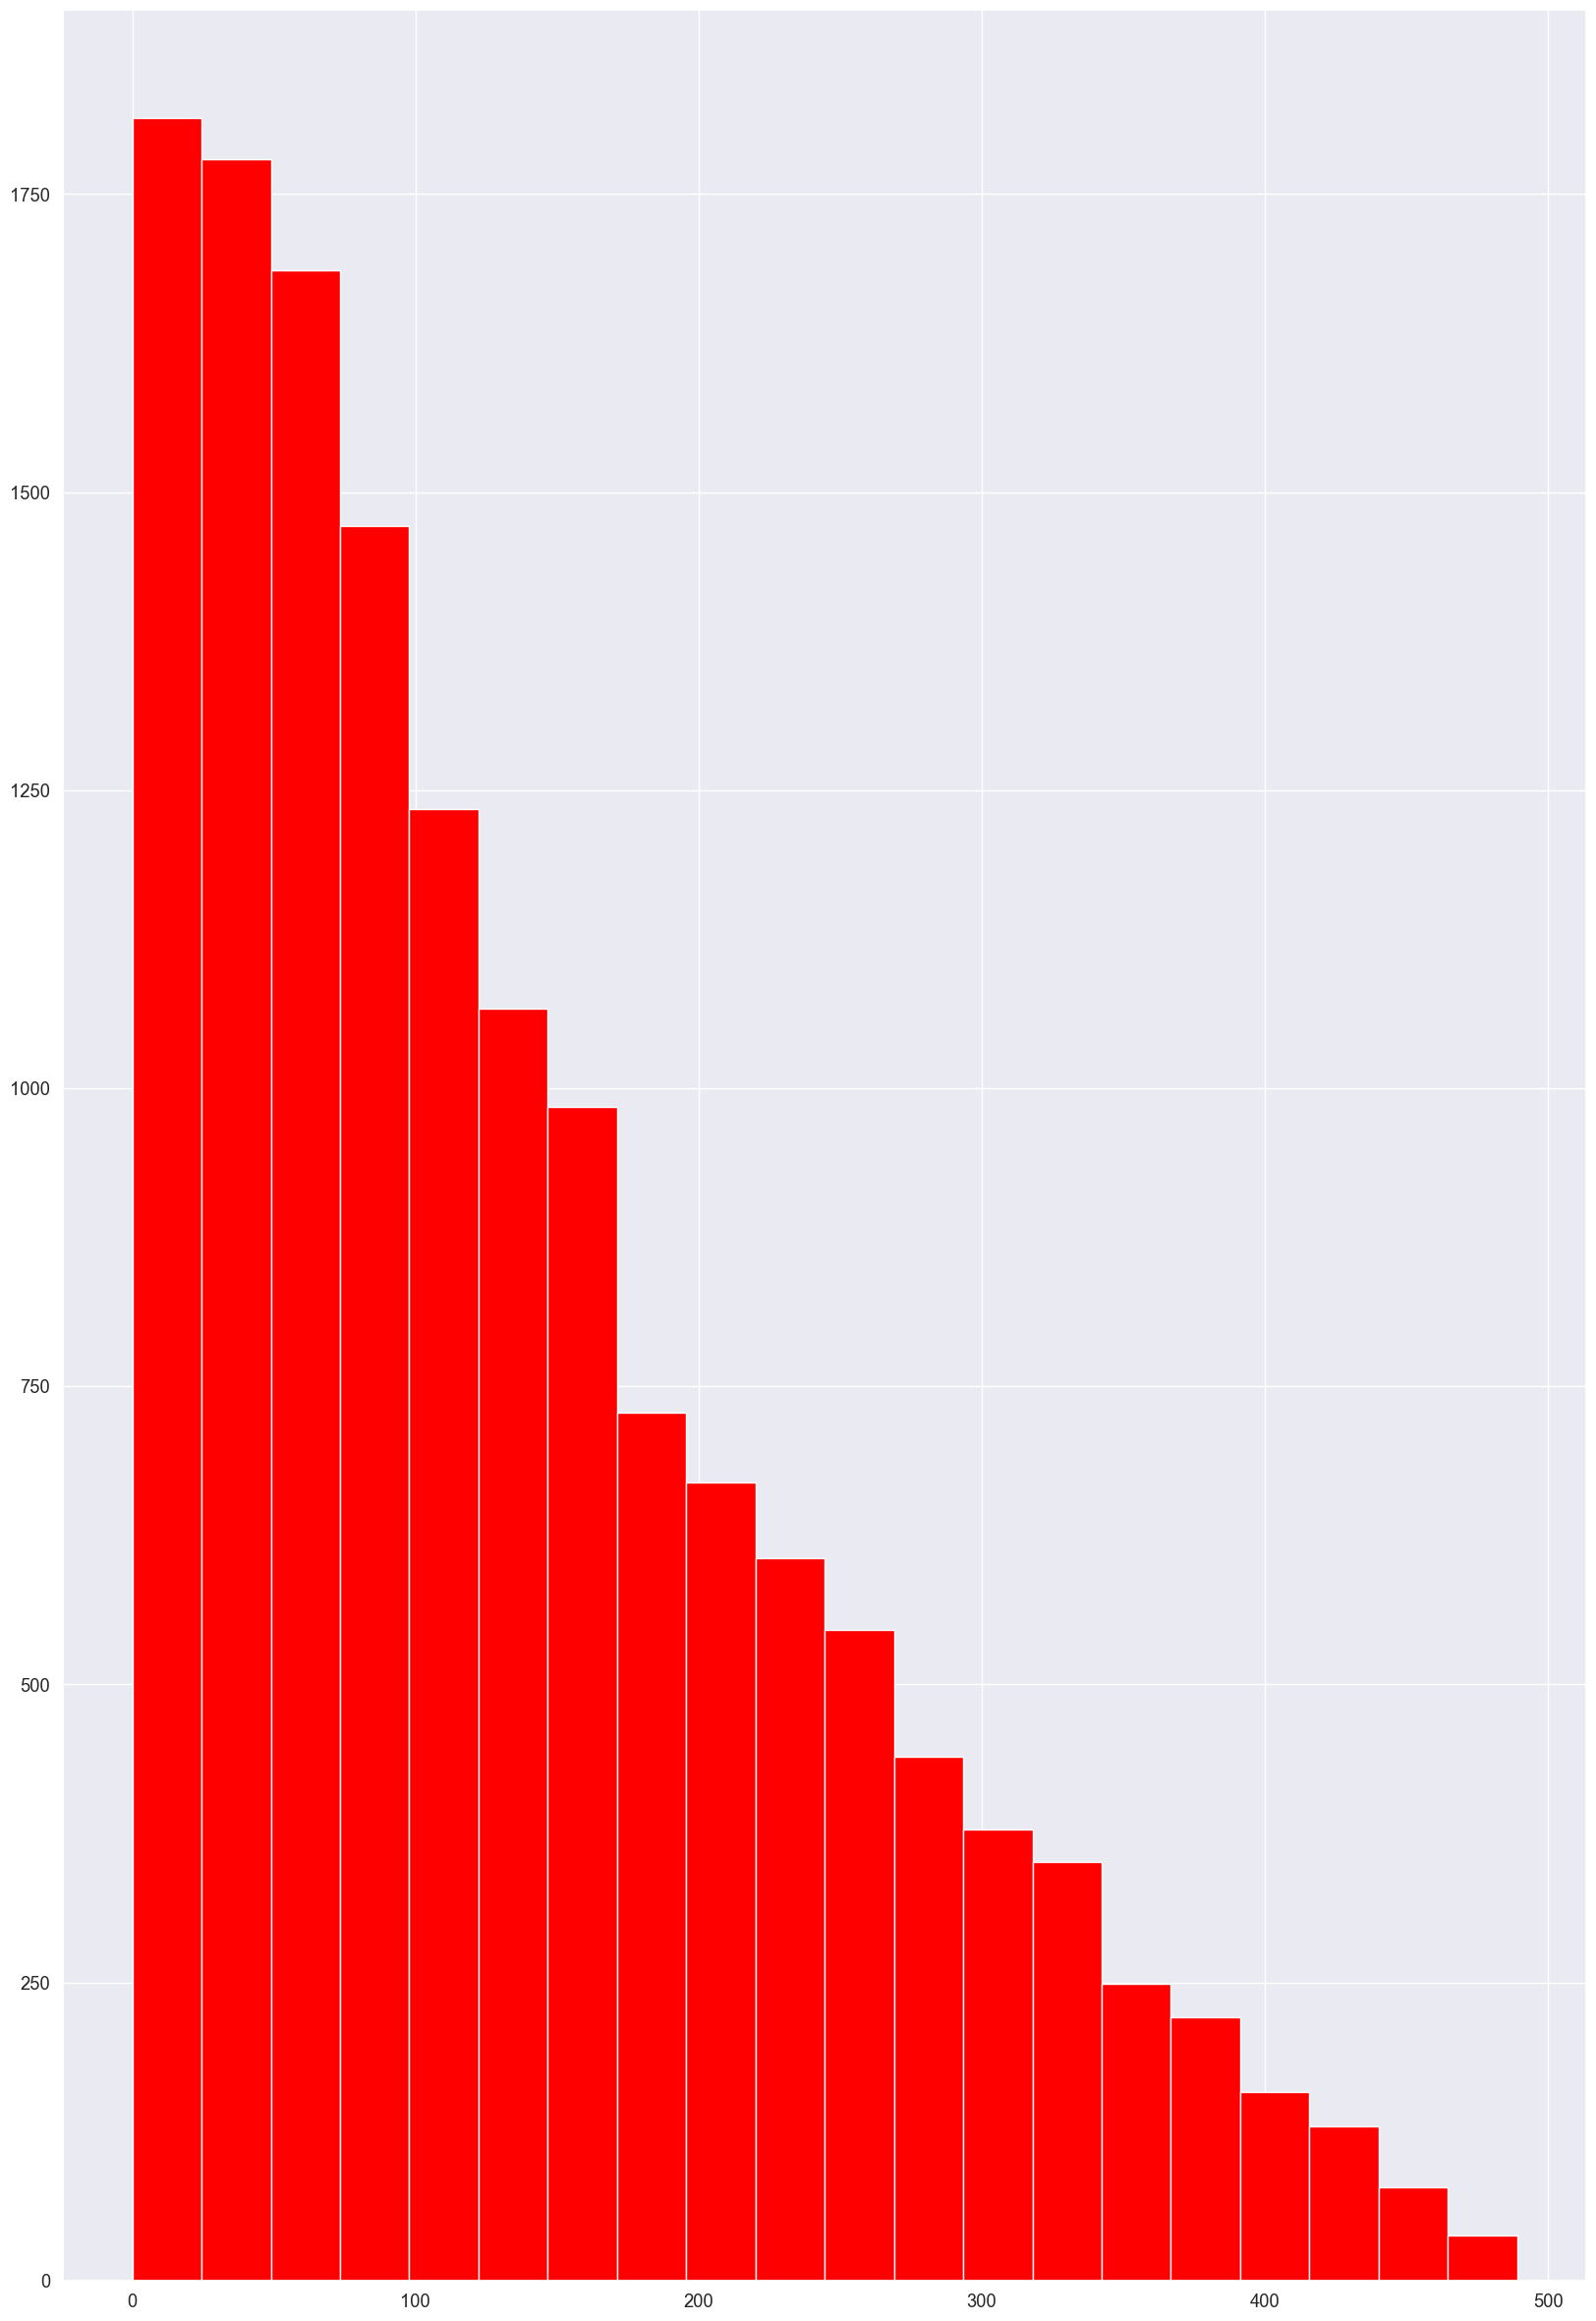

In [286]:
plt.hist(df['Units Sold'], color='red', bins=20, alpha=1)

In [287]:
df['Units Ordered'].max()

200

In [288]:
df['Units Ordered']

7         54
11        70
13       187
14       154
17        47
        ... 
73068    139
73071     36
73075    148
73078    166
73097    151
Name: Units Ordered, Length: 14626, dtype: int64

(array([664., 729., 723., 728., 717., 752., 739., 754., 707., 738., 693.,
        696., 784., 754., 746., 713., 711., 718., 747., 813.]),
 array([ 20.,  29.,  38.,  47.,  56.,  65.,  74.,  83.,  92., 101., 110.,
        119., 128., 137., 146., 155., 164., 173., 182., 191., 200.]),
 <BarContainer object of 20 artists>)

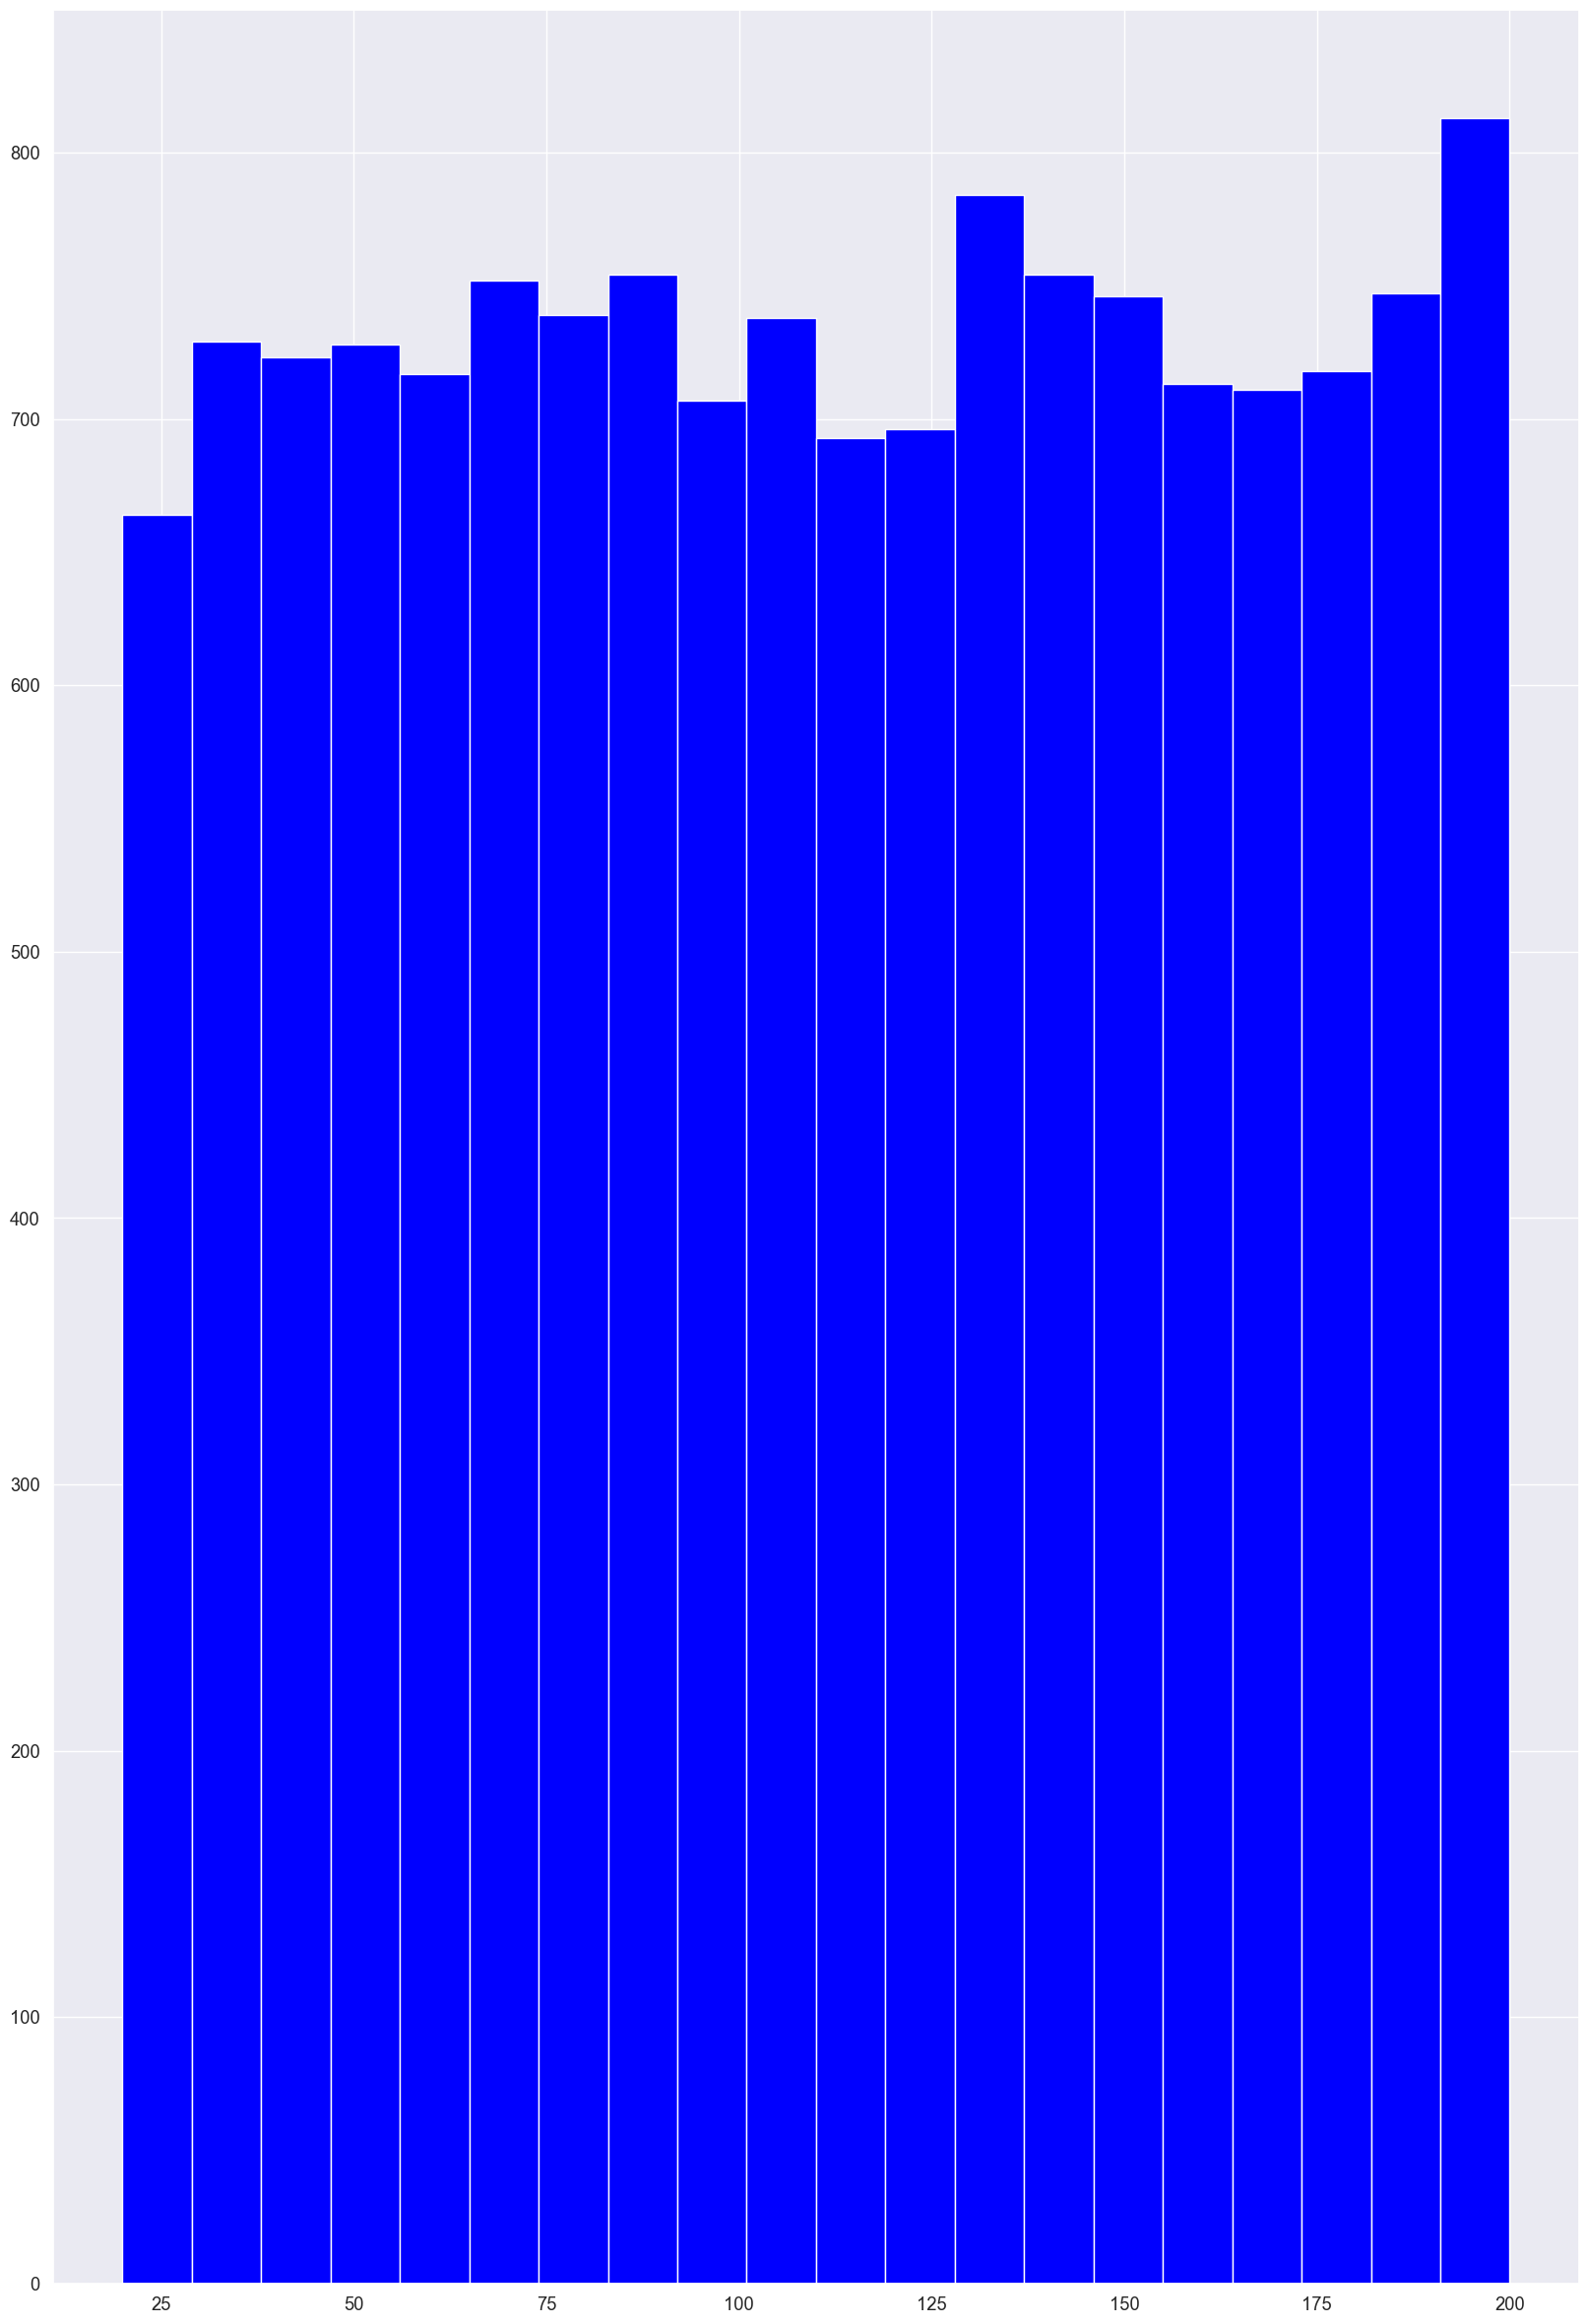

In [289]:
plt.hist(df['Units Ordered'], color='blue', bins=20, alpha=1)

In [290]:
df['Demand Forecast'].max()

506.37

In [291]:
df['Demand Forecast']

7        329.73
11        26.75
13         6.80
14       363.46
17       147.27
          ...  
73068     66.94
73071     63.69
73075    193.14
73078     43.07
73097     39.65
Name: Demand Forecast, Length: 14626, dtype: float64

(array([ 41., 109., 174., 220., 305., 348., 354., 413., 392., 382., 365.,
        370., 367., 392., 373., 300., 321., 335., 313., 304., 309., 295.,
        307., 270., 259., 233., 238., 226., 217., 258., 214., 206., 213.,
        189., 193., 213., 172., 154., 158., 165., 132., 127., 130., 147.,
        148., 138., 129., 119., 134., 126., 137., 110., 112., 129.,  99.,
         97., 110.,  86.,  83.,  97.,  80.,  81.,  79.,  75.,  85.,  68.,
         77.,  60.,  70.,  57.,  68.,  56.,  49.,  45.,  44.,  48.,  50.,
         40.,  34.,  39.,  24.,  32.,  45.,  33.,  26.,  21.,  33.,  35.,
         17.,  16.,  23.,  16.,   8.,  11.,  10.,   8.,   4.,   1.,   0.,
          1.]),
 array([ -9.79  ,  -4.6284,   0.5332,   5.6948,  10.8564,  16.018 ,
         21.1796,  26.3412,  31.5028,  36.6644,  41.826 ,  46.9876,
         52.1492,  57.3108,  62.4724,  67.634 ,  72.7956,  77.9572,
         83.1188,  88.2804,  93.442 ,  98.6036, 103.7652, 108.9268,
        114.0884, 119.25  , 124.4116, 129.5732

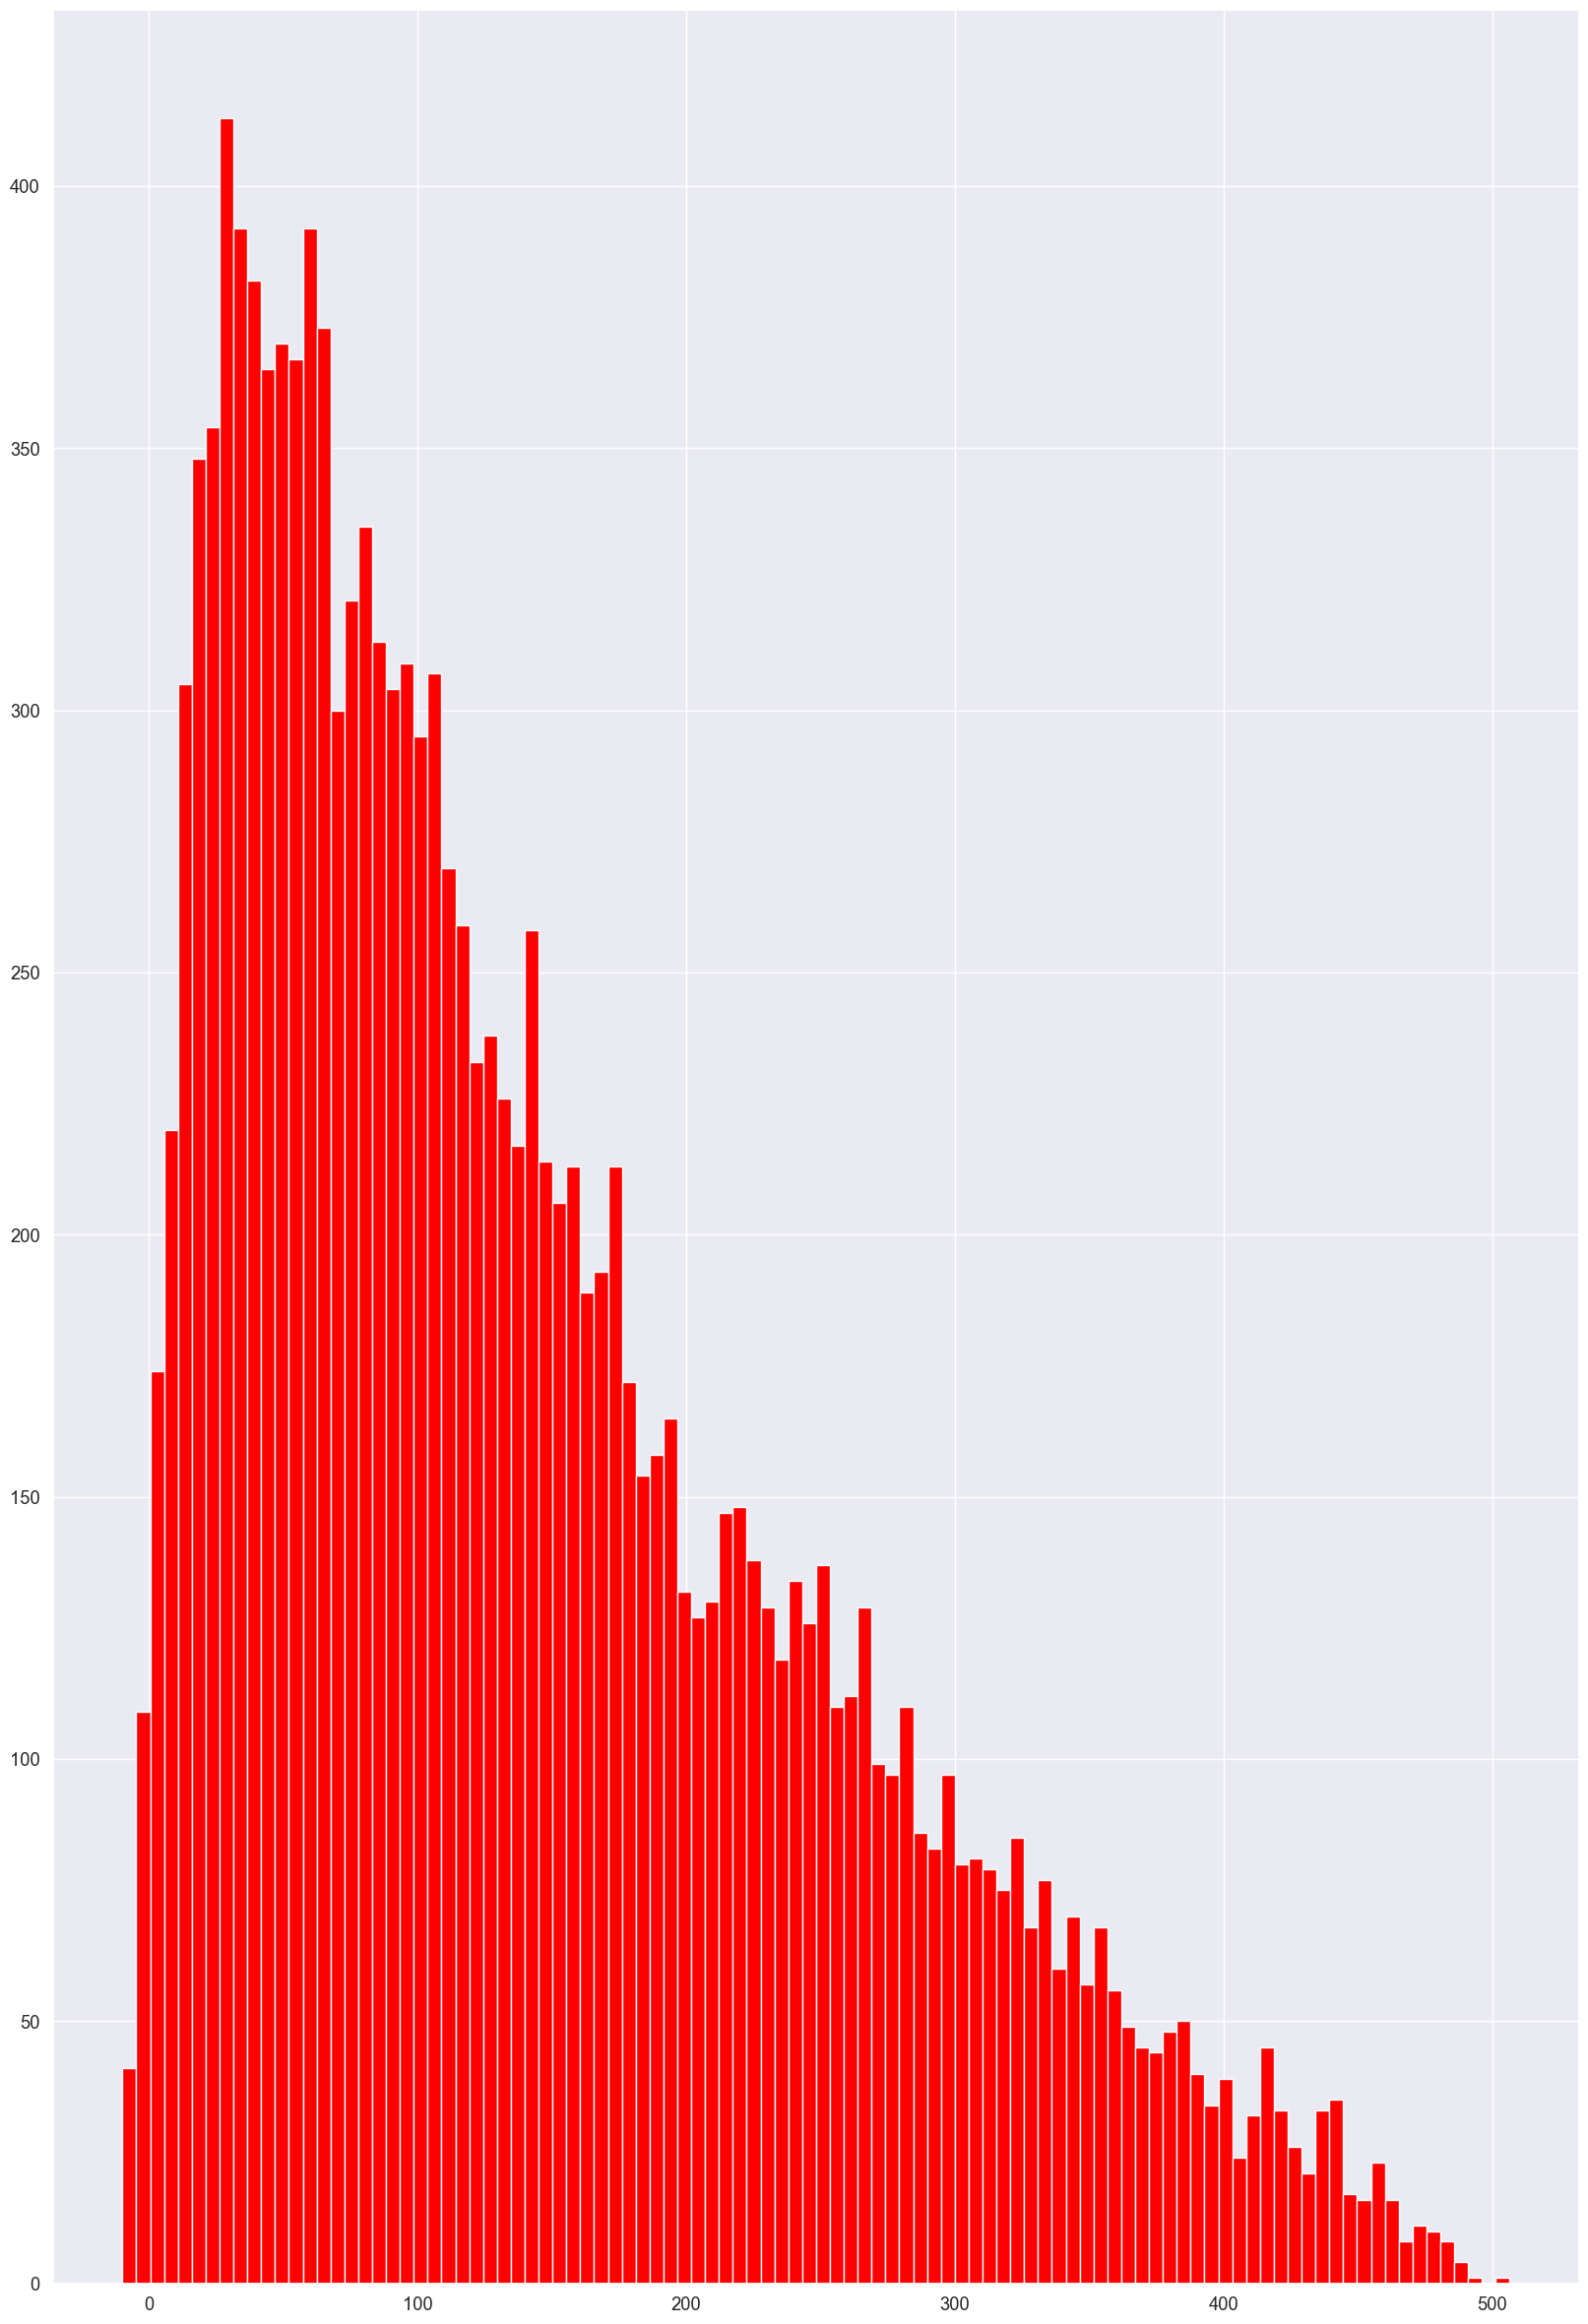

In [292]:
plt.hist(df['Demand Forecast'], color='red', bins=100, alpha=1)

In [293]:
df['Price'].max()

99.99

In [294]:
df['Price']

7        97.99
11       58.25
13       78.11
14       92.99
17       19.57
         ...  
73068    48.65
73071    11.65
73075    19.12
73078    61.04
73097    11.11
Name: Price, Length: 14626, dtype: float64

(array([785., 707., 678., 775., 781., 704., 750., 744., 758., 693., 727.,
        726., 712., 702., 696., 703., 740., 716., 749., 780.]),
 array([10.    , 14.4995, 18.999 , 23.4985, 27.998 , 32.4975, 36.997 ,
        41.4965, 45.996 , 50.4955, 54.995 , 59.4945, 63.994 , 68.4935,
        72.993 , 77.4925, 81.992 , 86.4915, 90.991 , 95.4905, 99.99  ]),
 <BarContainer object of 20 artists>)

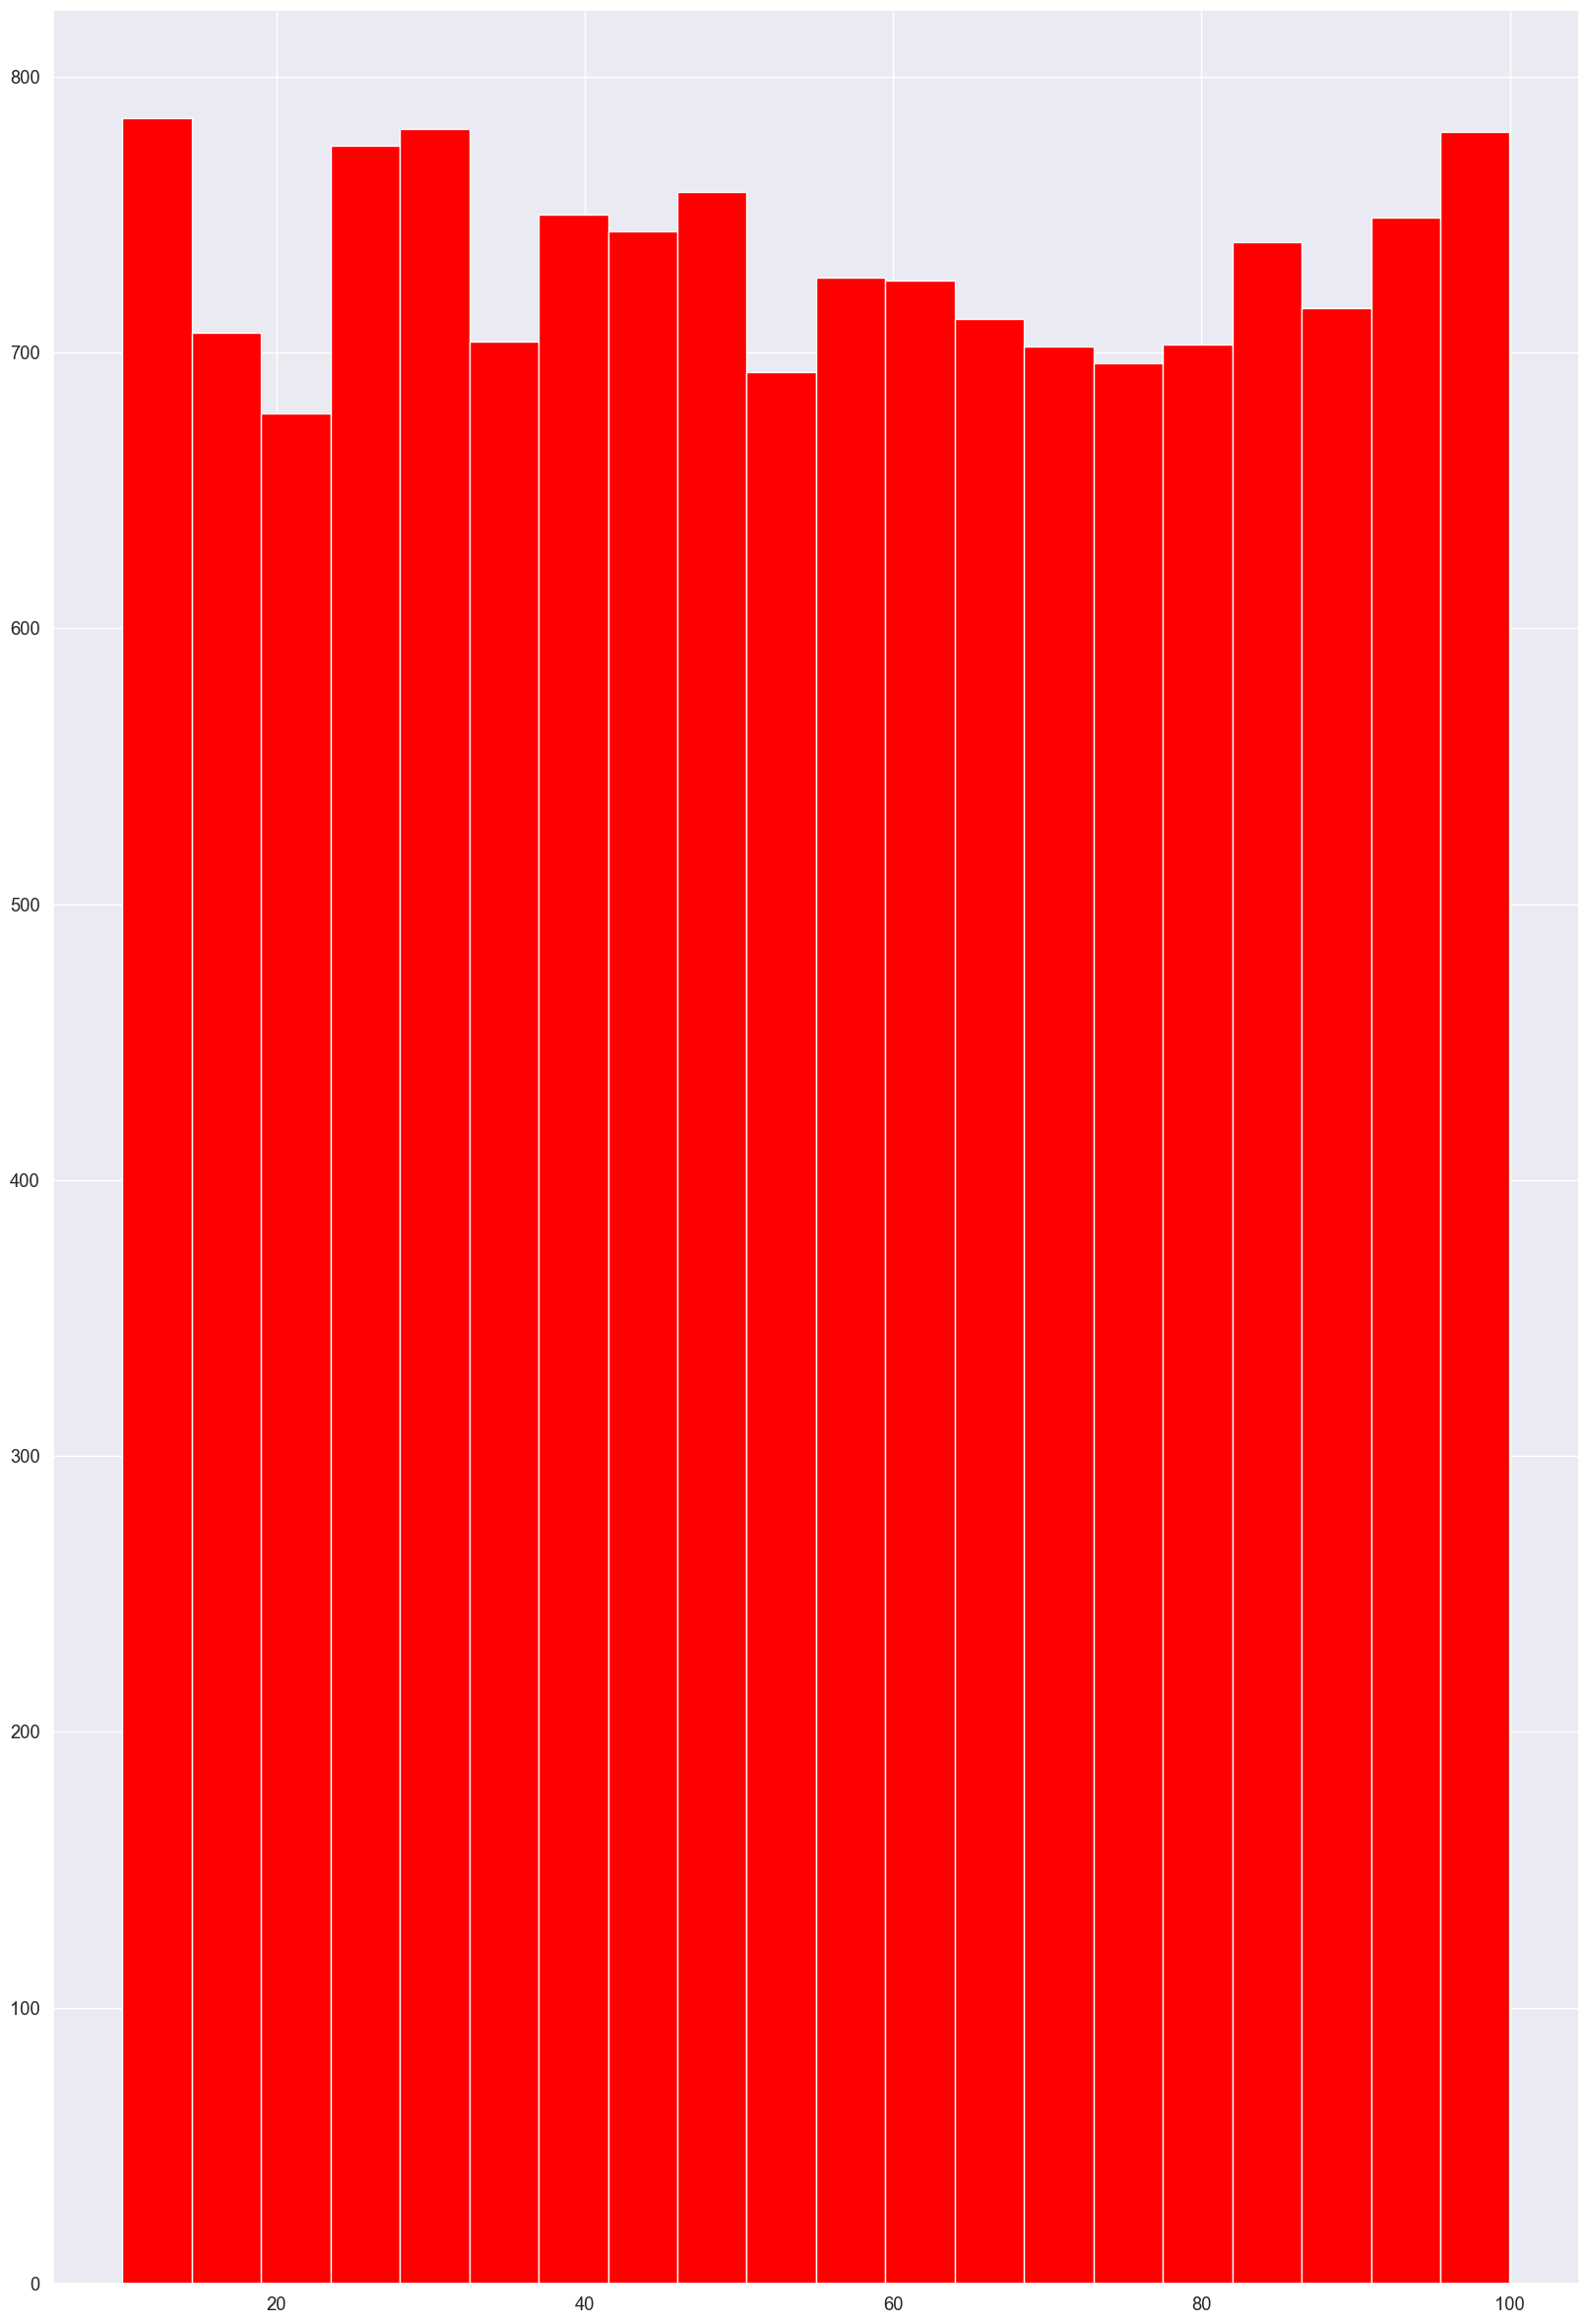

In [295]:
plt.hist(df['Price'], color='red', bins=20, alpha=1)

In [296]:
df['Inventory Level'].max()

500

In [297]:
df['Inventory Level']

7        380
11        66
13       193
14       379
17       241
        ... 
73068    115
73071     85
73075    314
73078     65
73097    278
Name: Inventory Level, Length: 14626, dtype: int64

(array([145., 138., 144., 141., 150., 129., 144., 123., 163., 130., 177.,
        130., 173., 131., 146., 153., 167., 139., 165., 120., 146., 127.,
        183., 116., 155., 122., 162., 156., 195., 126., 163., 140., 154.,
        123., 167., 150., 156., 132., 174., 155., 170., 112., 150., 111.,
        169., 140., 163., 133., 182., 127., 173., 123., 167., 132., 159.,
        121., 156., 133., 161., 121., 162., 120., 187., 121., 165., 125.,
        140., 107., 157., 125., 150., 128., 173., 123., 185., 127., 151.,
        110., 162., 145., 161., 127., 165., 120., 166., 125., 152., 150.,
        184., 131., 125., 118., 181., 133., 161., 142., 180., 143., 132.,
        154.]),
 array([ 50. ,  54.5,  59. ,  63.5,  68. ,  72.5,  77. ,  81.5,  86. ,
         90.5,  95. ,  99.5, 104. , 108.5, 113. , 117.5, 122. , 126.5,
        131. , 135.5, 140. , 144.5, 149. , 153.5, 158. , 162.5, 167. ,
        171.5, 176. , 180.5, 185. , 189.5, 194. , 198.5, 203. , 207.5,
        212. , 216.5, 221. , 225.5

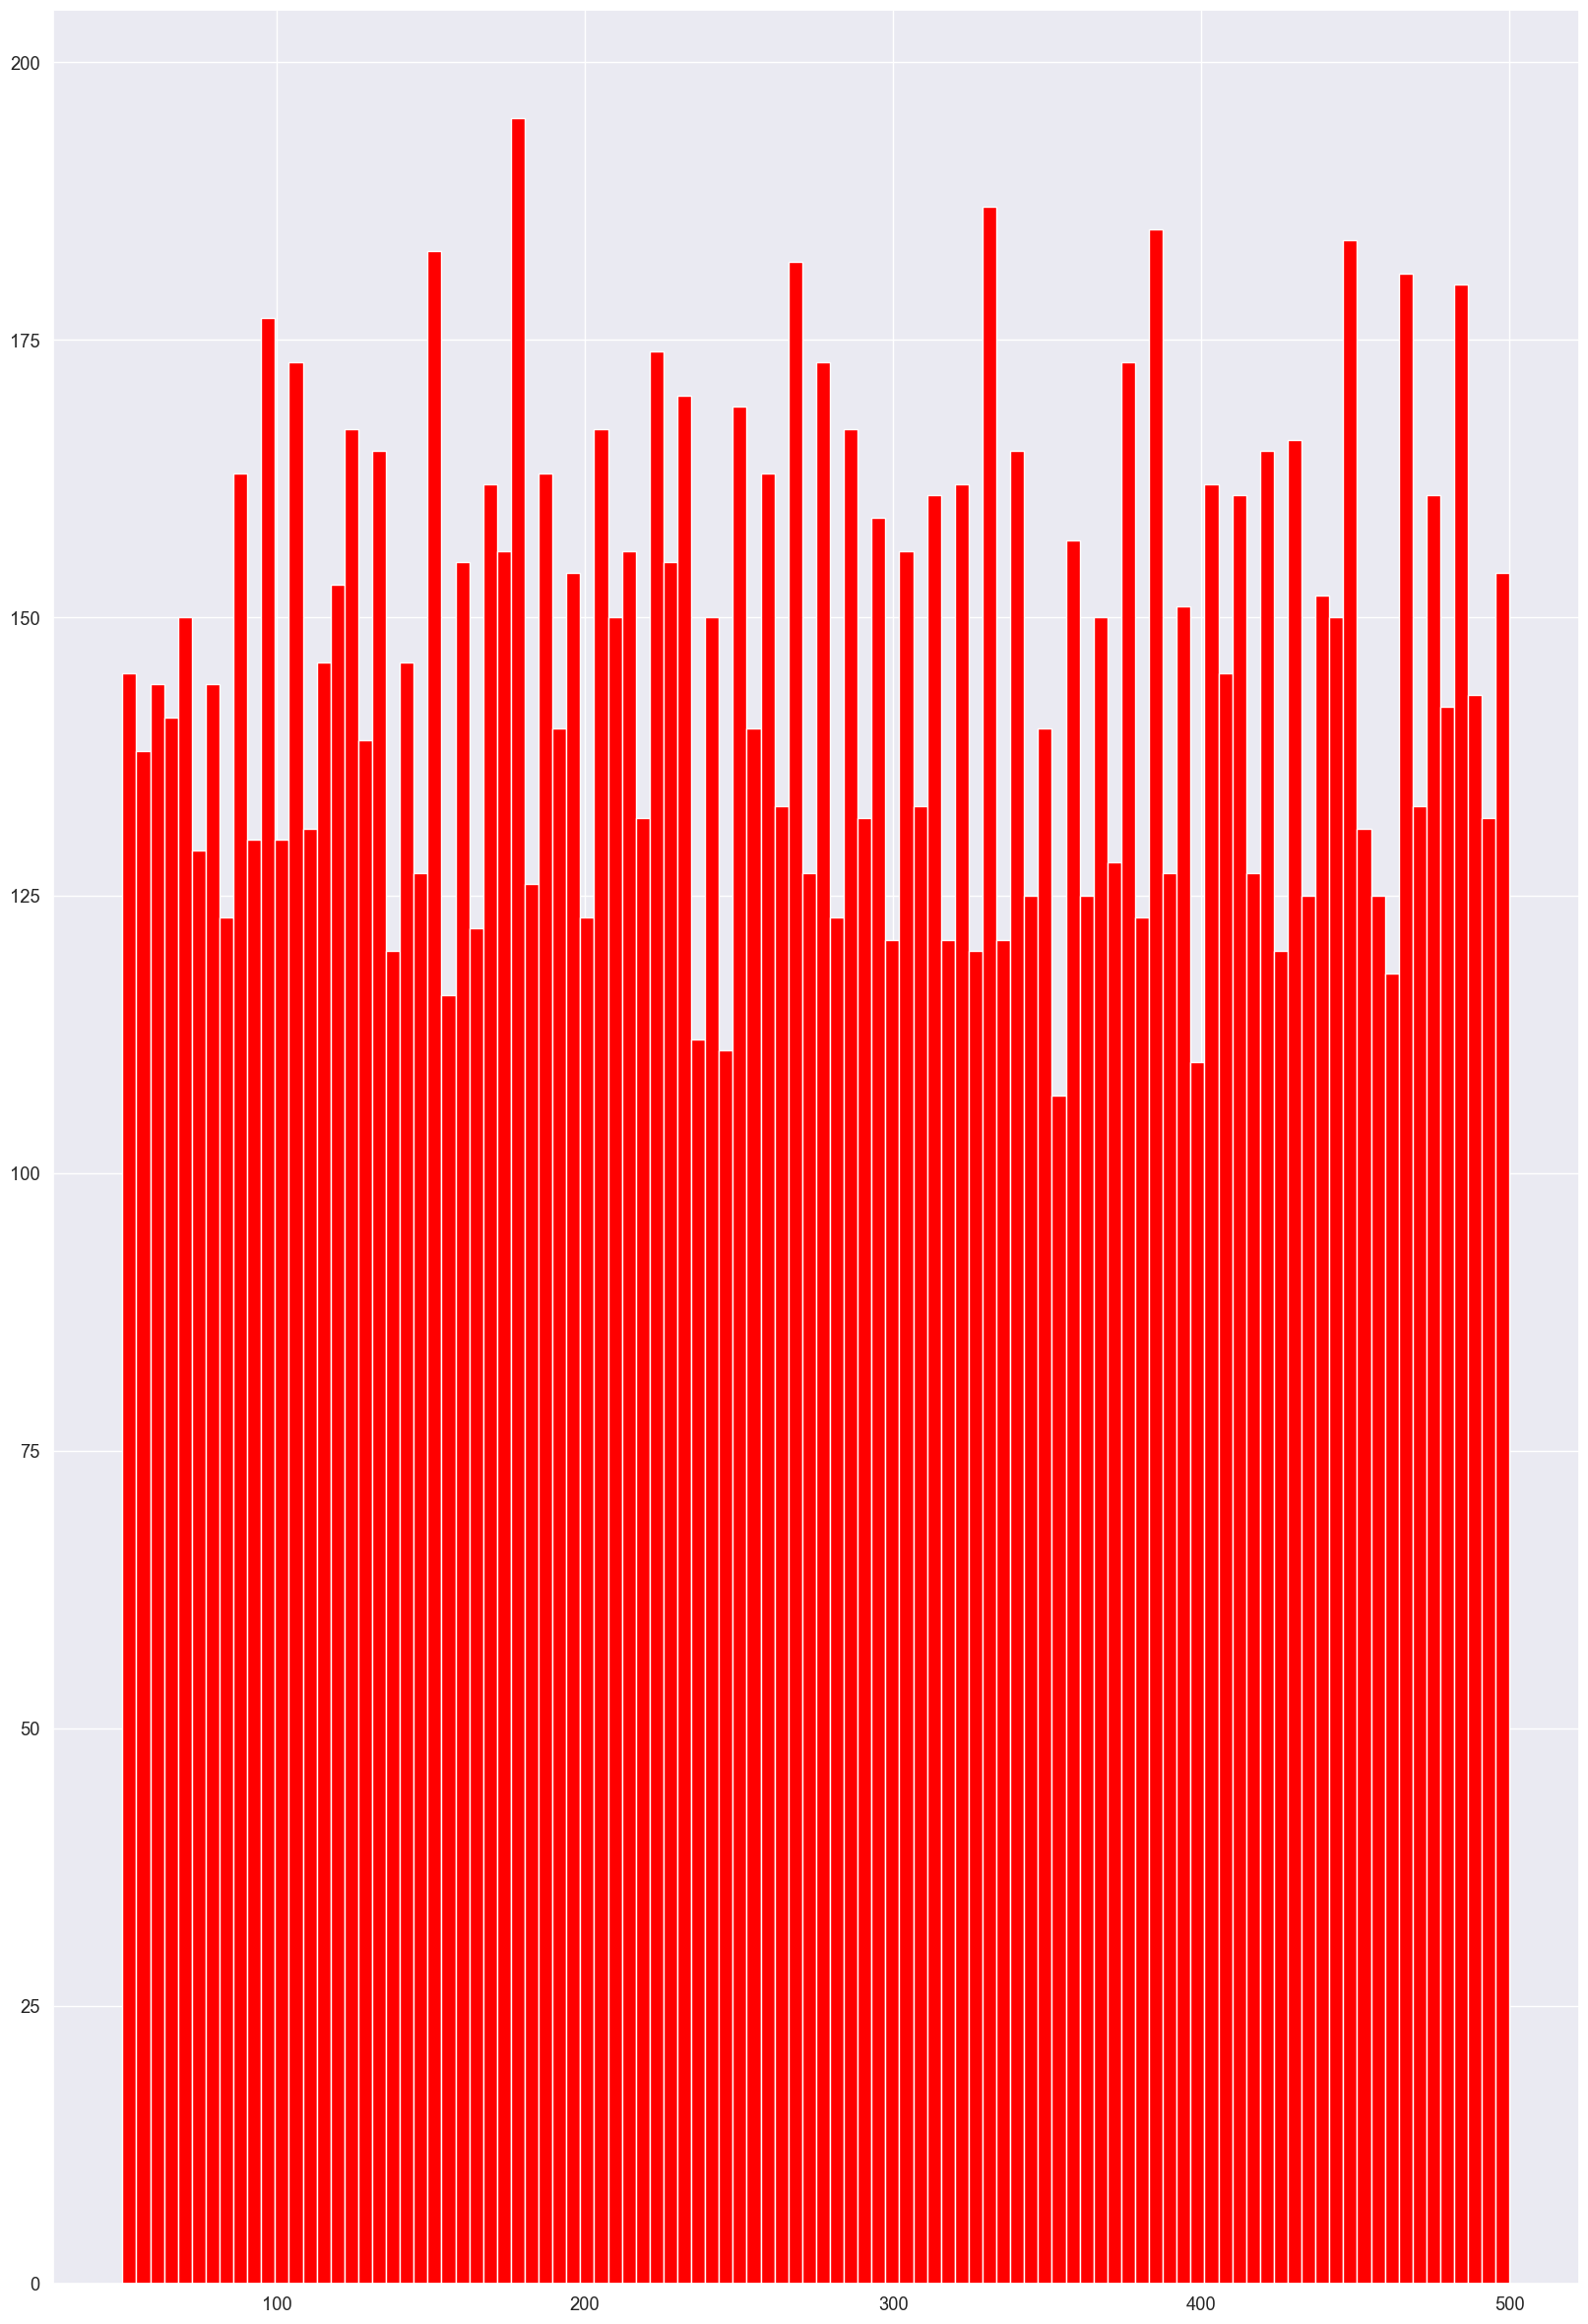

In [298]:
plt.hist(df['Inventory Level'], color='red', bins=100, alpha=1)

In [299]:
df['Competitor Pricing'].max()

104.81

In [300]:
df['Competitor Pricing']

7        100.09
11        62.21
13        80.06
14        95.80
17        23.13
          ...  
73068     49.74
73071      7.14
73075     20.11
73078     60.99
73097     10.91
Name: Competitor Pricing, Length: 14626, dtype: float64

(array([ 44., 116., 169., 244., 342., 298., 296., 316., 318., 315., 352.,
        316., 331., 325., 349., 346., 324., 315., 318., 337., 305., 336.,
        332., 303., 336., 328., 312., 313., 338., 339., 290., 281., 331.,
        308., 313., 345., 298., 308., 346., 283., 305., 341., 313., 329.,
        342., 290., 249., 174., 118.,  49.]),
 array([  5.31,   7.3 ,   9.29,  11.28,  13.27,  15.26,  17.25,  19.24,
         21.23,  23.22,  25.21,  27.2 ,  29.19,  31.18,  33.17,  35.16,
         37.15,  39.14,  41.13,  43.12,  45.11,  47.1 ,  49.09,  51.08,
         53.07,  55.06,  57.05,  59.04,  61.03,  63.02,  65.01,  67.  ,
         68.99,  70.98,  72.97,  74.96,  76.95,  78.94,  80.93,  82.92,
         84.91,  86.9 ,  88.89,  90.88,  92.87,  94.86,  96.85,  98.84,
        100.83, 102.82, 104.81]),
 <BarContainer object of 50 artists>)

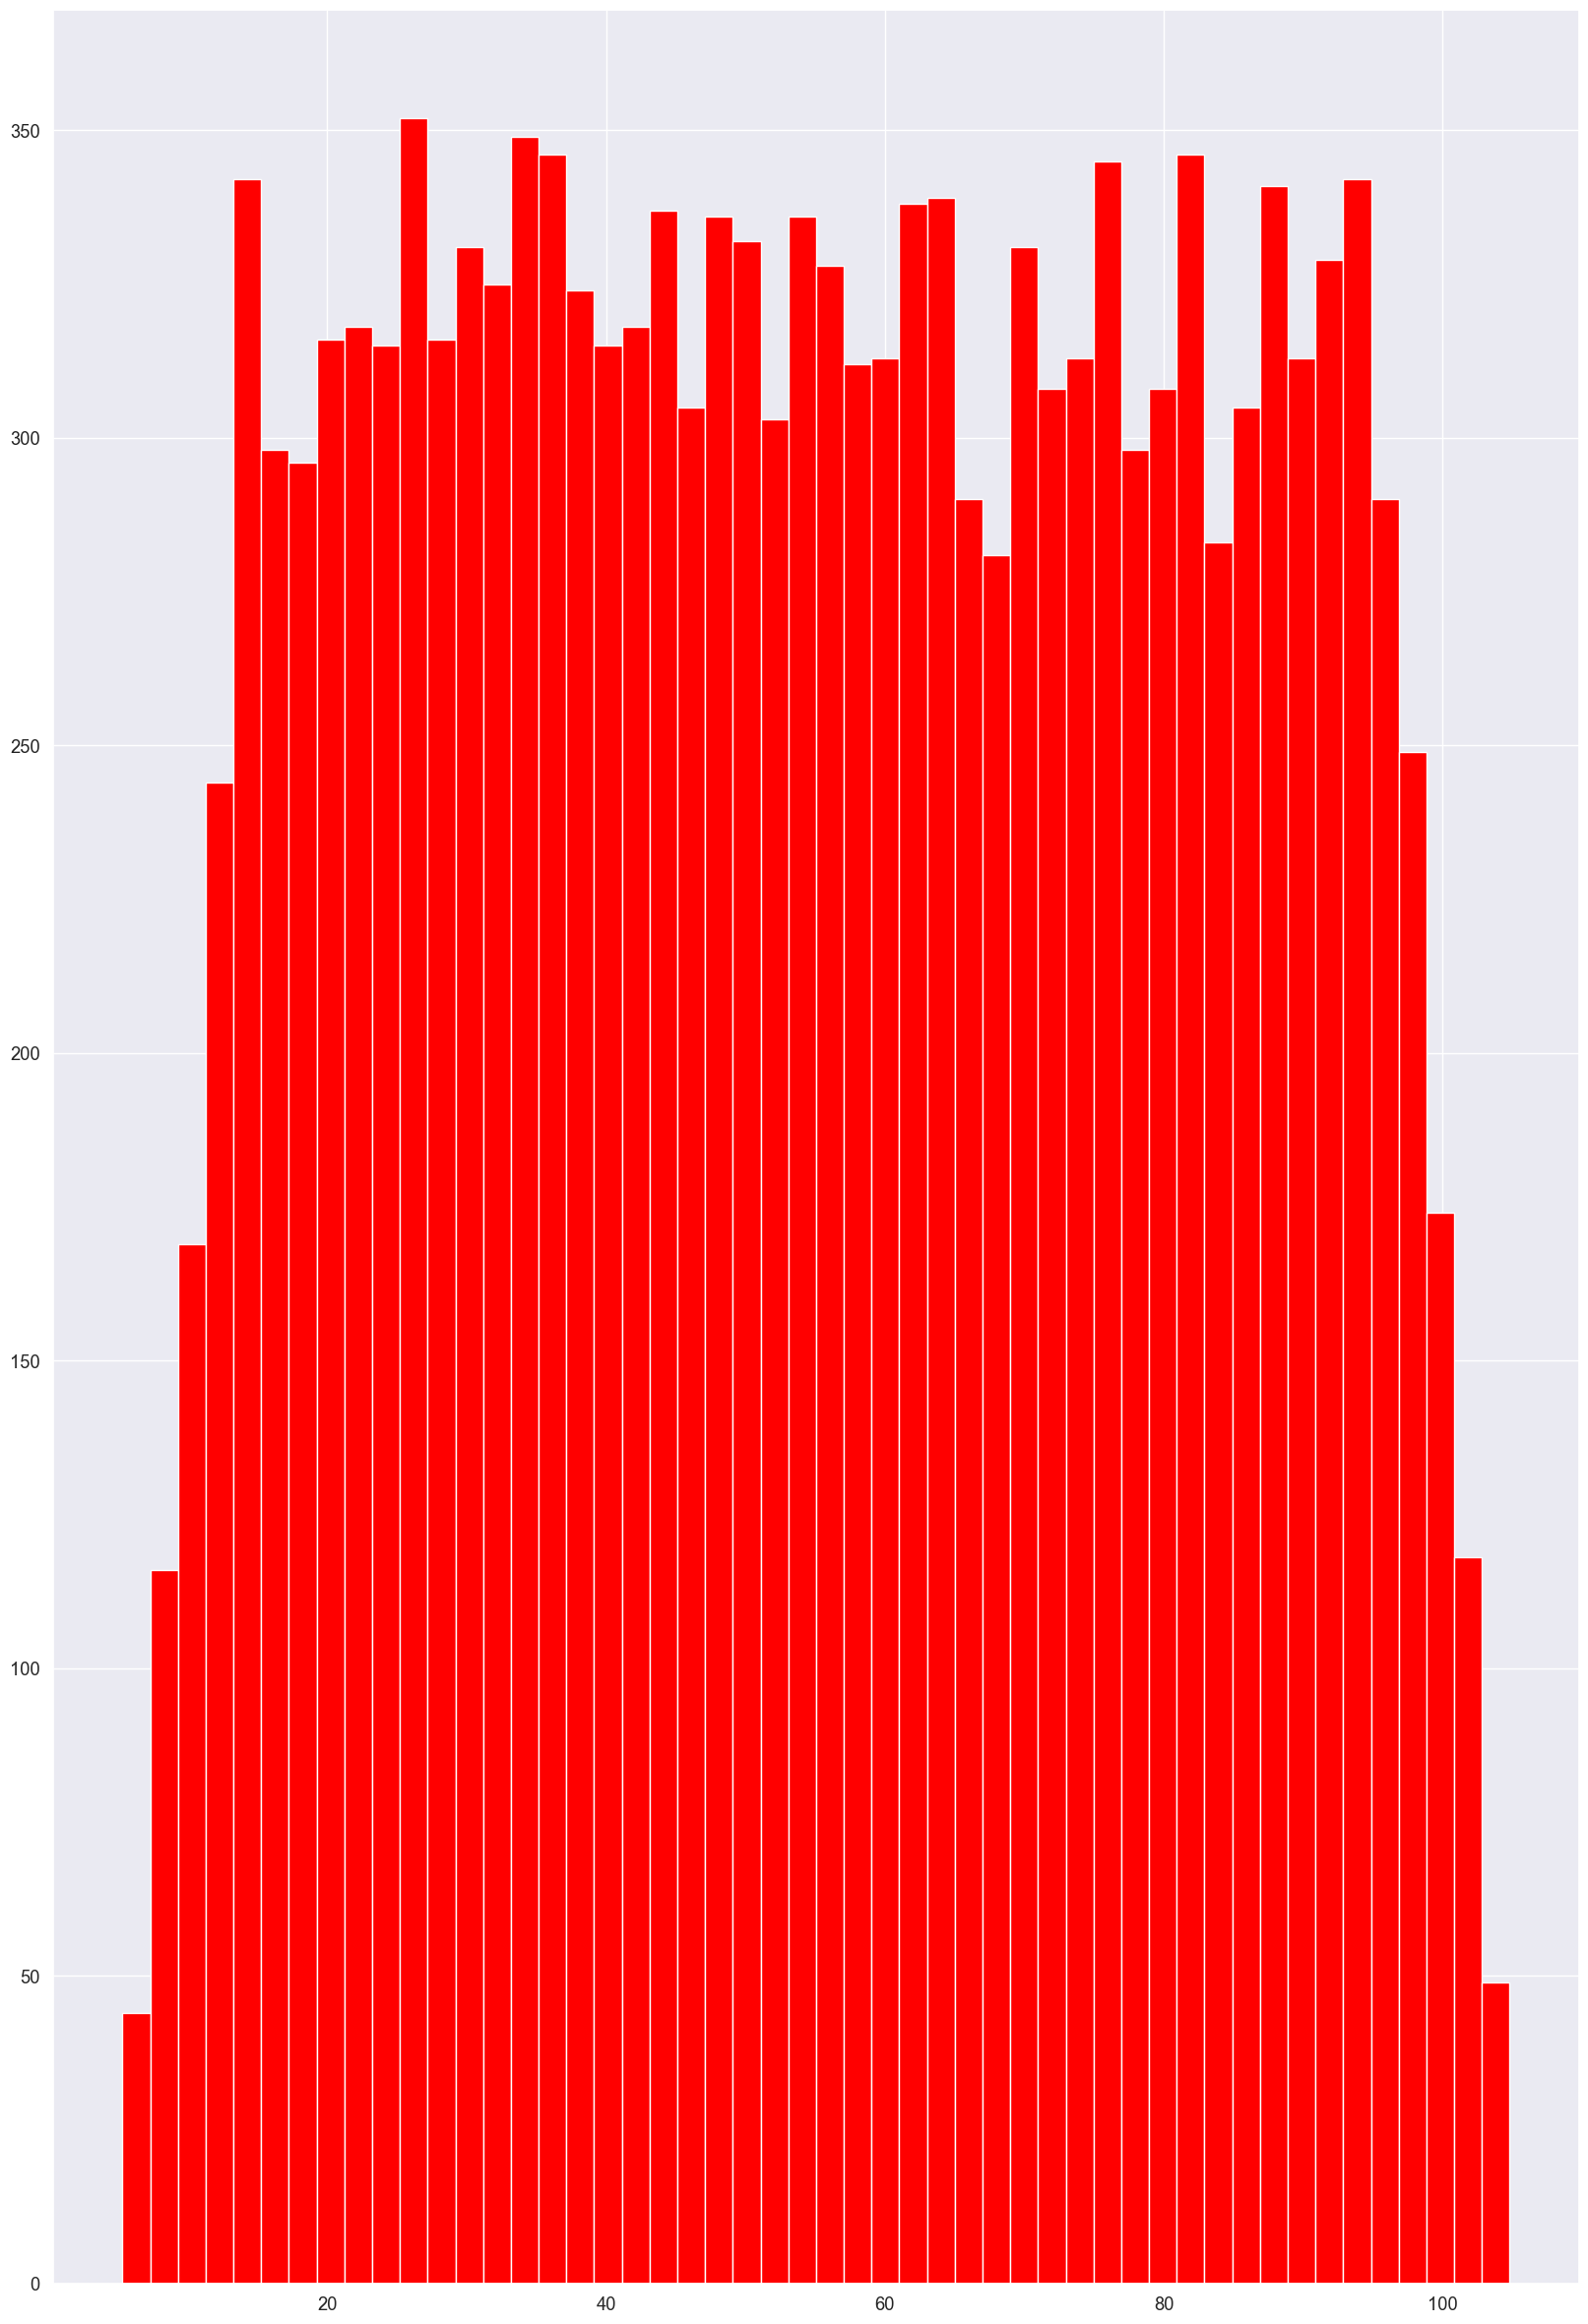

In [301]:
plt.hist(df['Competitor Pricing'], color='red', bins=50, alpha=1)

In [302]:
df['Discount'].max()

20

In [303]:
df['Discount']

7         5
11       20
13        0
14       15
17        5
         ..
73068    10
73071     5
73075     0
73078     0
73097    10
Name: Discount, Length: 14626, dtype: int64

(array([2946.,    0., 2924.,    0.,    0., 2879.,    0., 2921.,    0.,
        2956.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <BarContainer object of 10 artists>)

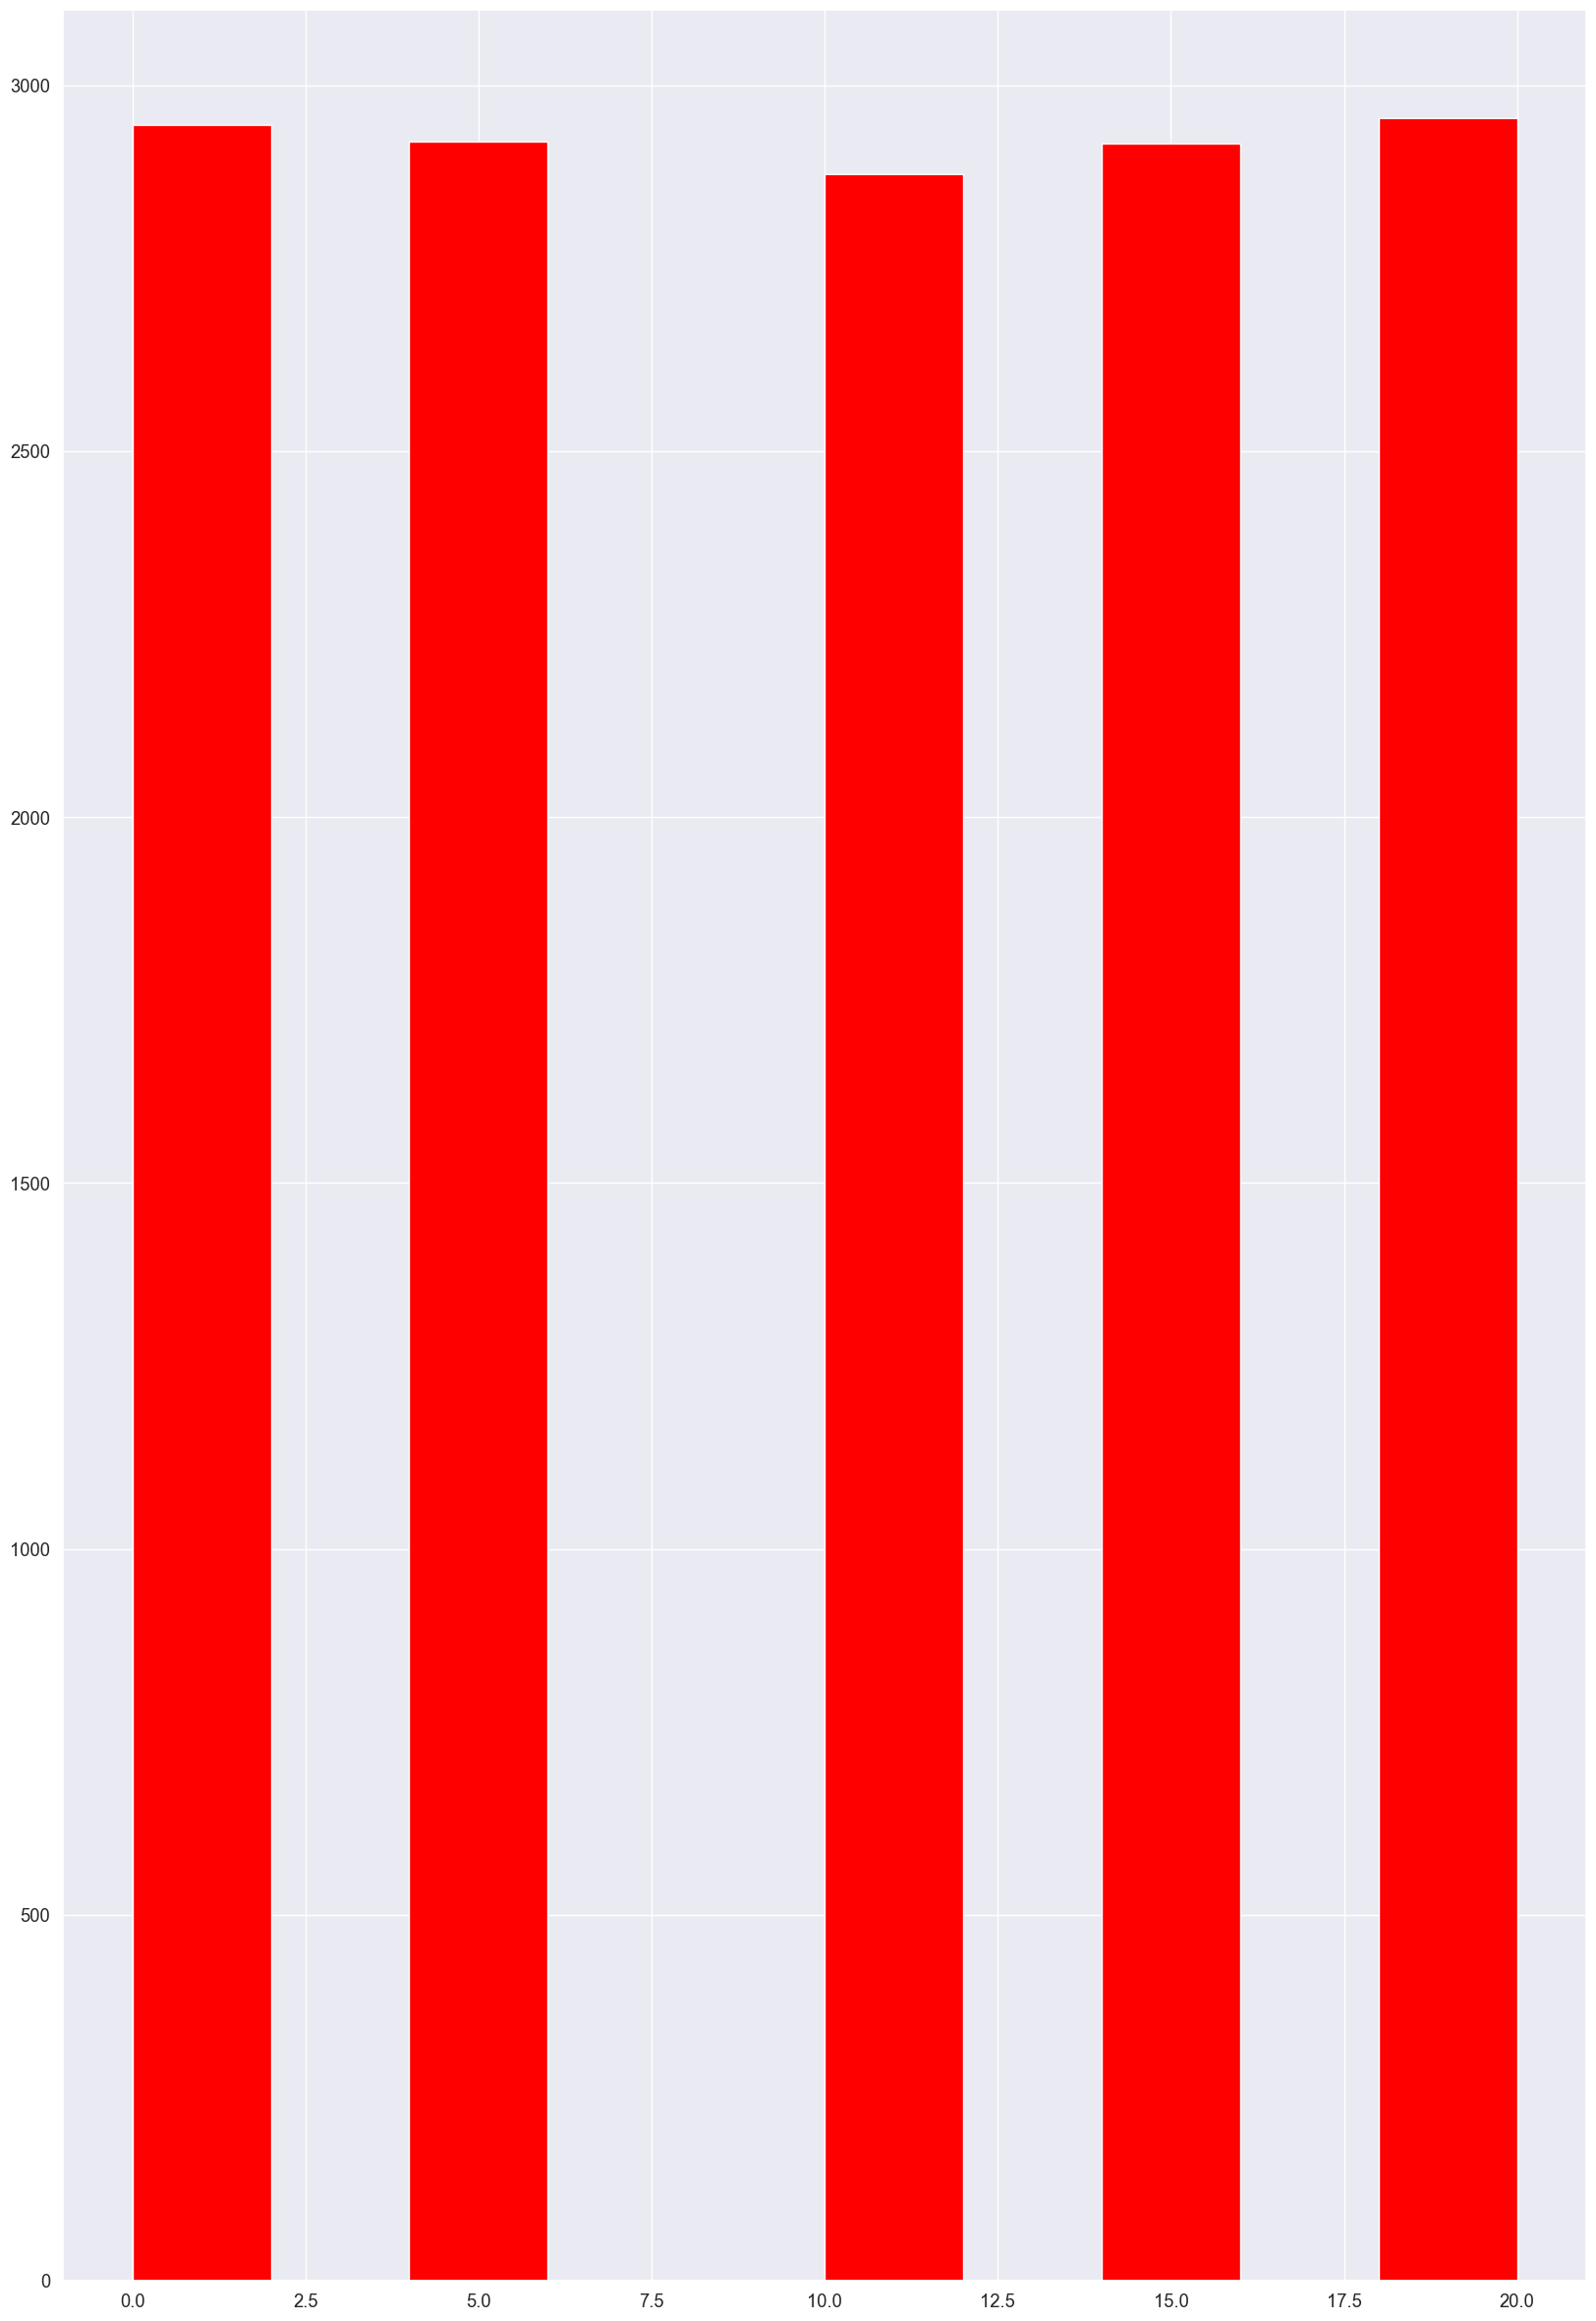

In [304]:
plt.hist(df['Discount'], color='red', bins=10, alpha=1)

## Data Distribution 

In [305]:
list_numeric_variable=["Inventory Level", "Units Sold", "Units Ordered", "Demand Forecast", "Price", "Discount", "Competitor Pricing"]

((array([-3.9035789 , -3.68348813, -3.56288358, ...,  3.56288358,
          3.68348813,  3.9035789 ]),
  array([ 50,  50,  50, ..., 500, 500, 500], dtype=int64)),
 (126.9534407231306, 274.5977710925748, 0.9773014585599703))

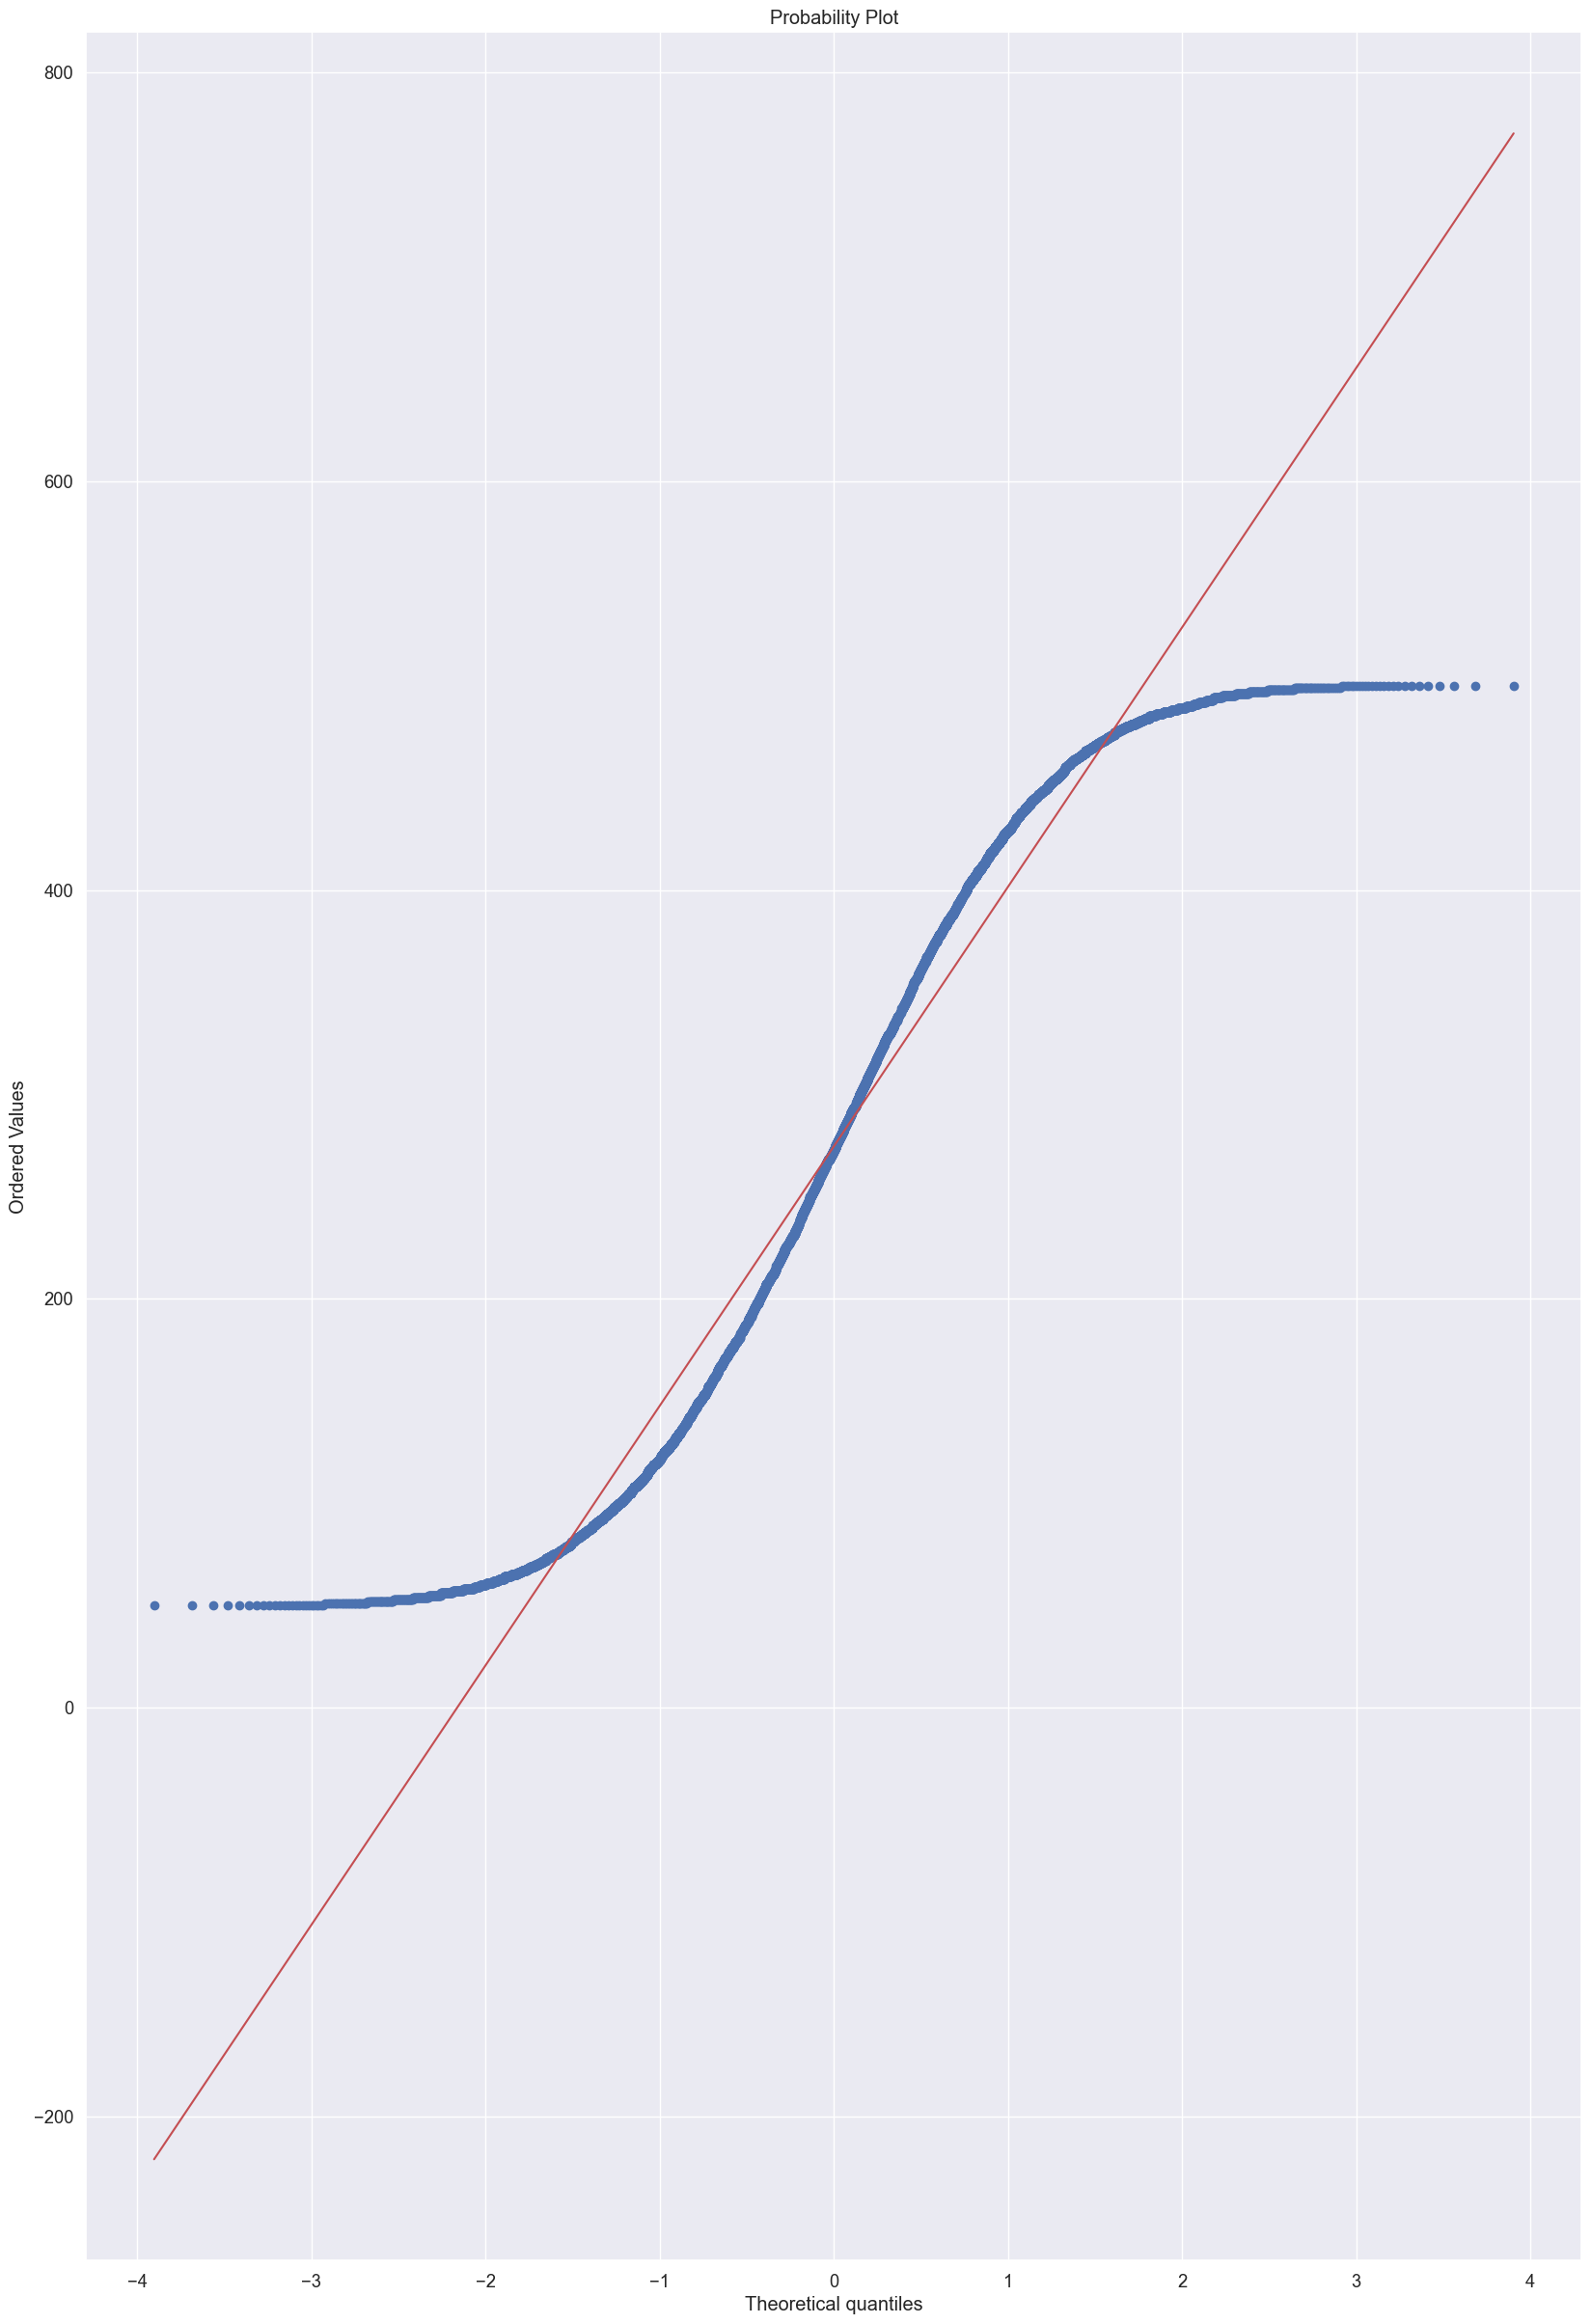

In [306]:
stats.probplot(df['Inventory Level'], dist='norm', plot=pylab)

((array([-3.9035789 , -3.68348813, -3.56288358, ...,  3.56288358,
          3.68348813,  3.9035789 ]),
  array([  0,   0,   0, ..., 485, 486, 489], dtype=int64)),
 (103.76647016903294, 136.68576507589222, 0.9568522190032598))

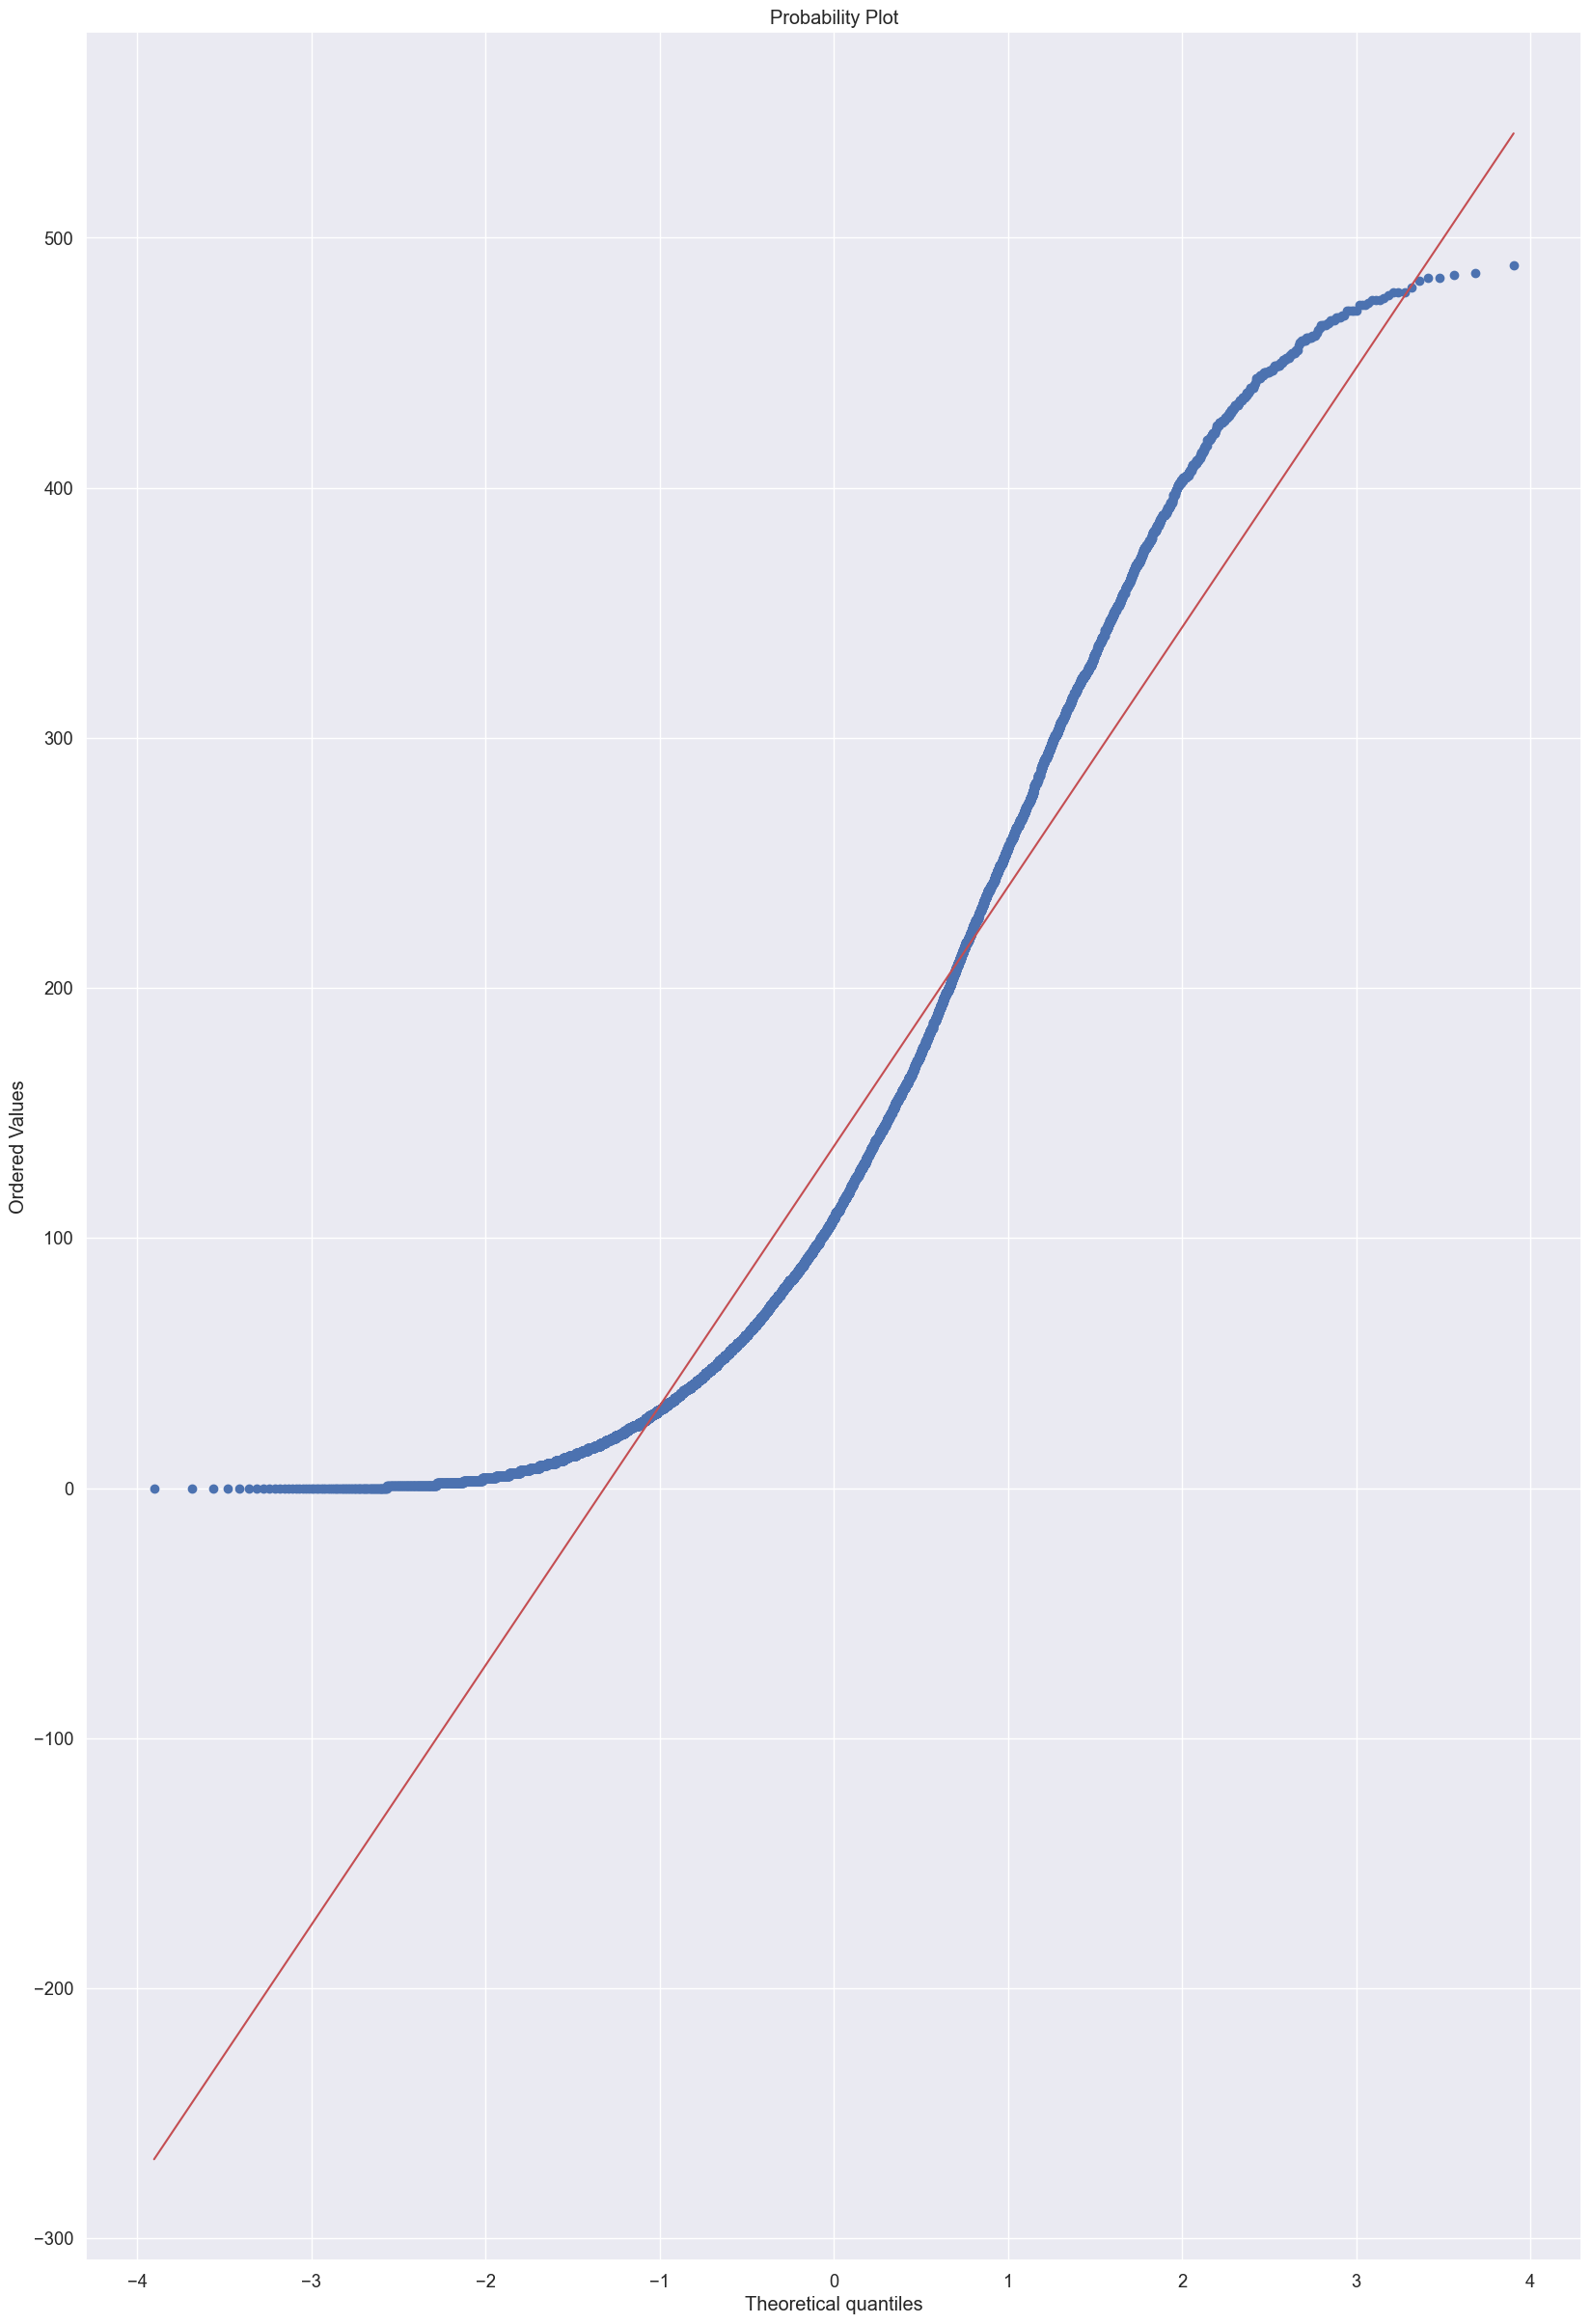

In [307]:
stats.probplot(df['Units Sold'], dist='norm', plot=pylab)

((array([-3.9035789 , -3.68348813, -3.56288358, ...,  3.56288358,
          3.68348813,  3.9035789 ]),
  array([ 20,  20,  20, ..., 200, 200, 200], dtype=int64)),
 (50.89134298322254, 110.4119376452892, 0.9776809410833639))

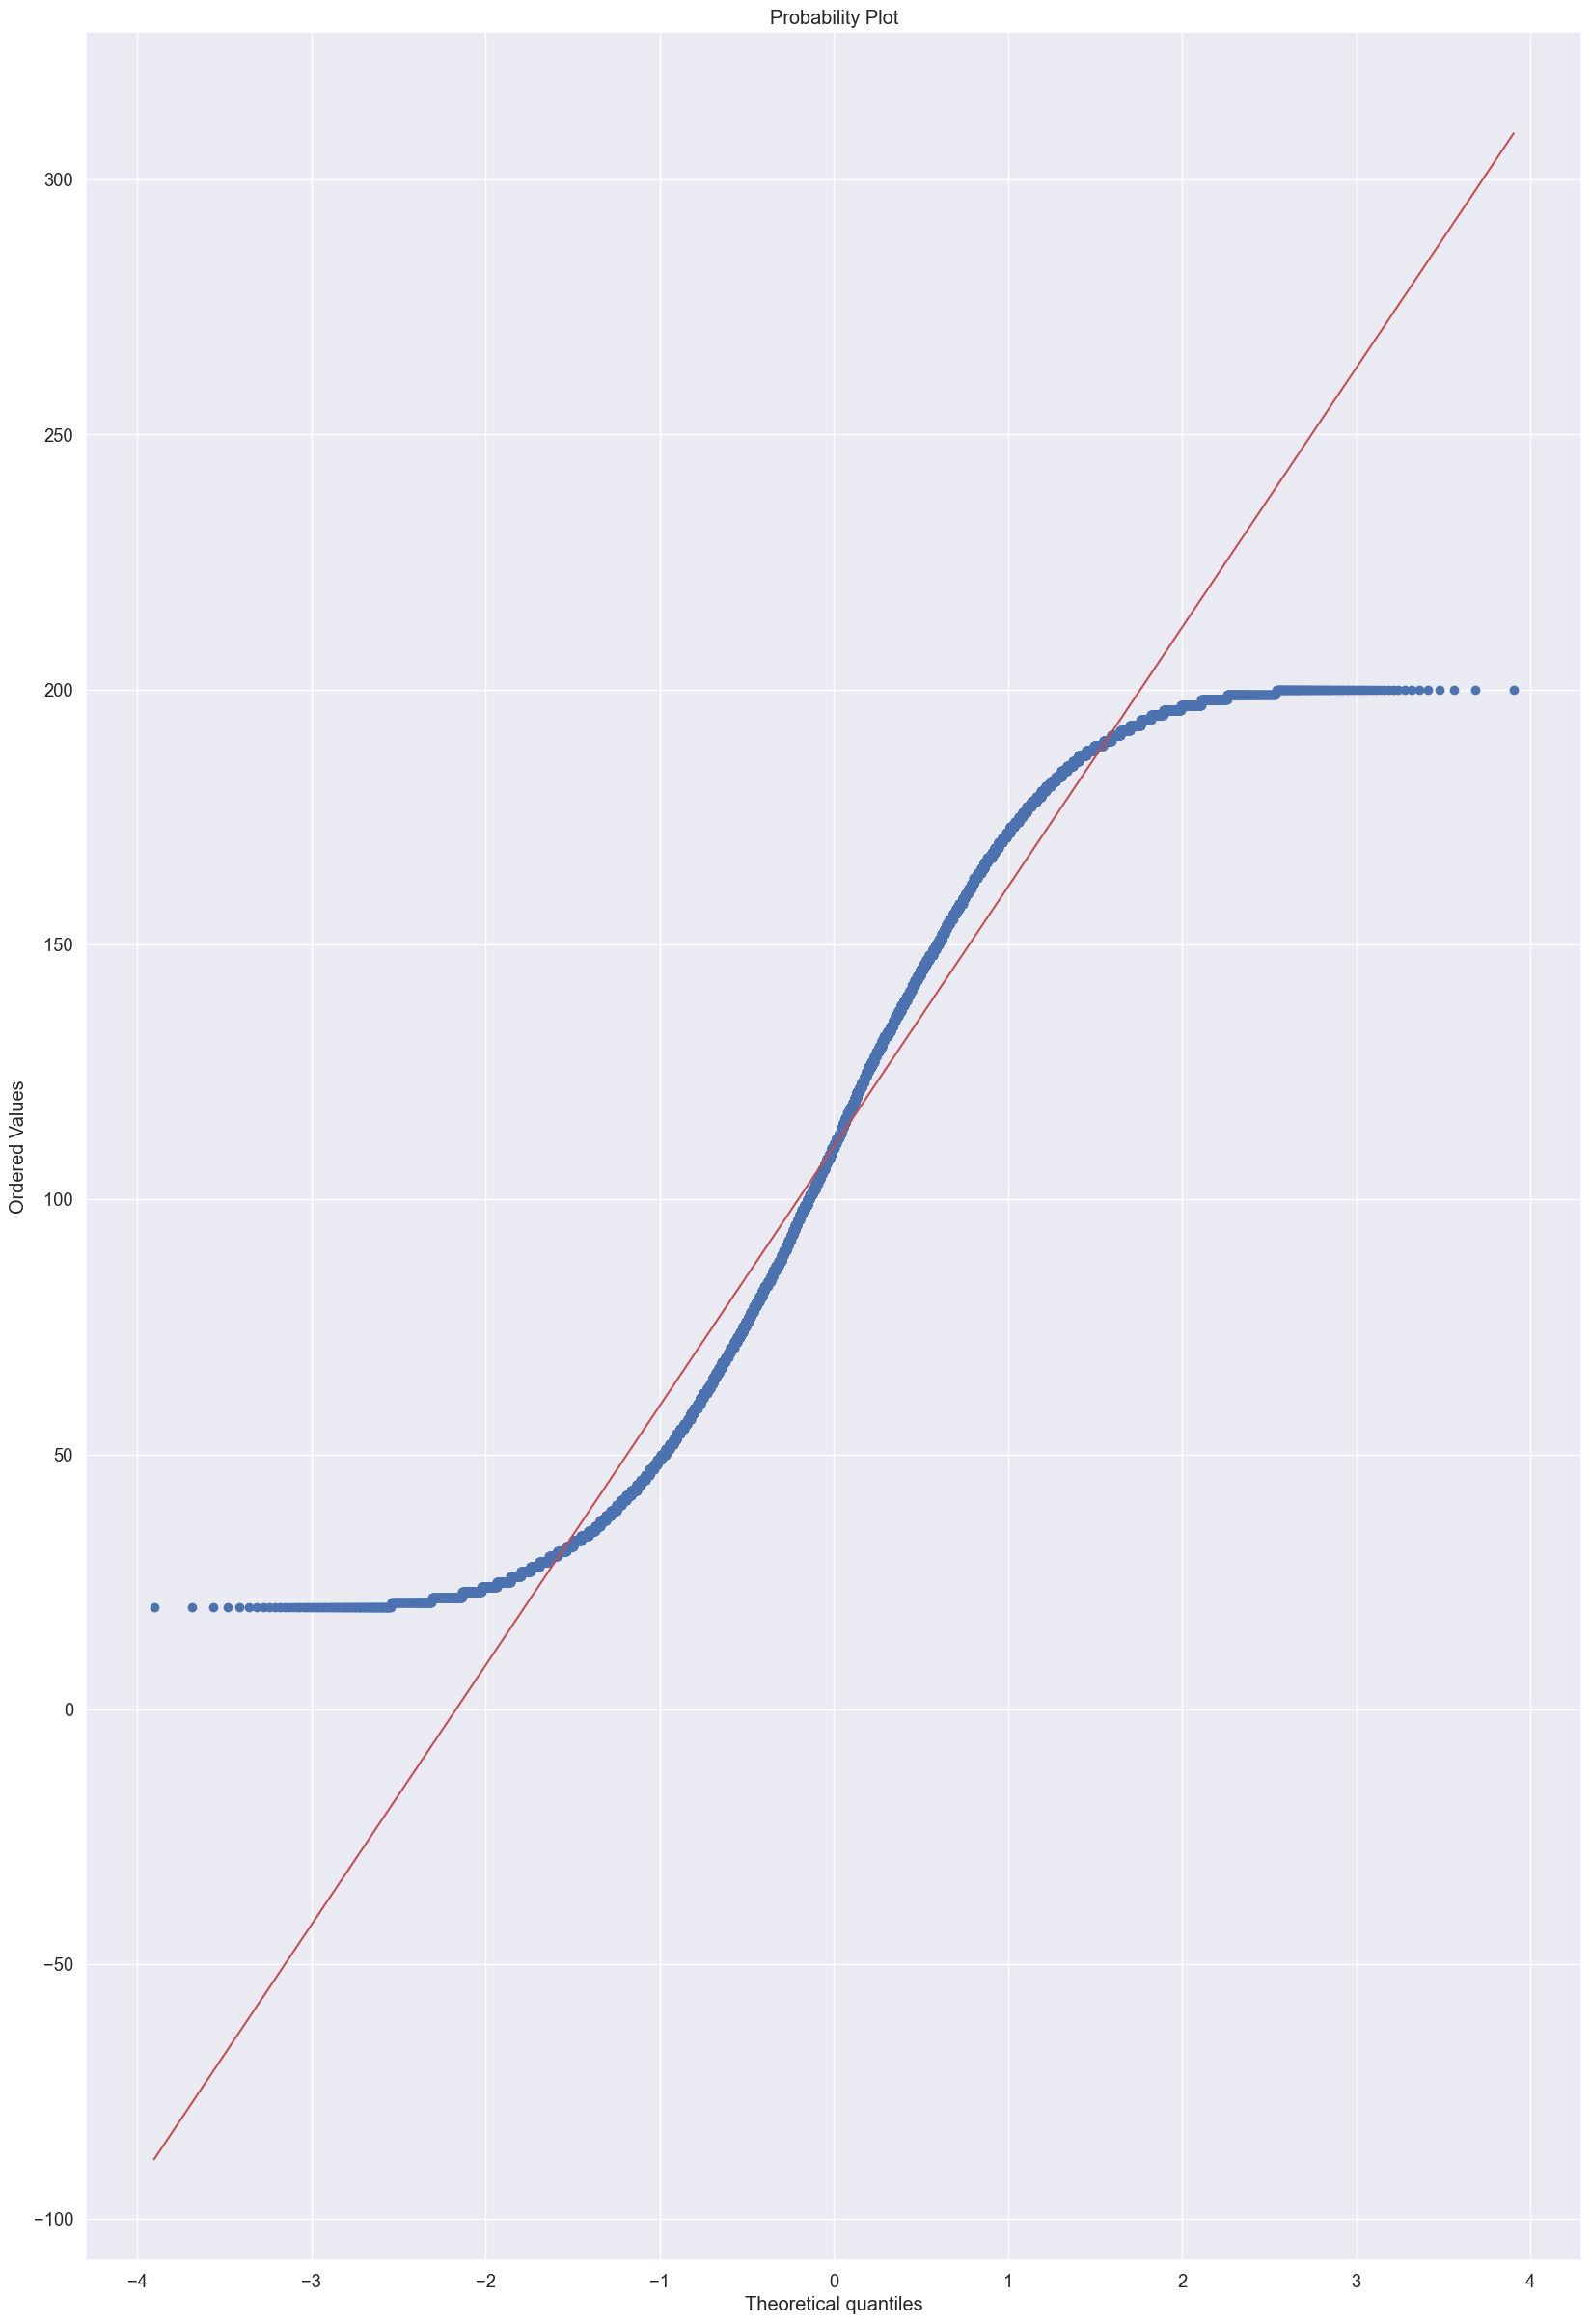

In [308]:
stats.probplot(df['Units Ordered'], dist="norm", plot=pylab)

((array([-3.9035789 , -3.68348813, -3.56288358, ...,  3.56288358,
          3.68348813,  3.9035789 ]),
  array([ -9.79,  -9.26,  -9.26, ..., 488.62, 496.03, 506.37])),
 (104.26505013628656, 141.7500786271024, 0.9588274711288135))

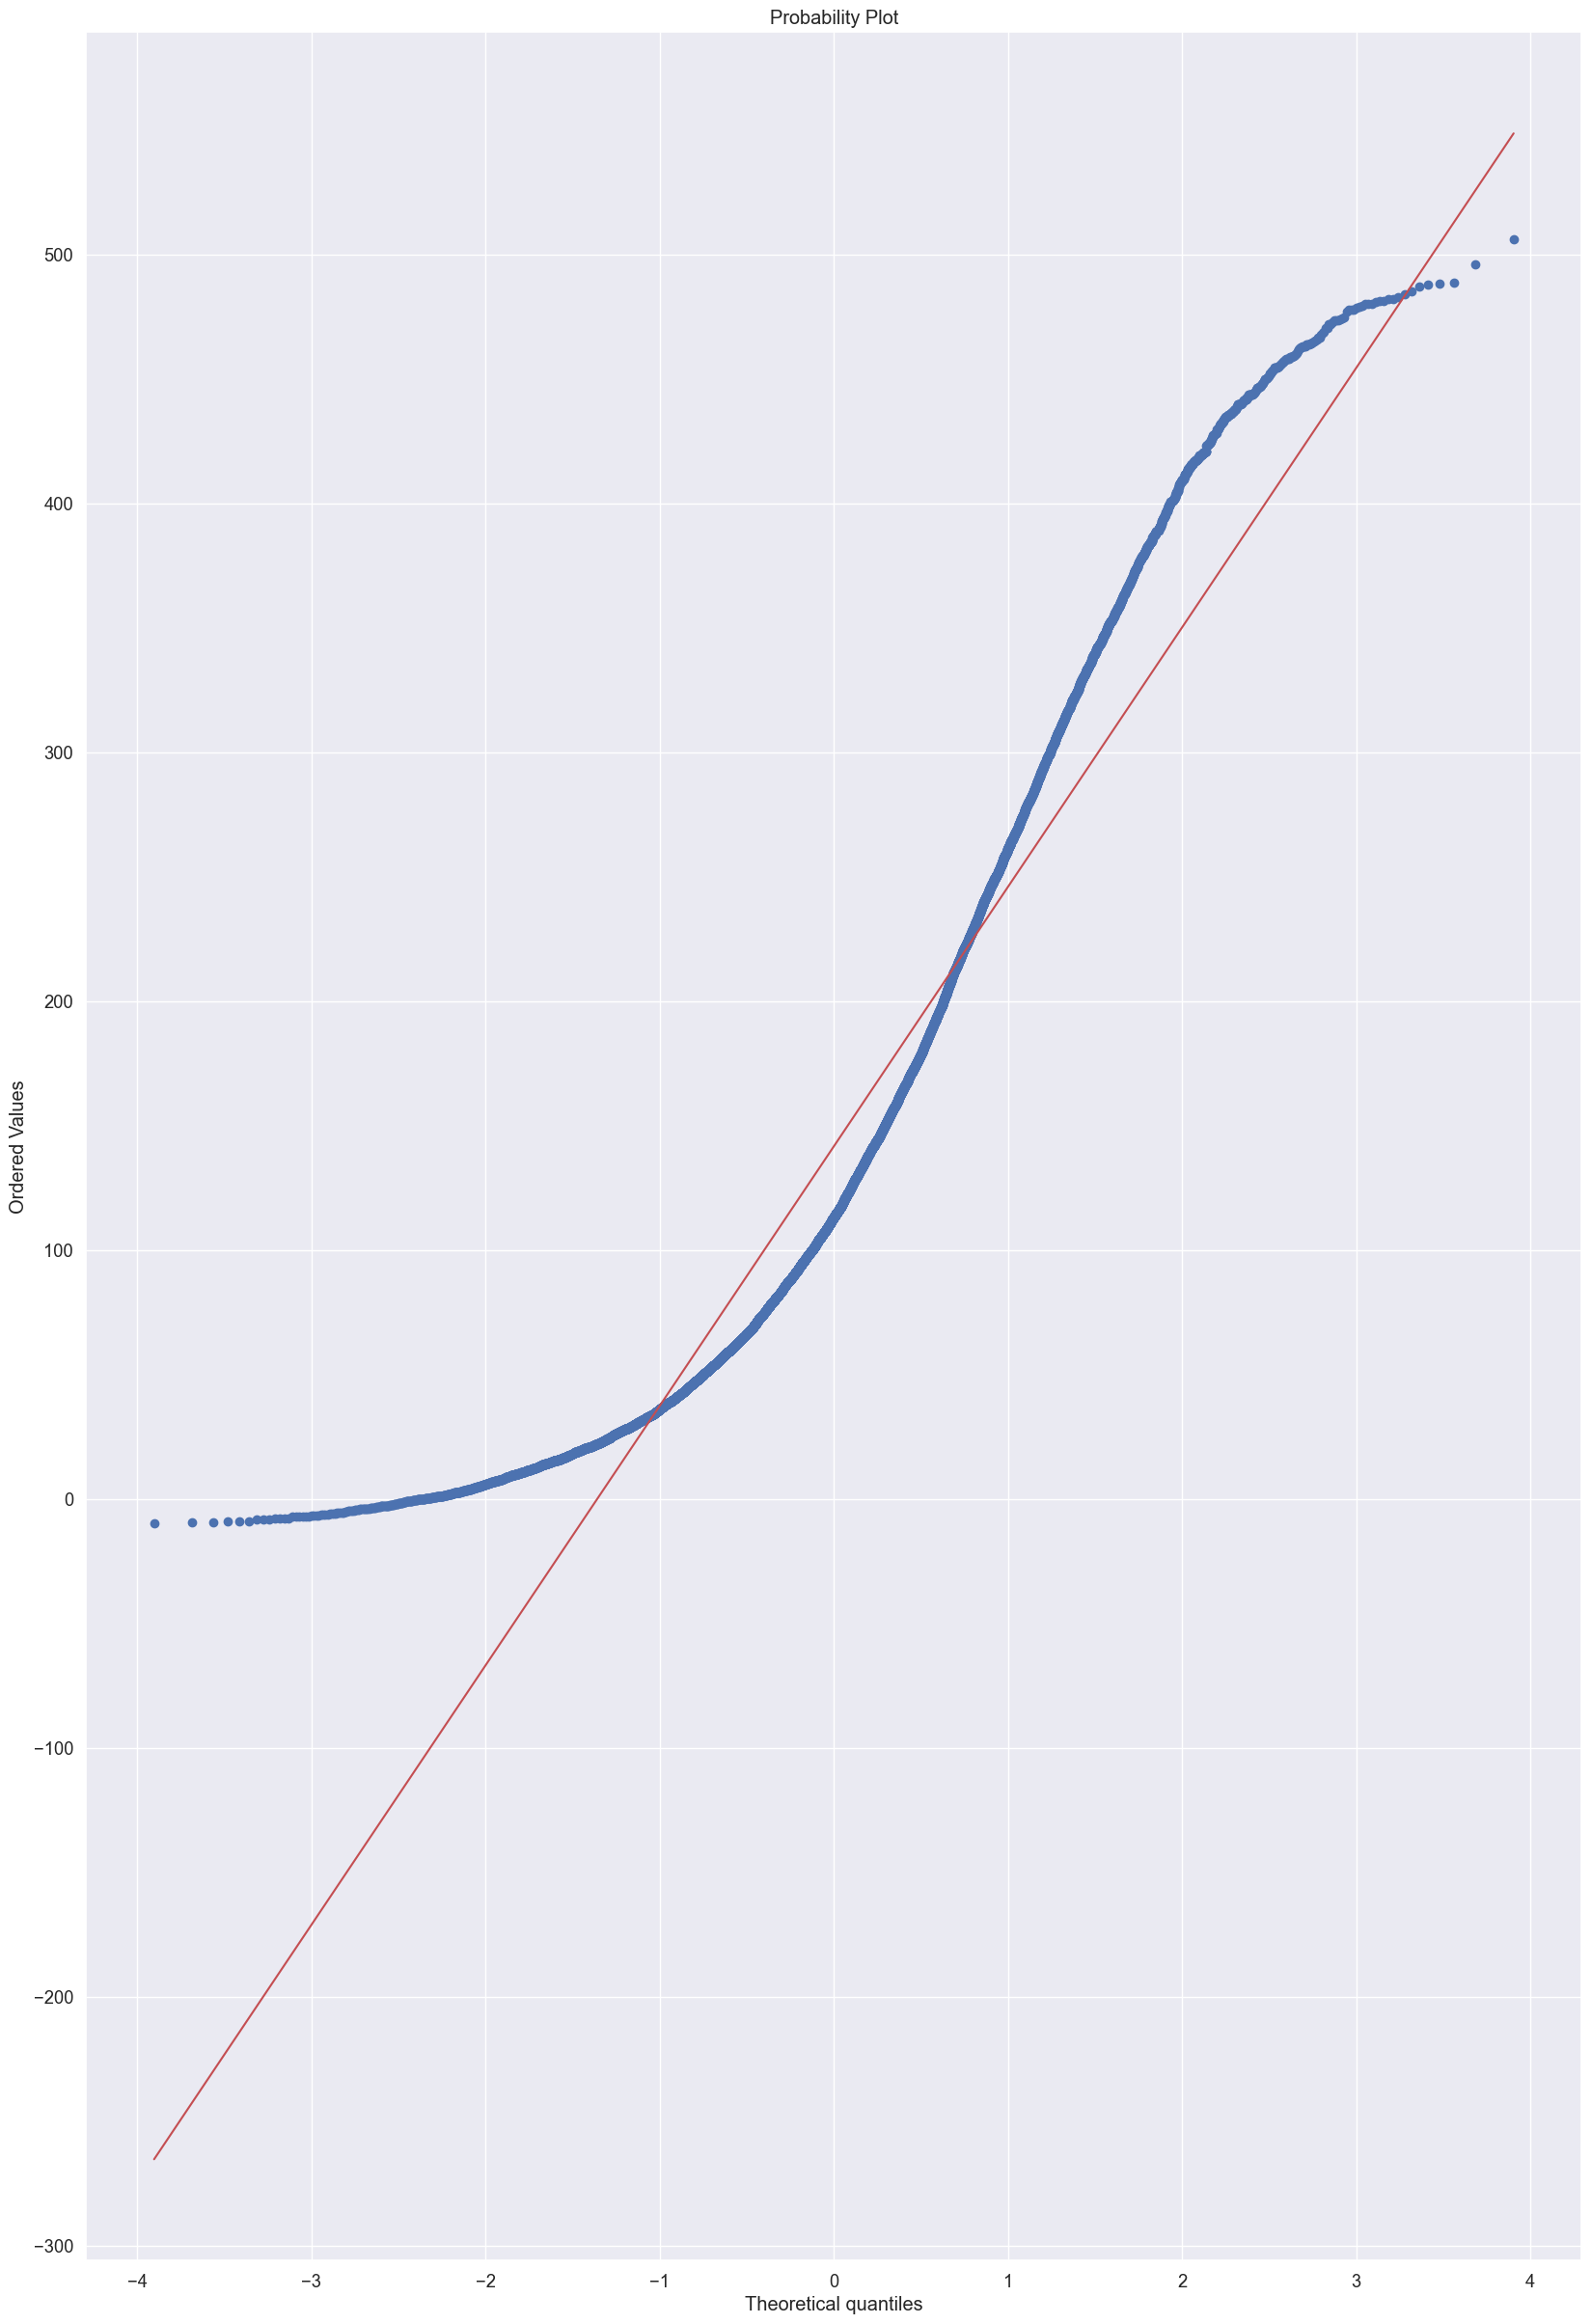

In [309]:
stats.probplot(df['Demand Forecast'], dist='norm', plot=pylab)

((array([-3.9035789 , -3.68348813, -3.56288358, ...,  3.56288358,
          3.68348813,  3.9035789 ]),
  array([ 0,  0,  0, ..., 20, 20, 20], dtype=int64)),
 (6.684271007517019, 10.005811568439762, 0.9418289090036671))

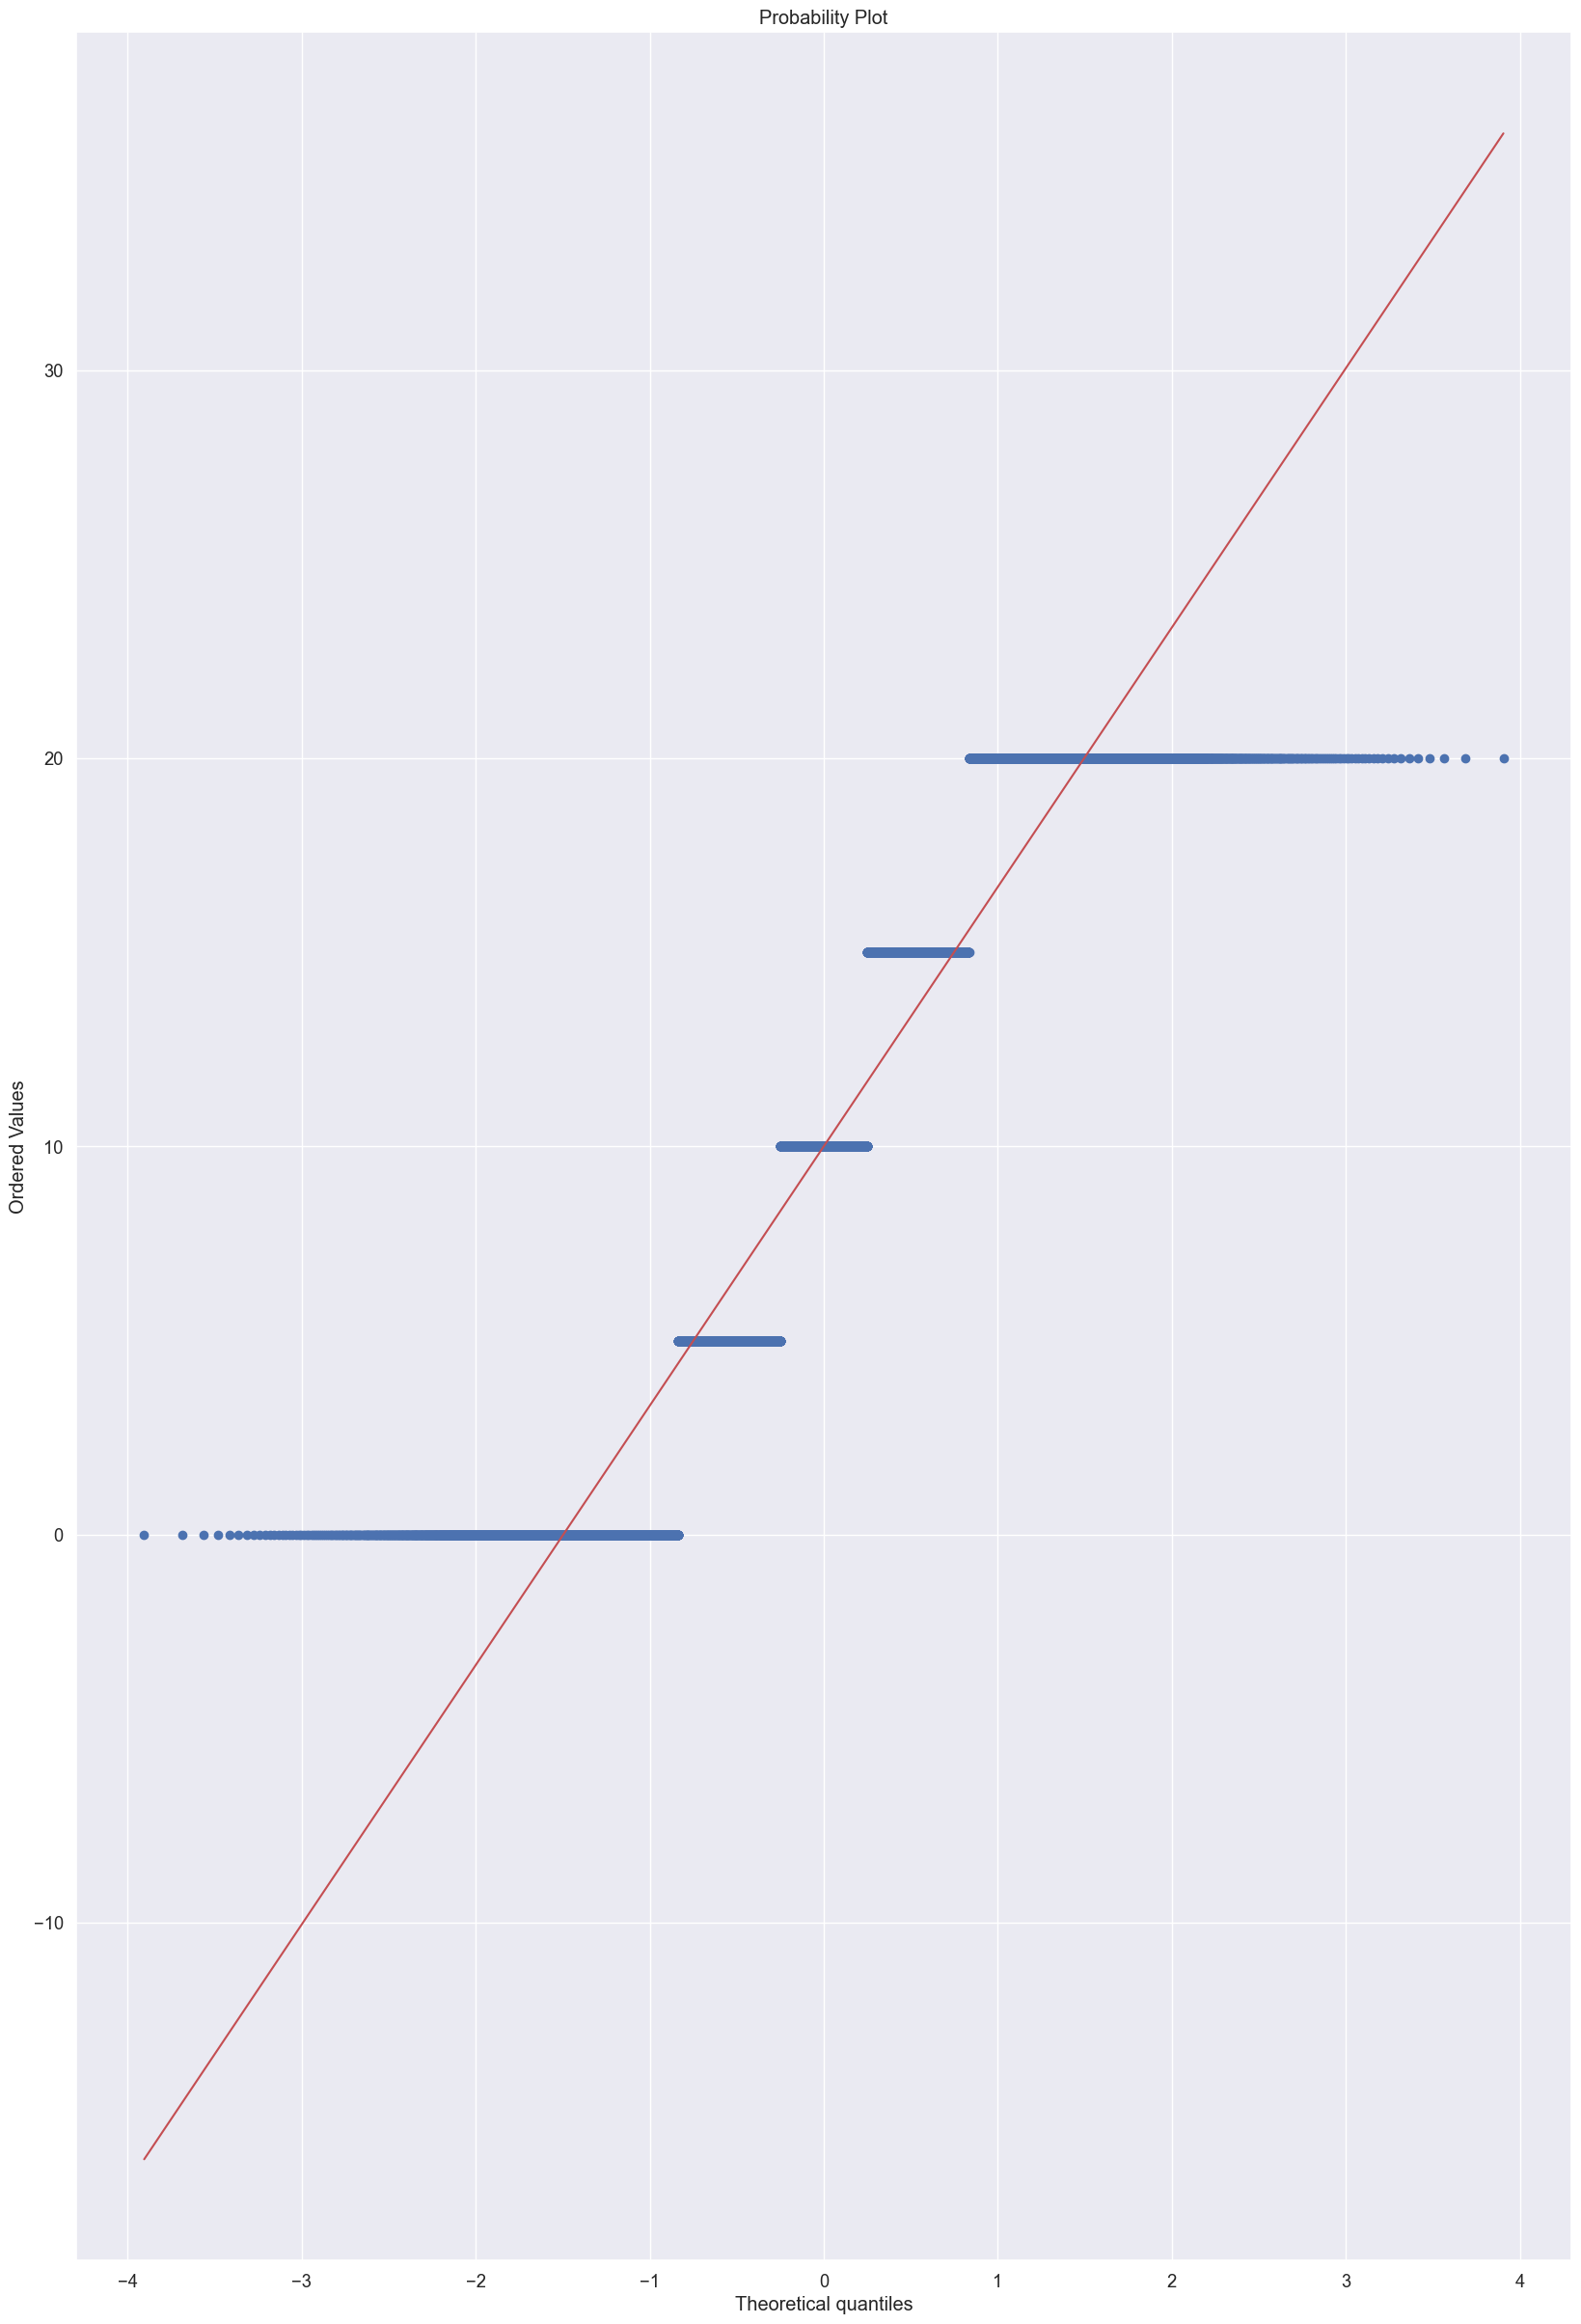

In [310]:
stats.probplot(df['Discount'], dist='norm', plot=pylab)

((array([-3.9035789 , -3.68348813, -3.56288358, ...,  3.56288358,
          3.68348813,  3.9035789 ]),
  array([10.  , 10.01, 10.03, ..., 99.98, 99.98, 99.99])),
 (25.55500122178699, 54.886601941747564, 0.9768770021227237))

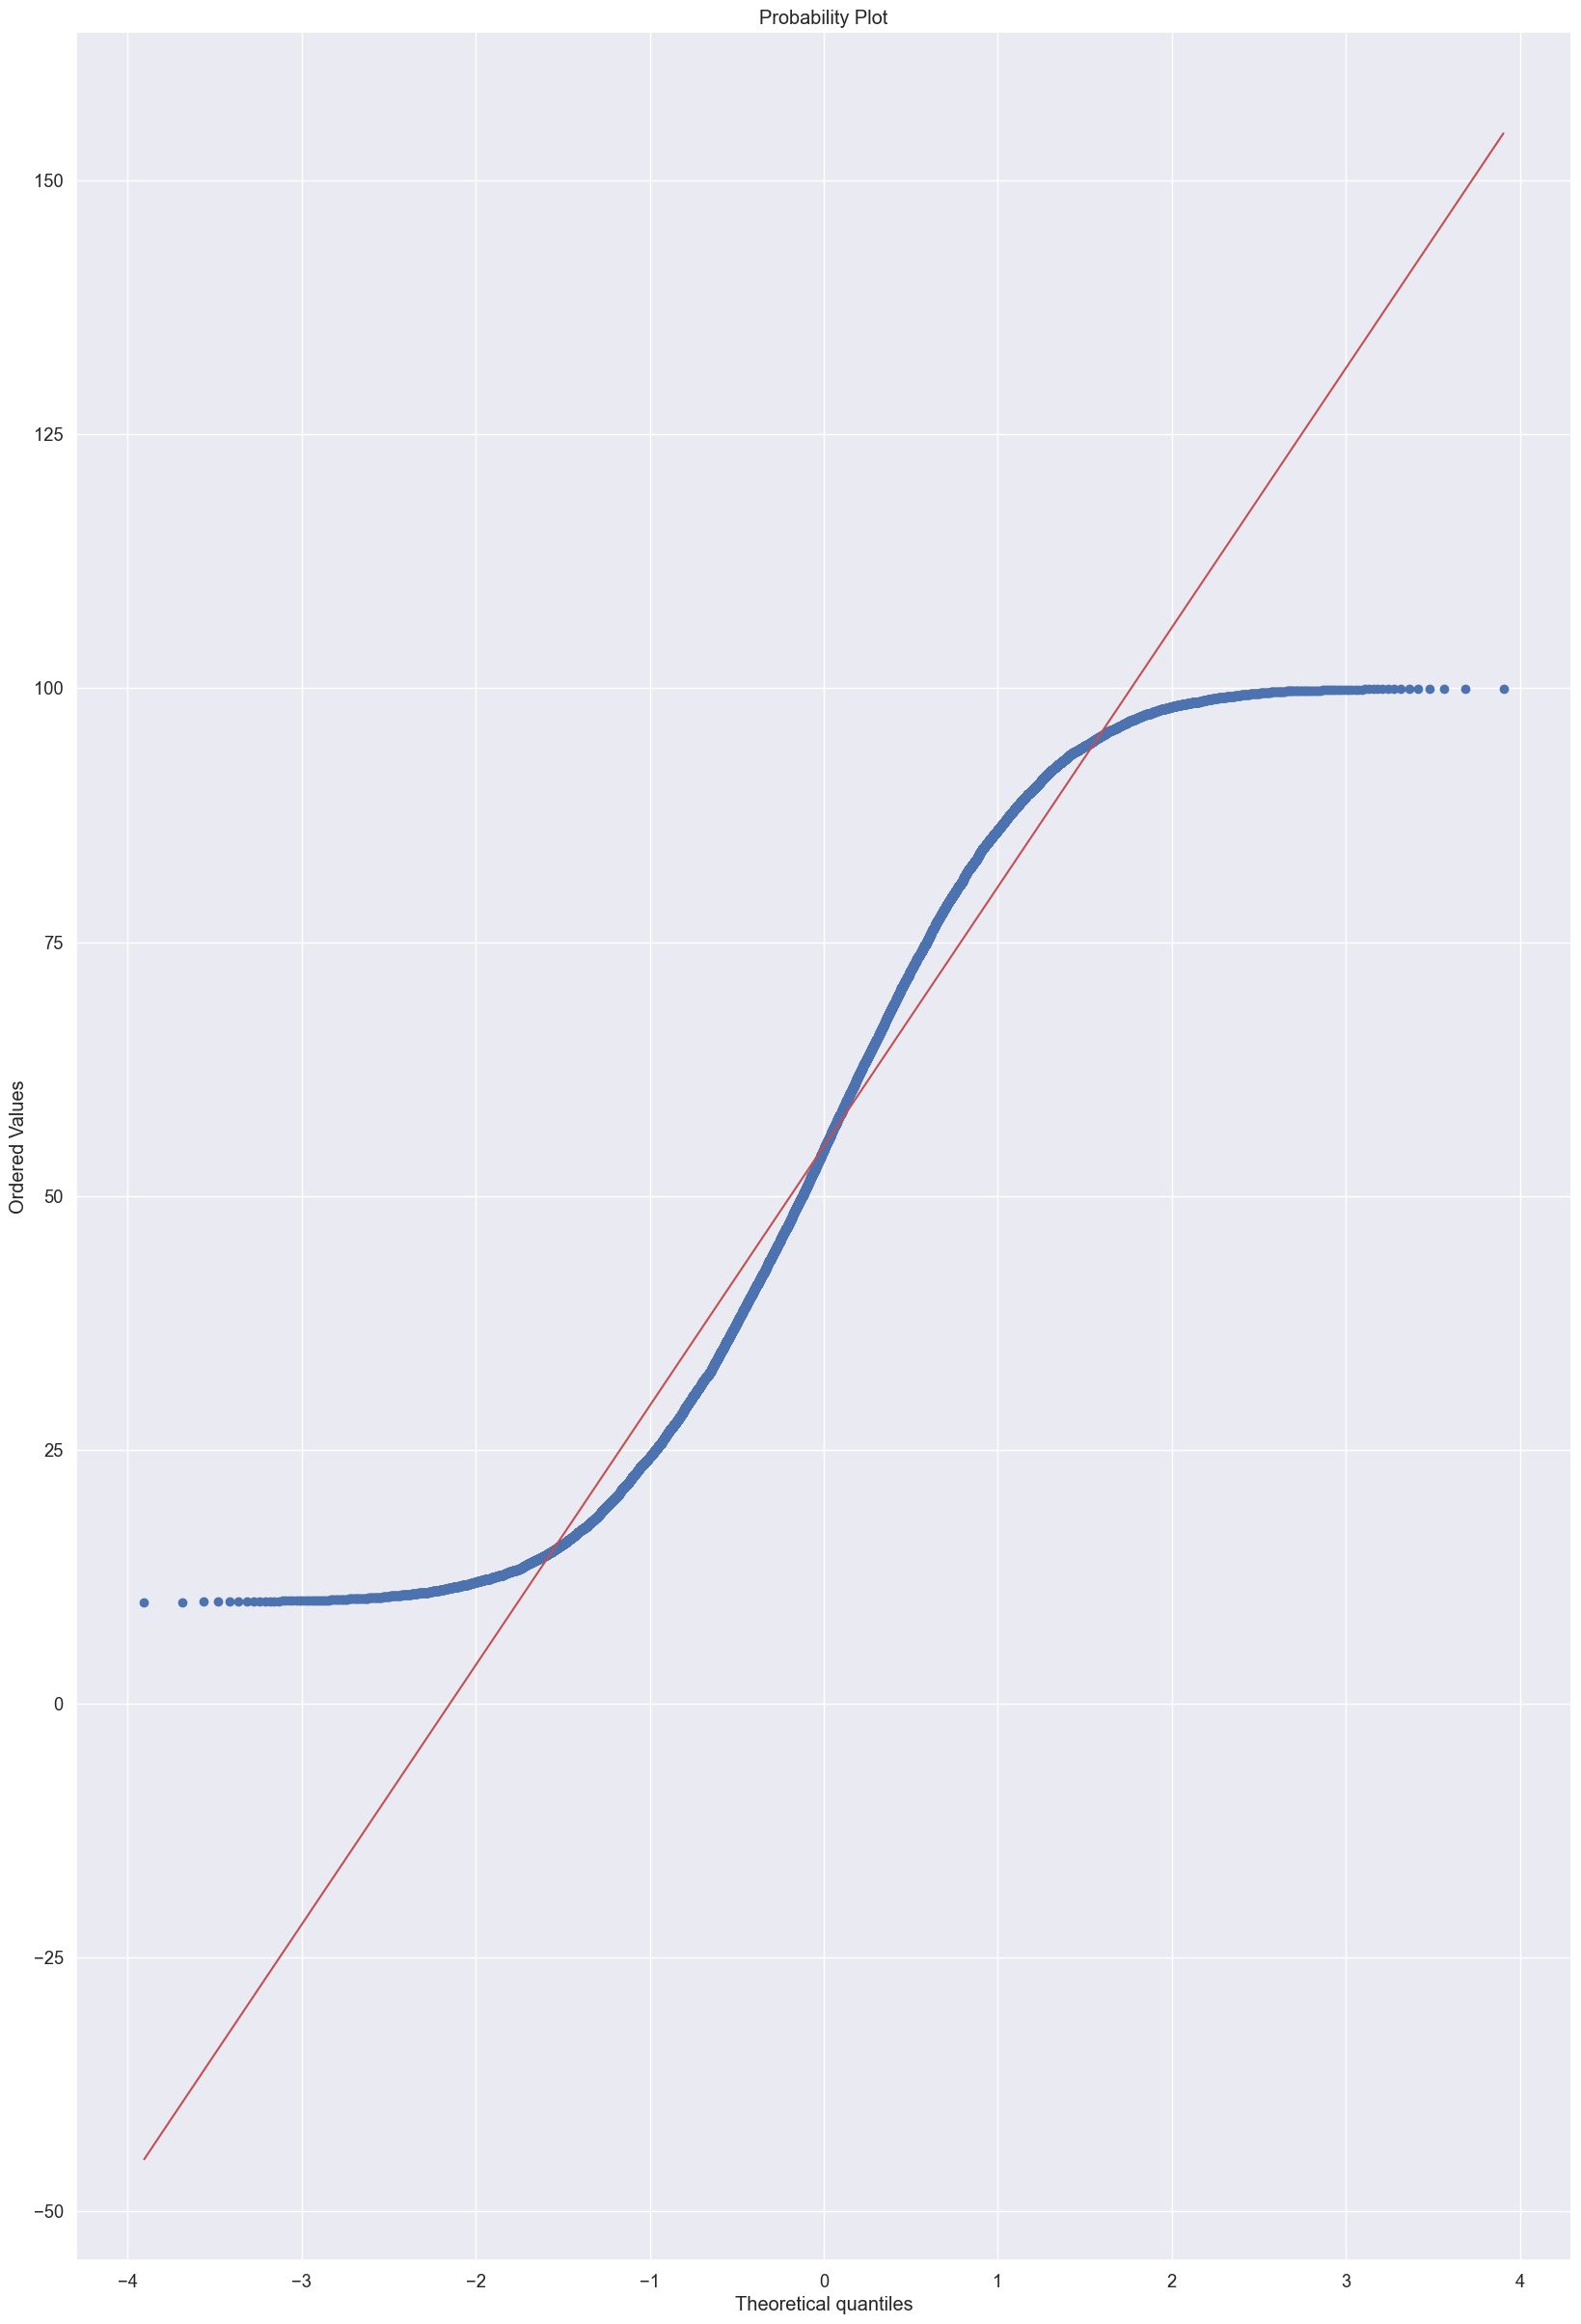

In [311]:
stats.probplot(df['Price'], dist='norm', plot=pylab)

((array([-3.9035789 , -3.68348813, -3.56288358, ...,  3.56288358,
          3.68348813,  3.9035789 ]),
  array([  5.31,   5.34,   5.45, ..., 104.58, 104.74, 104.81])),
 (25.784719592562976, 54.920651579379175, 0.9798641199040206))

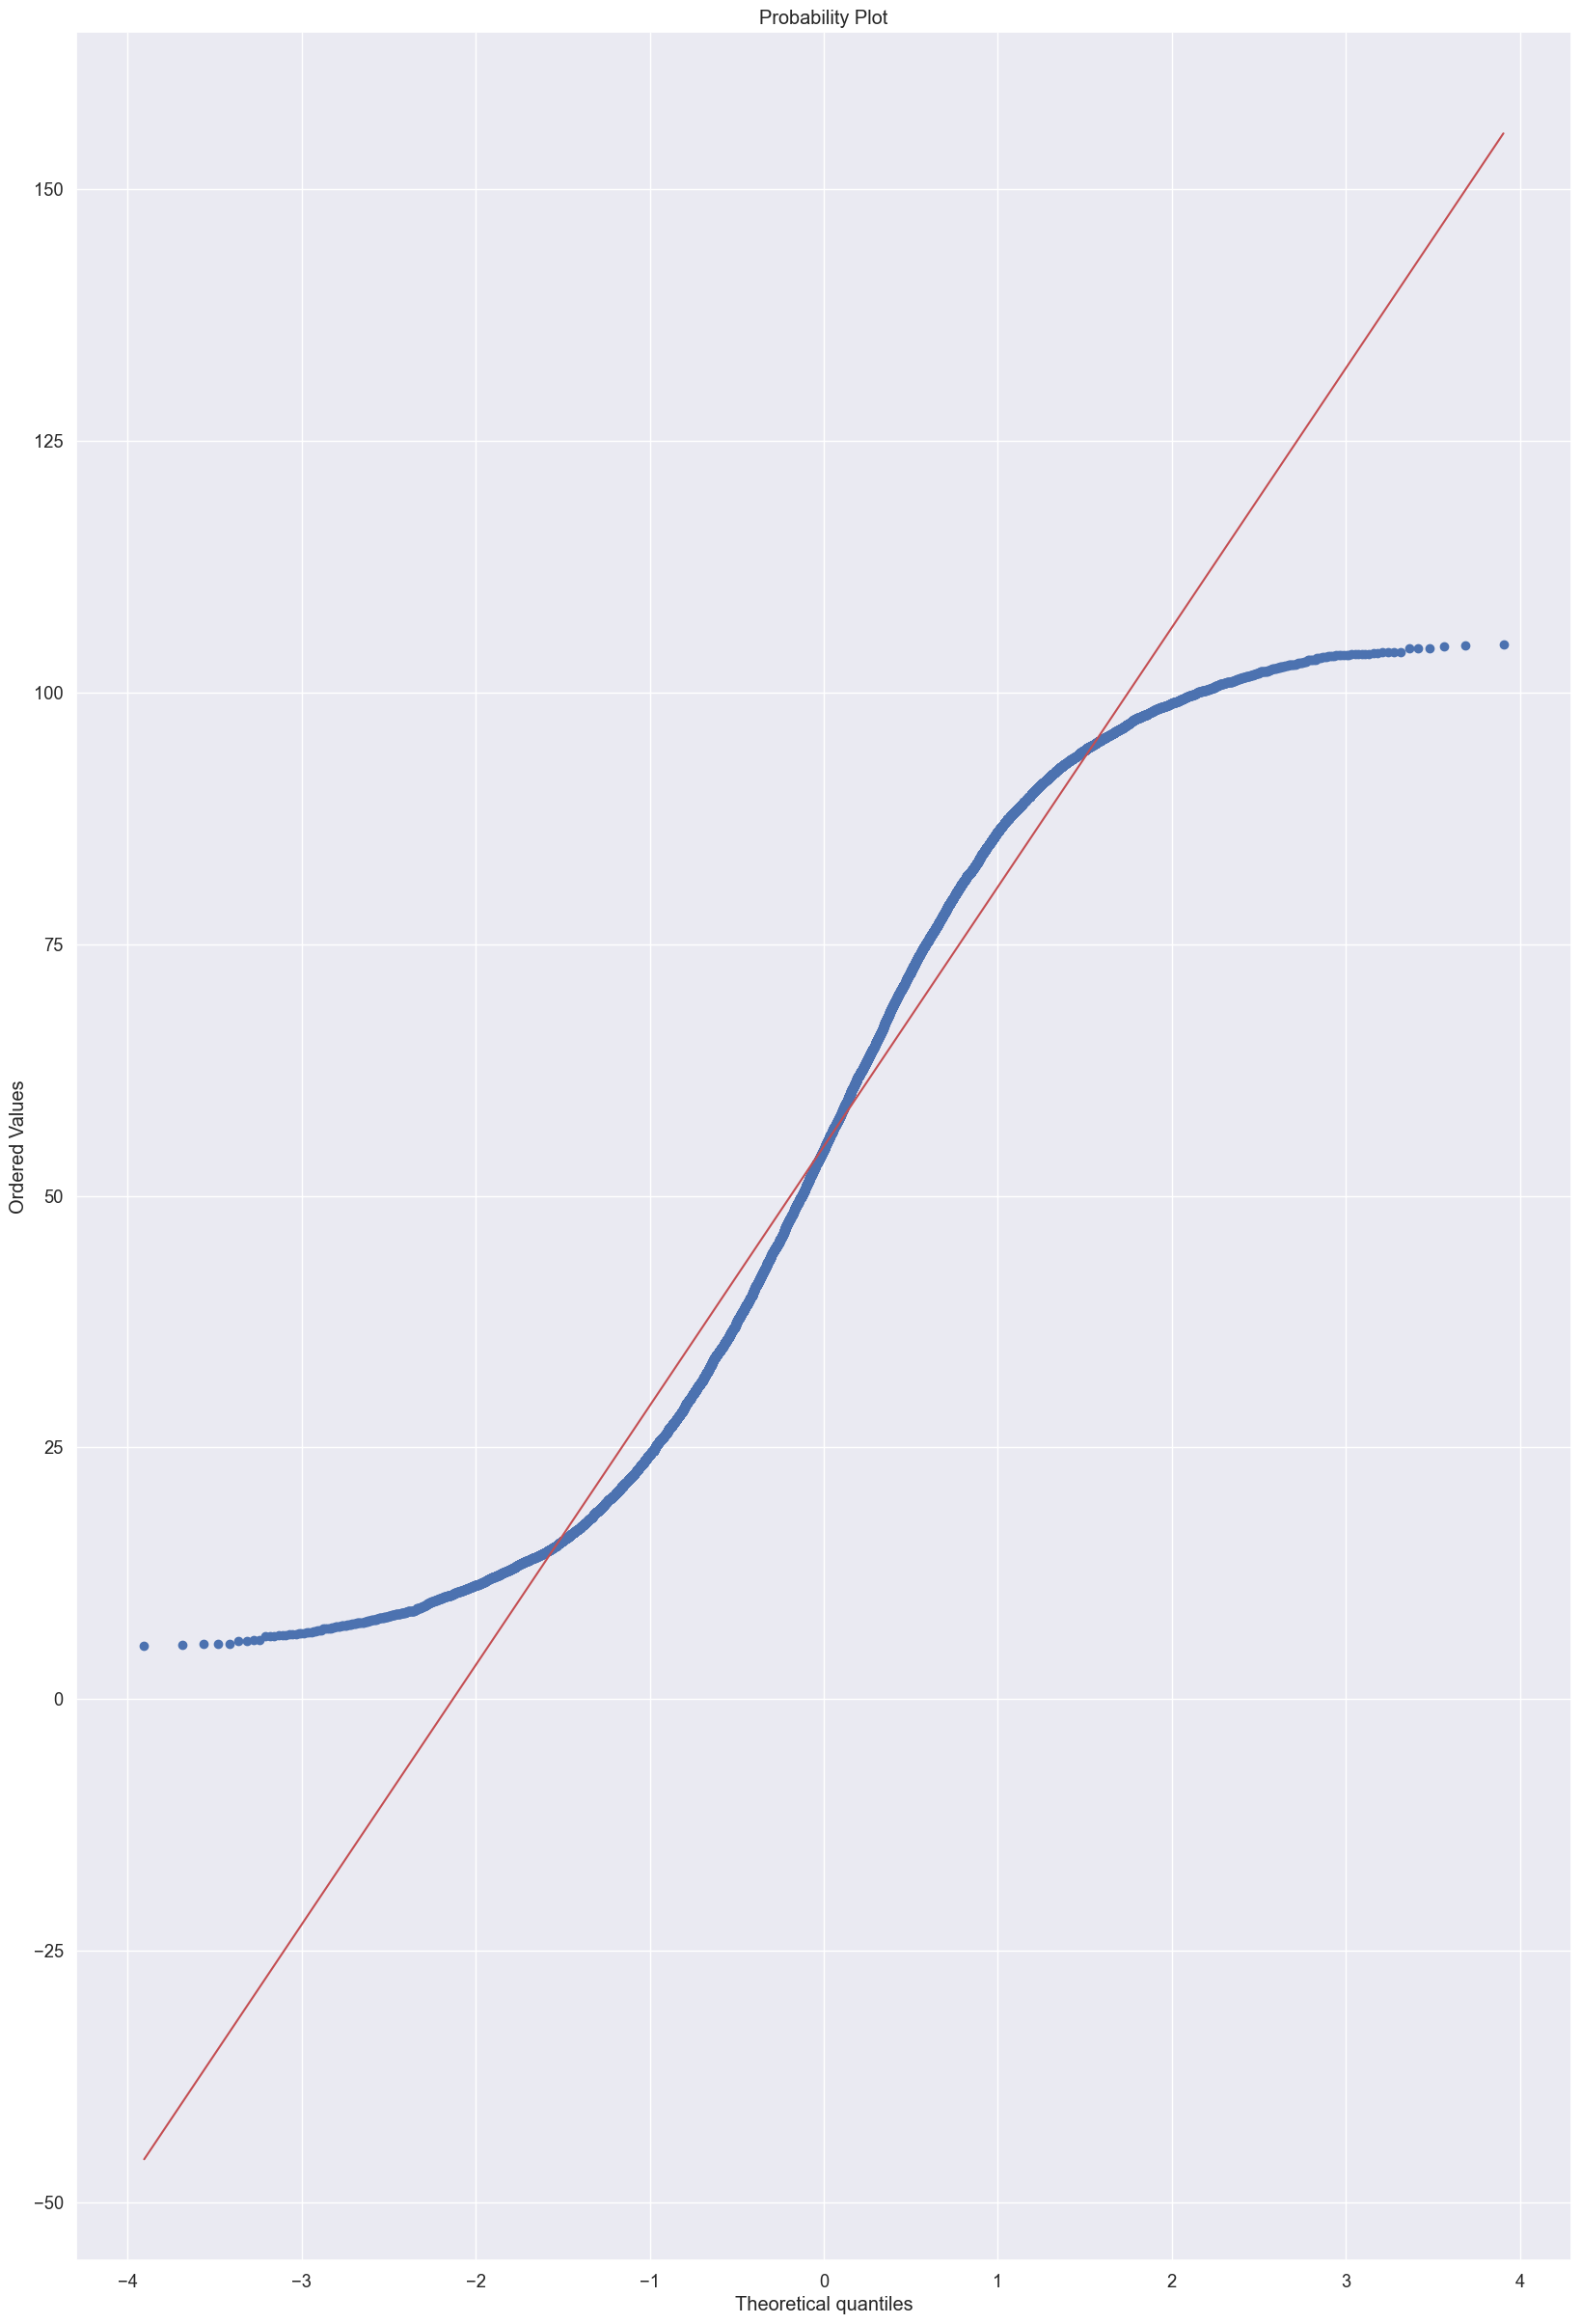

In [312]:
stats.probplot(df['Competitor Pricing'], dist='norm', plot=pylab)

### Data Transformation: Log Transformation 

In [313]:
valid_unit_solds = df[df['Units Sold'] > 0]['Units Sold']
valid_unit_solds

7        312
11        24
13        12
14       369
17       151
        ... 
73068     47
73071     63
73075    182
73078     44
73097     36
Name: Units Sold, Length: 14551, dtype: int64

((array([-3.90233508, -3.68217808, -3.5615343 , ...,  3.5615343 ,
          3.68217808,  3.90233508]),
  array([0.        , 0.        , 0.        , ..., 6.18414889, 6.18620862,
         6.19236249])),
 (1.069659674135855, 4.48854578516479, 0.9609349321232505))

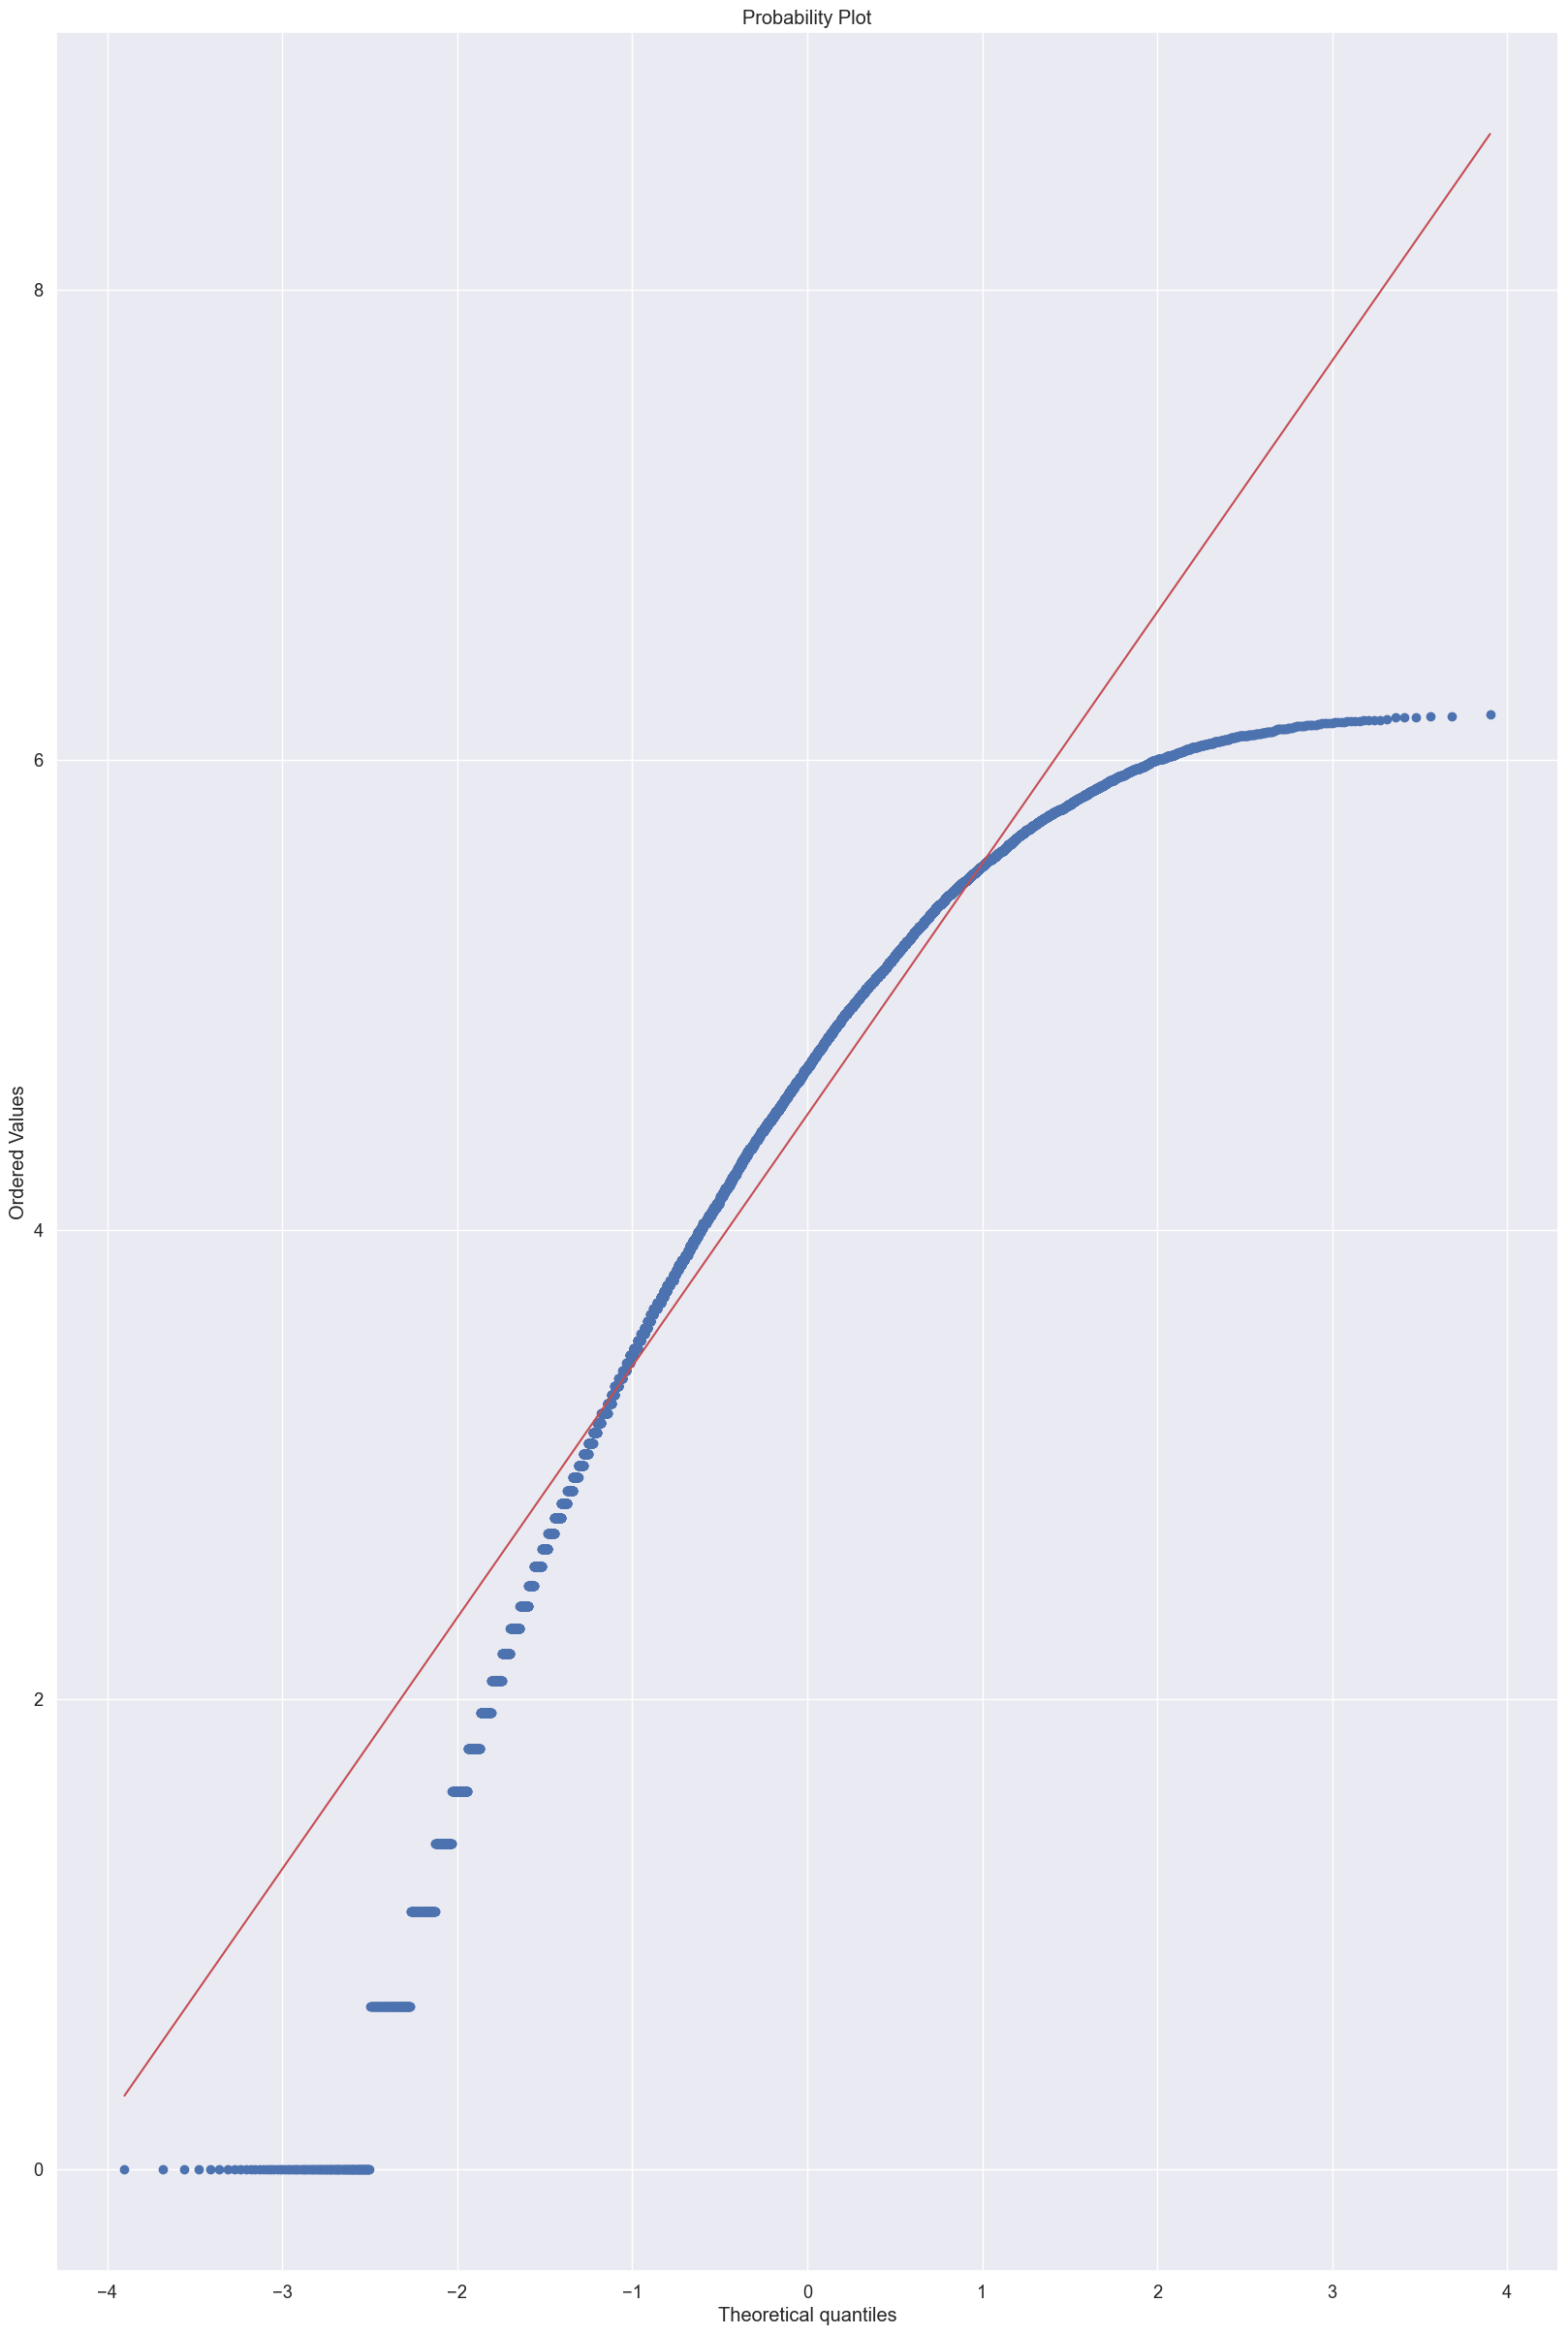

In [314]:
stats.probplot(np.log(valid_unit_solds), dist='norm', plot=pylab)

### Trend in Unit Solds 

In [315]:
df.columns

Index(['Date', 'Store ID', 'Product ID', 'Category', 'Region',
       'Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast',
       'Price', 'Discount', 'Weather Condition', 'Holiday/Promotion',
       'Competitor Pricing', 'Seasonality', 'Month'],
      dtype='object')

In [316]:
df['Date'] = pd.to_datetime(df['Date'], '%d/%m/%Y') 
df['Date']

7       2022-01-01
11      2022-01-01
13      2022-01-01
14      2022-01-01
17      2022-01-01
           ...    
73068   2024-01-01
73071   2024-01-01
73075   2024-01-01
73078   2024-01-01
73097   2024-01-01
Name: Date, Length: 14626, dtype: datetime64[ns]

## Auto EDA Using Sweetviz 

                                             |          | [  0%]   00:00 -> (? left)


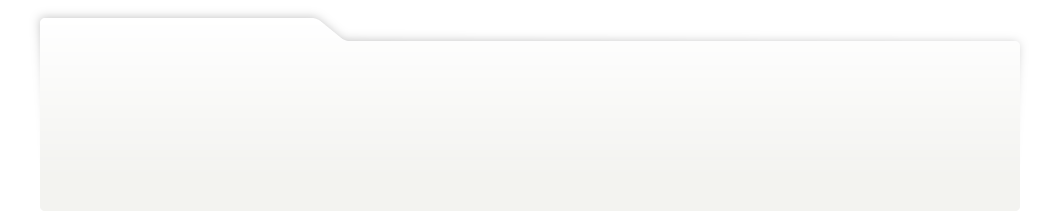
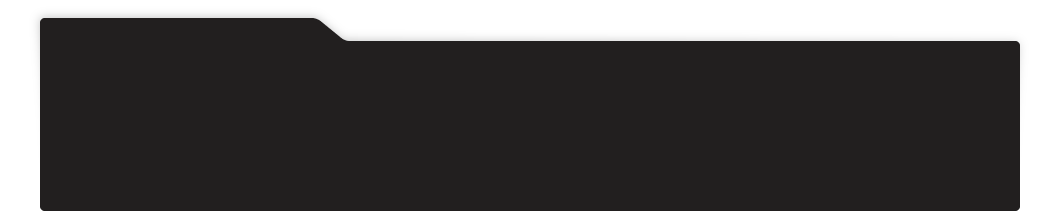
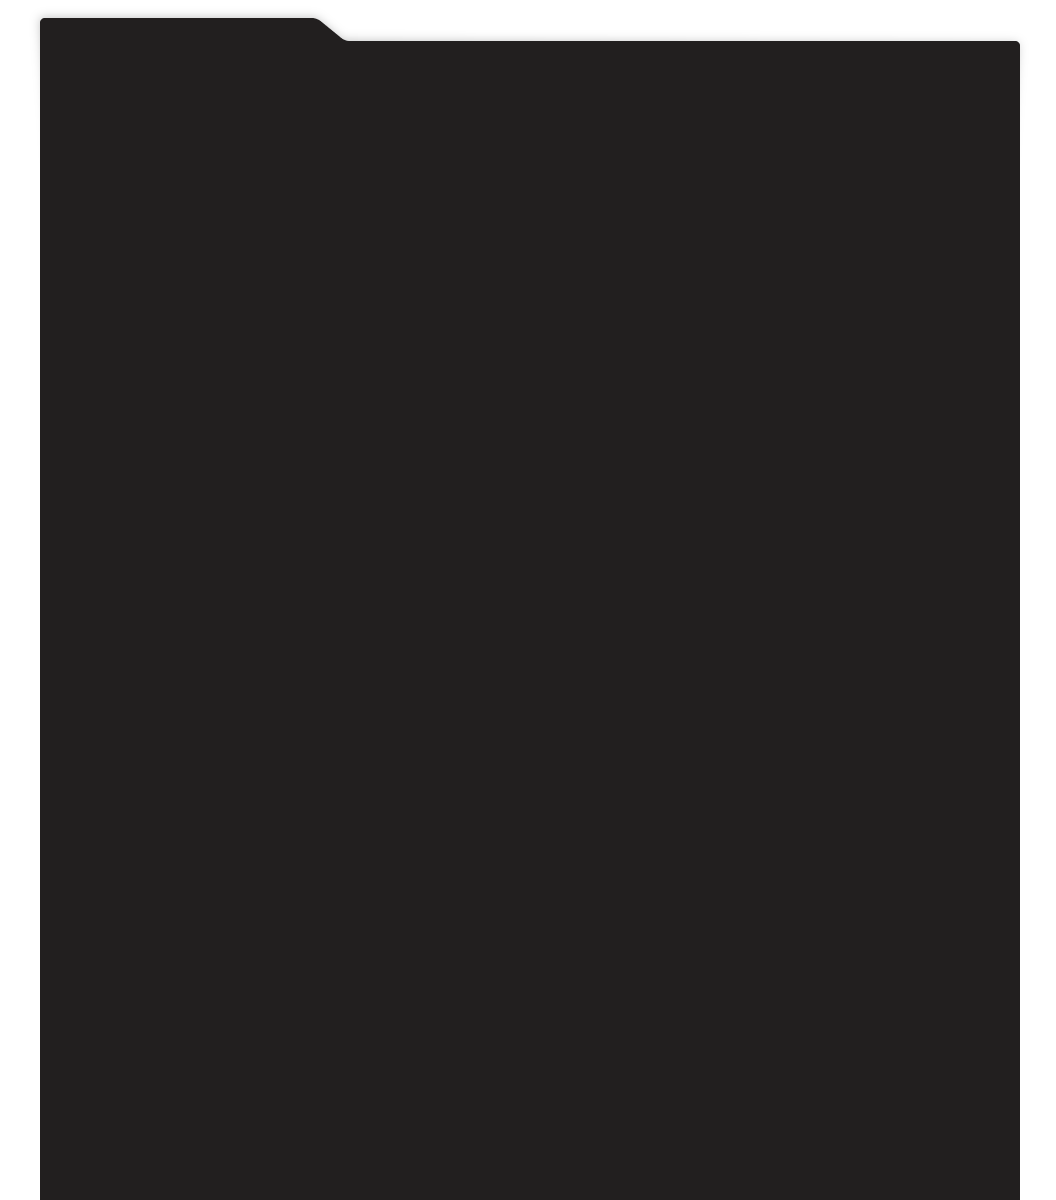
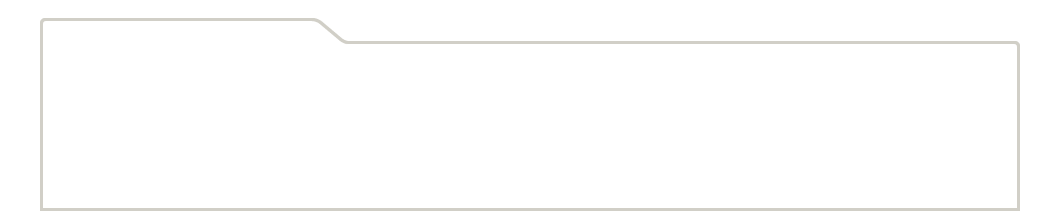
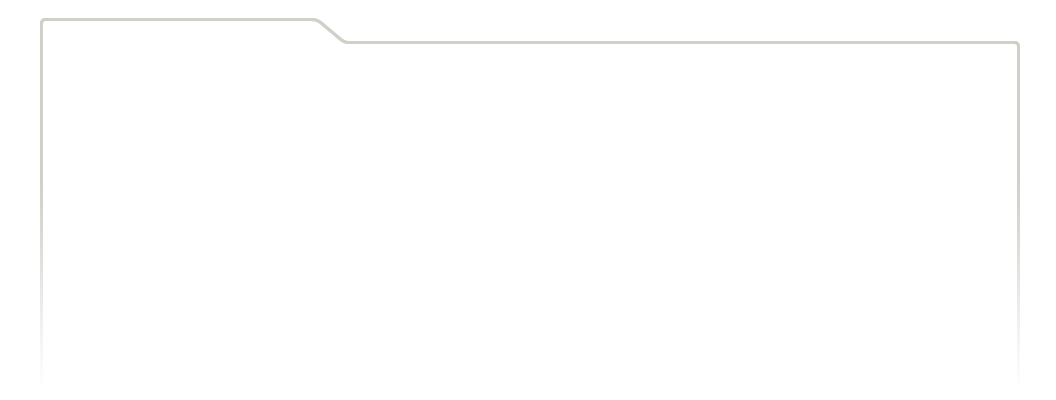
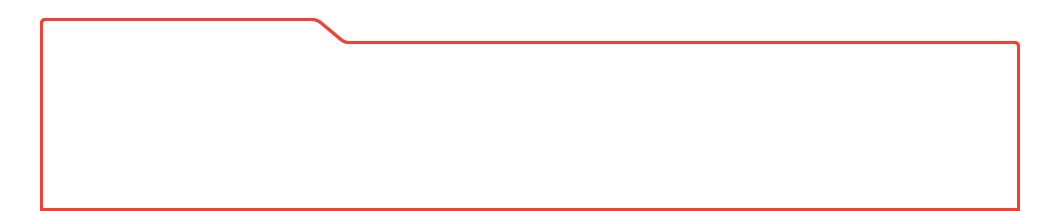
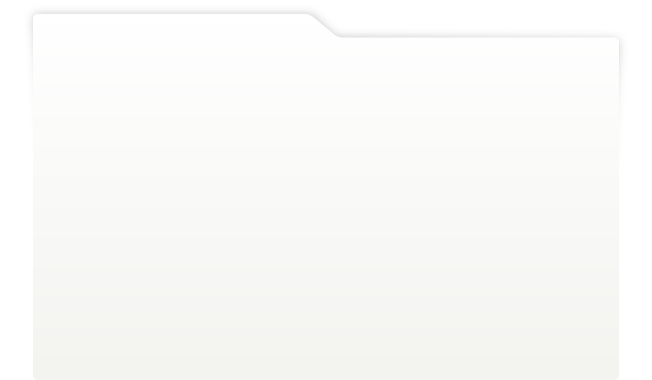
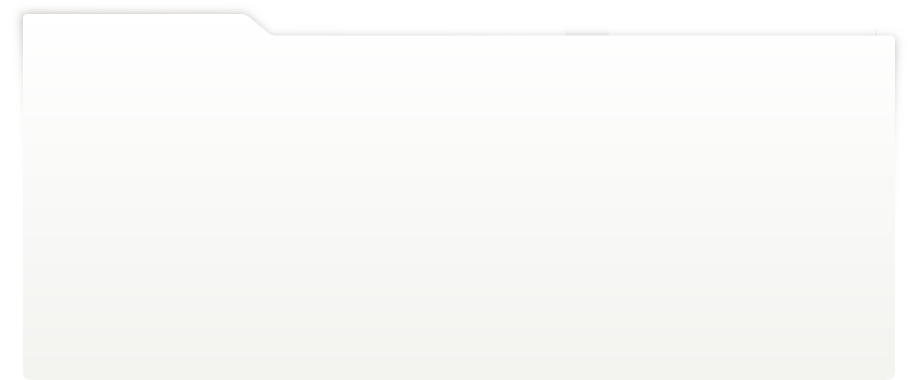
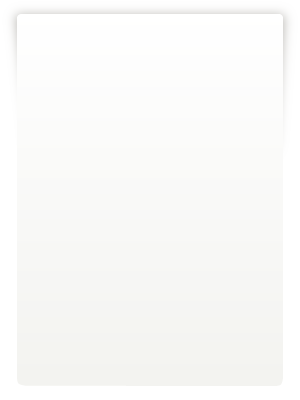
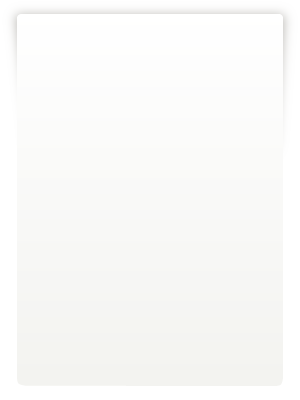
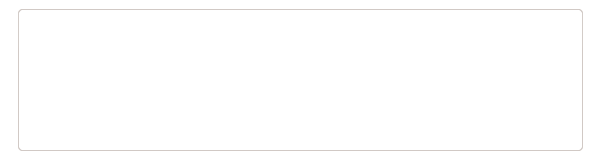
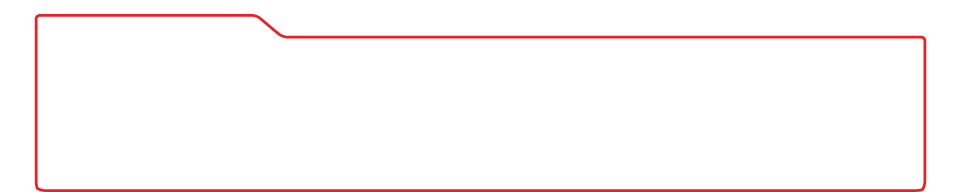
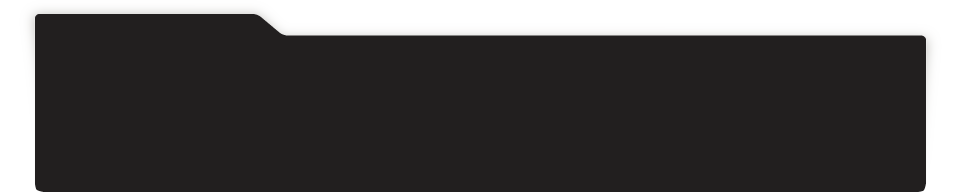
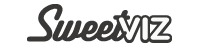
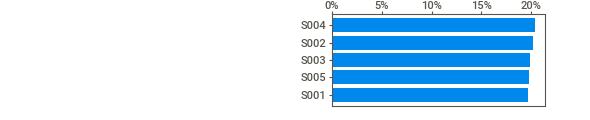
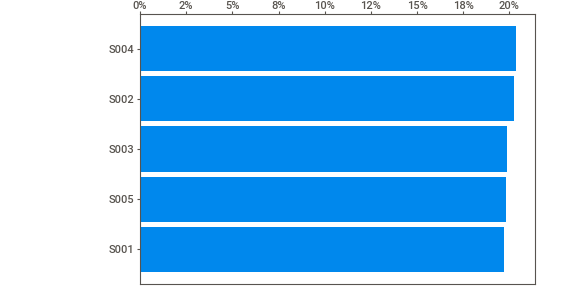
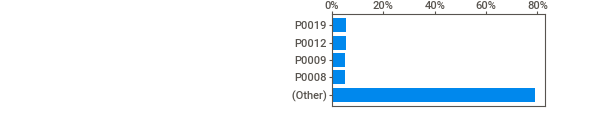
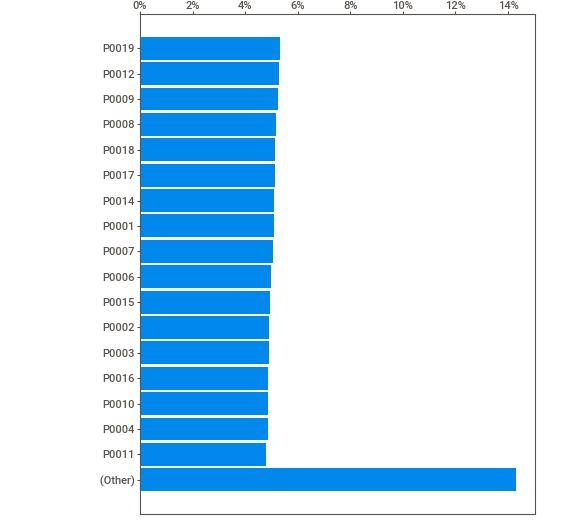
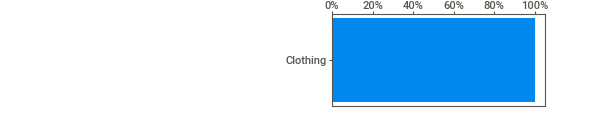
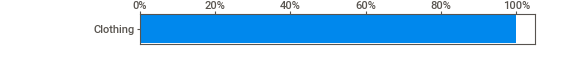
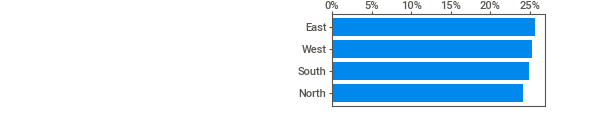
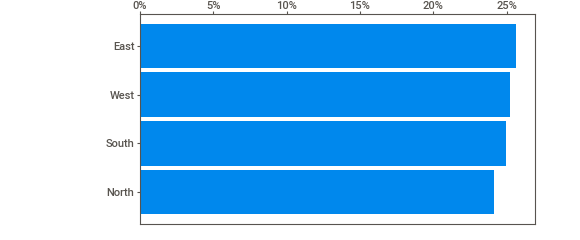
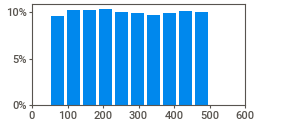
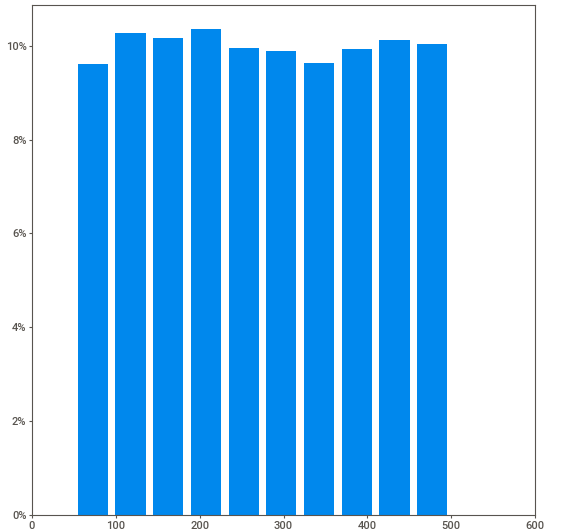
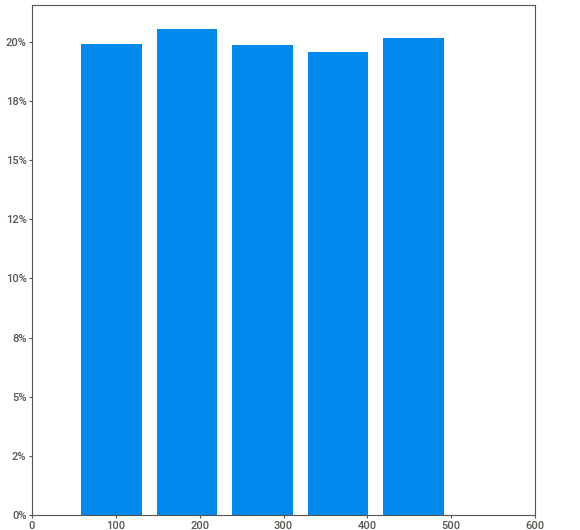
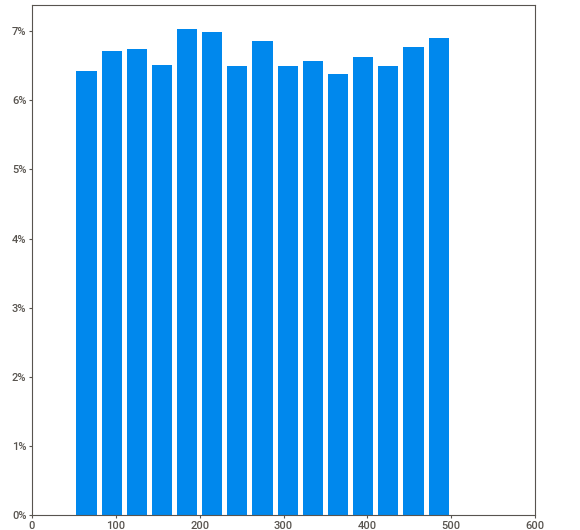
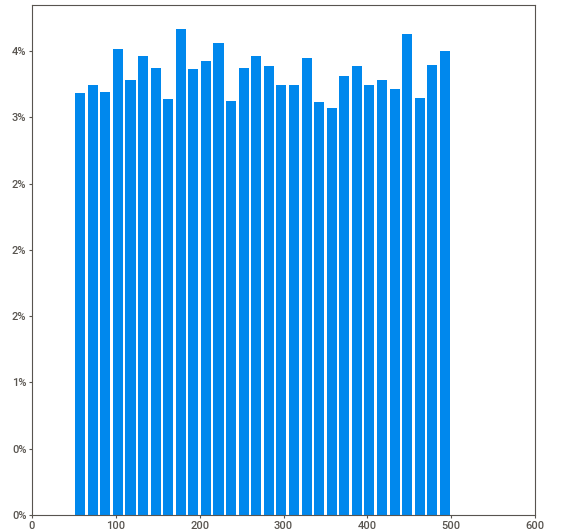
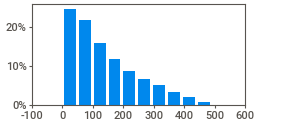
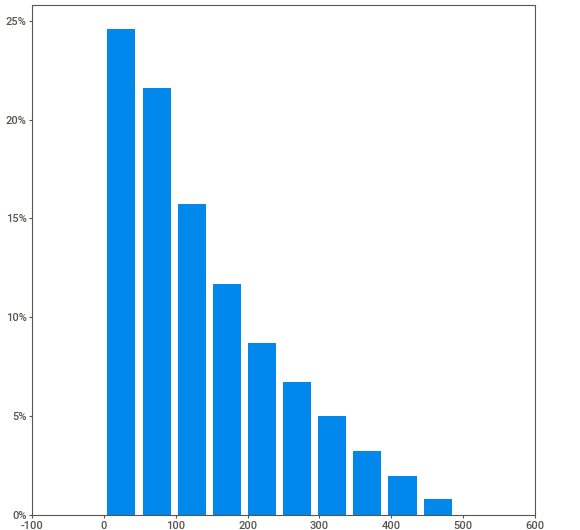
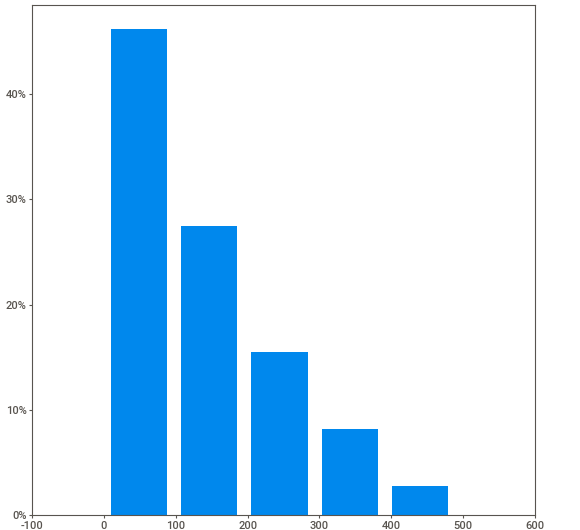
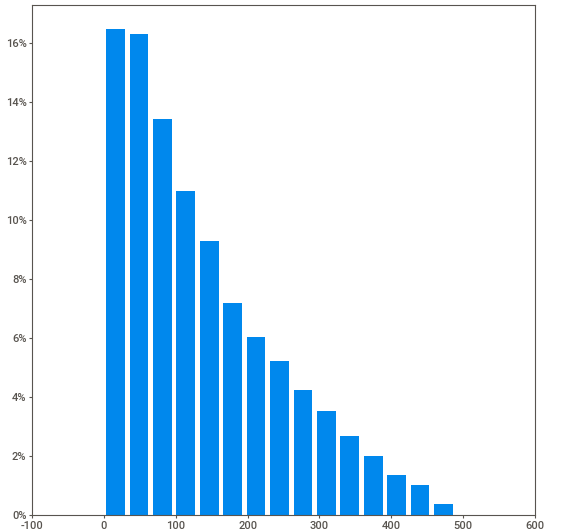
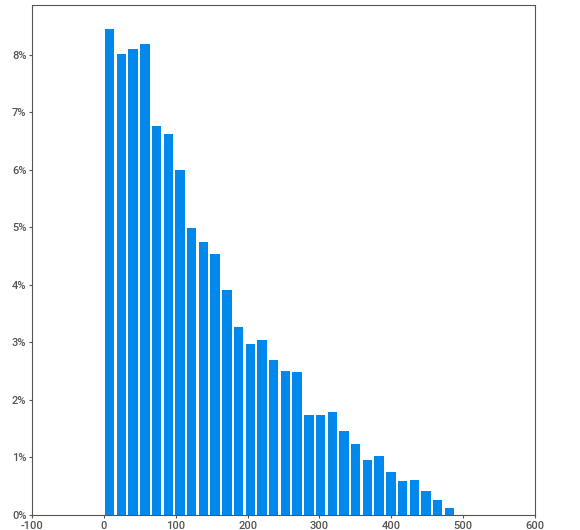
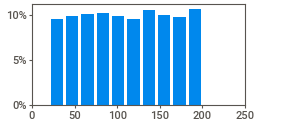
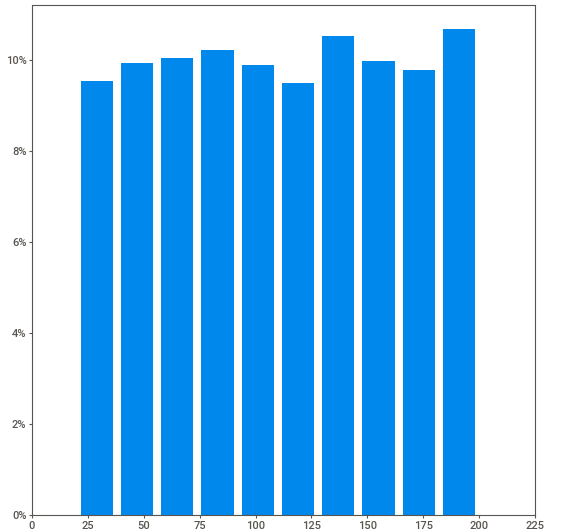
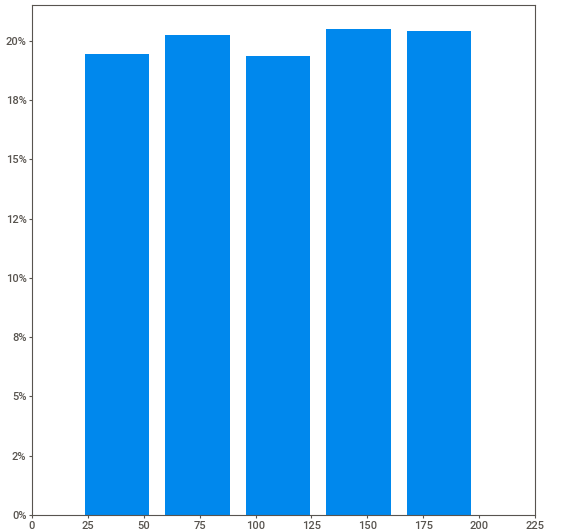
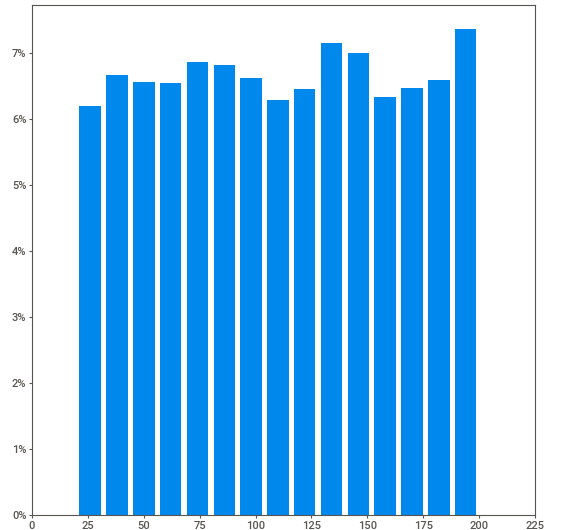
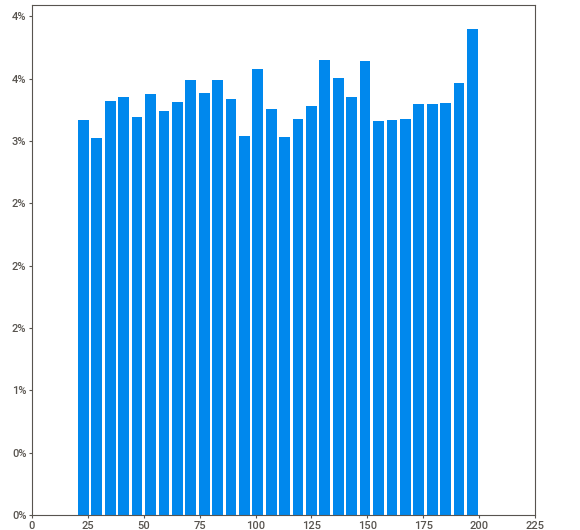
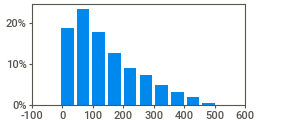
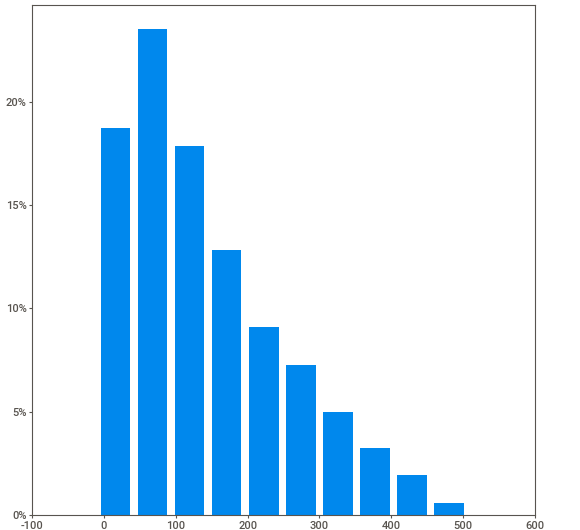
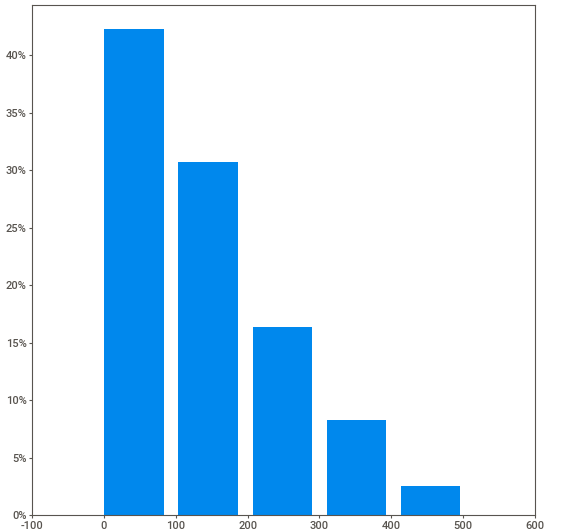
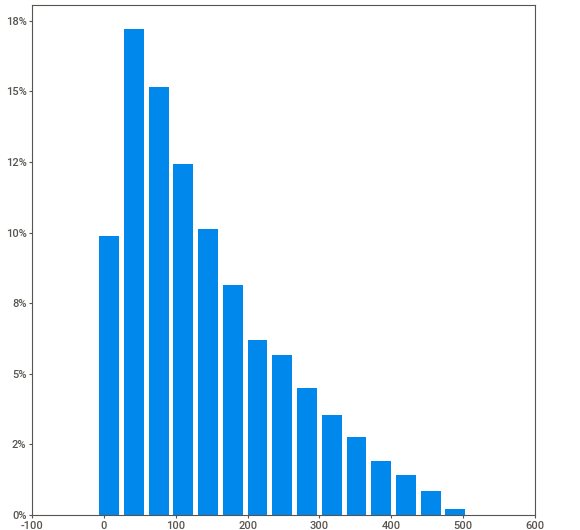
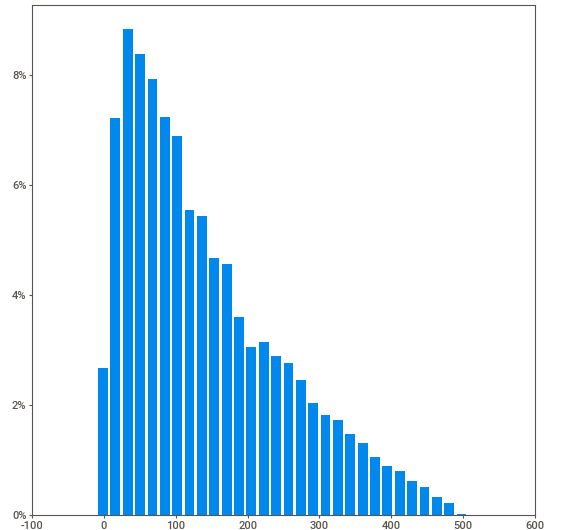
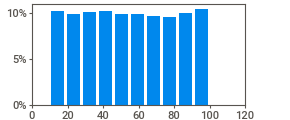
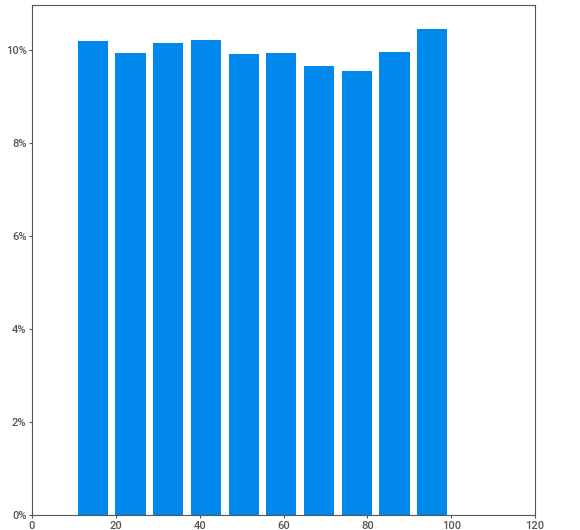
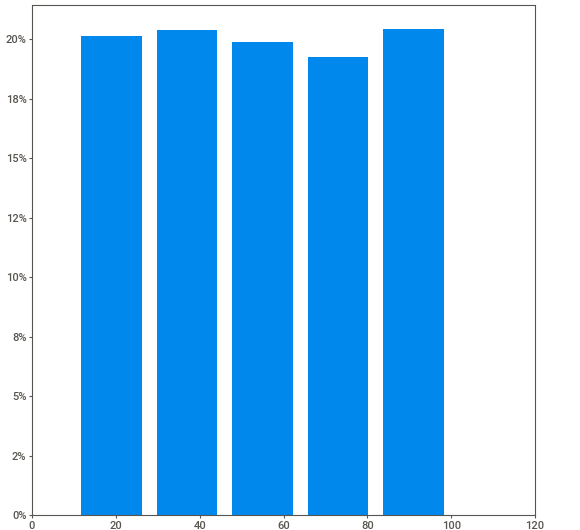
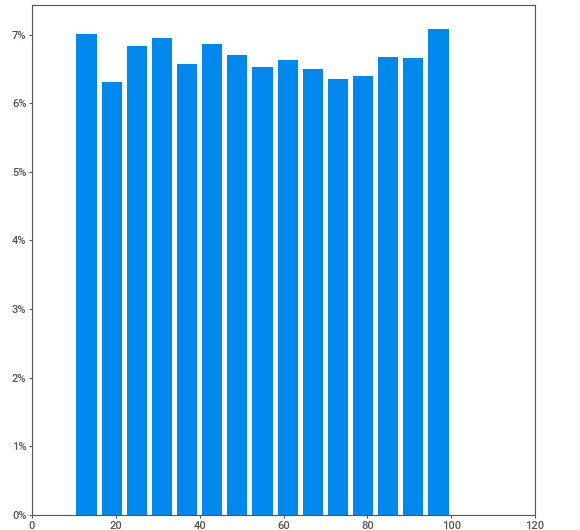
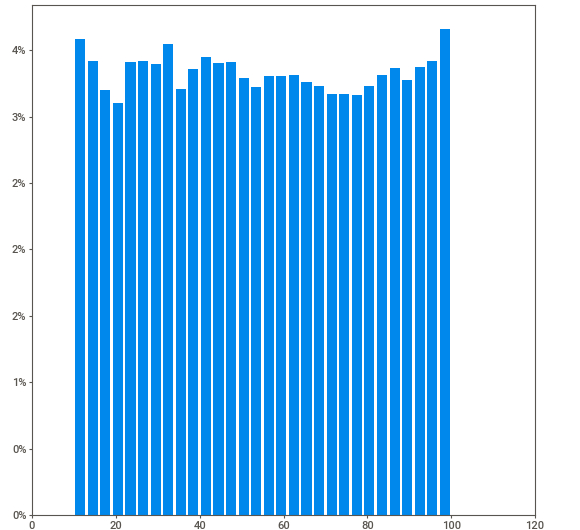
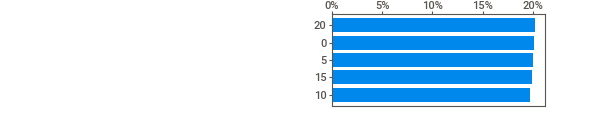
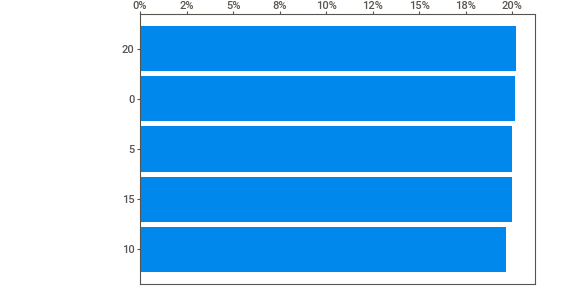
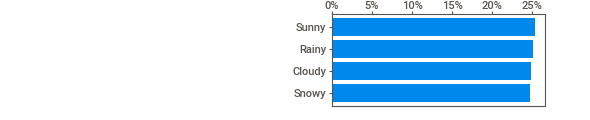
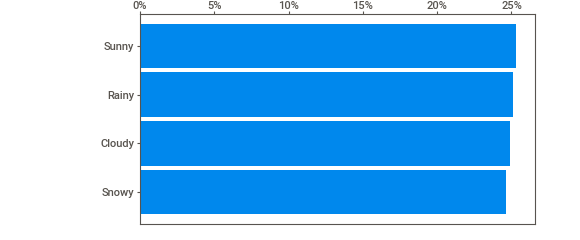
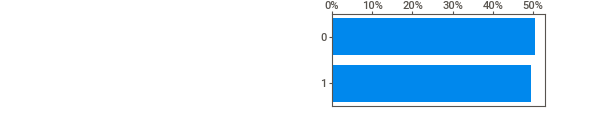
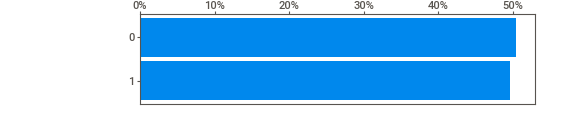
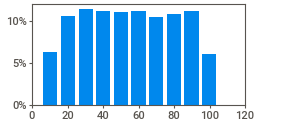
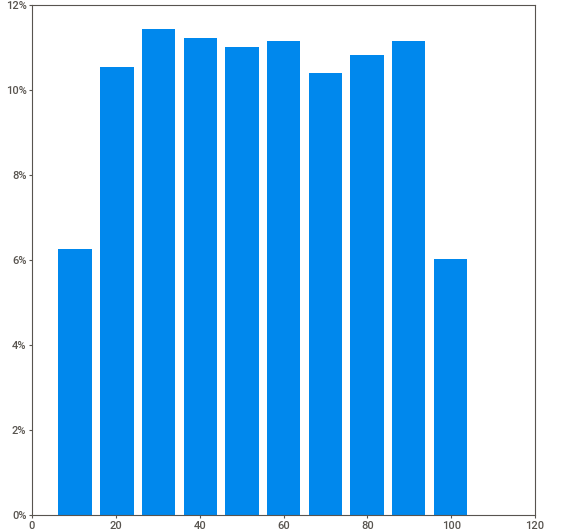
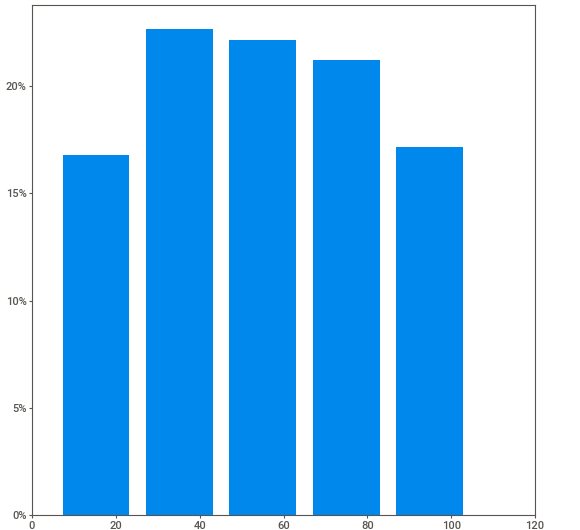
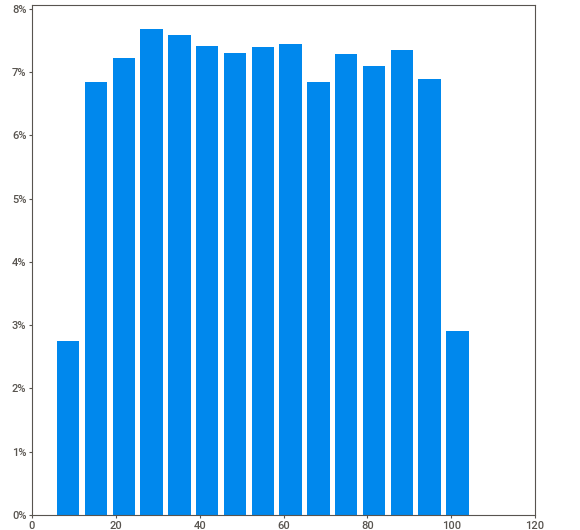
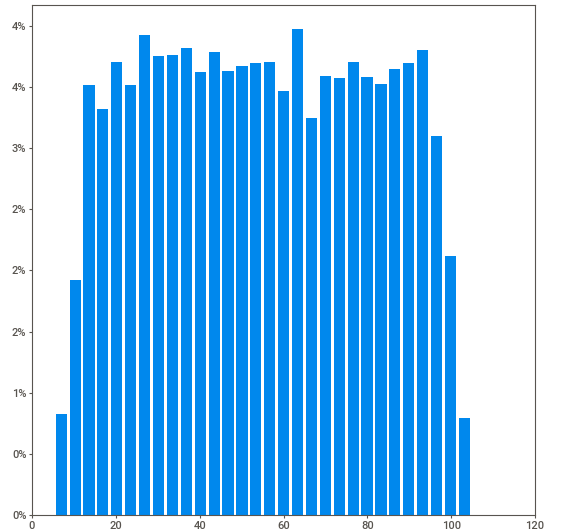
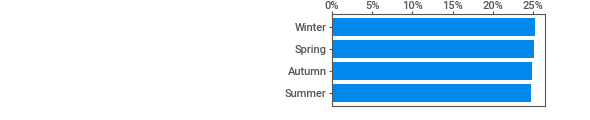
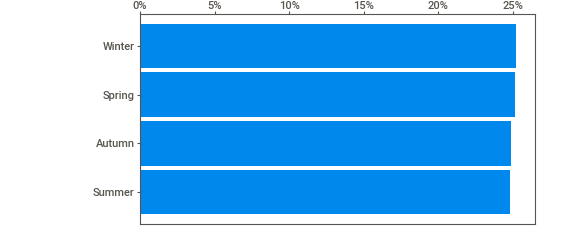
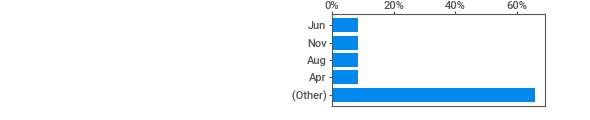
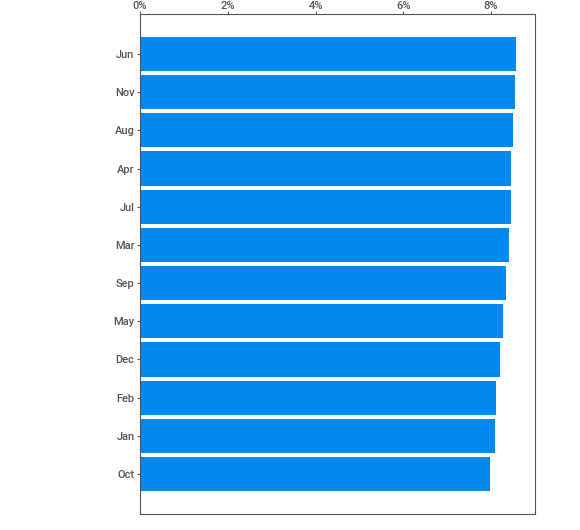
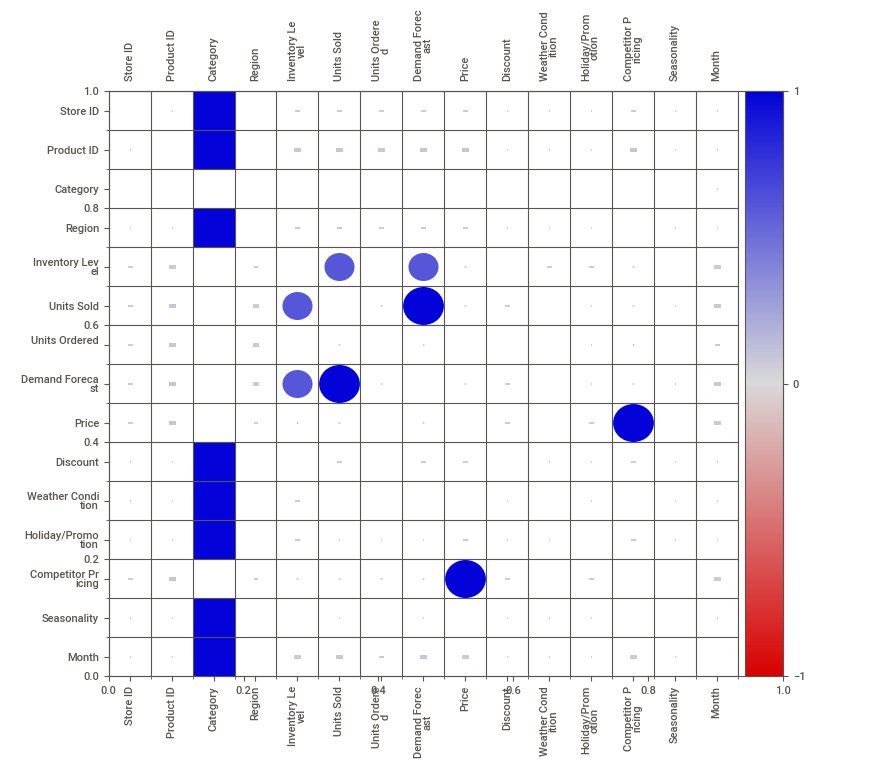
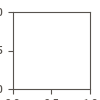

In [317]:
import sweetviz as sv 
s = sv.analyze(df)
s.show_notebook()

## Auto EDA using DTALE 

In [318]:
import dtale 
d = dtale.show(df)
d.open_browser()

## Top 10 product on Units sold 

In [319]:
df.columns 

Index(['Date', 'Store ID', 'Product ID', 'Category', 'Region',
       'Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast',
       'Price', 'Discount', 'Weather Condition', 'Holiday/Promotion',
       'Competitor Pricing', 'Seasonality', 'Month'],
      dtype='object')

In [320]:
top_product_sales = df.groupby(['Product ID'])['Units Sold'].sum().reset_index()
top_product_sales = top_product_sales.sort_values(by='Units Sold', ascending=False).head(10)
top_product_sales

Product ID  Units Sold
8       P0009      107734
17      P0018      106775
7       P0008      104517
16      P0017      104030
6       P0007      103373
13      P0014      102974
18      P0019      102825
10      P0011      102428
5       P0006      101595
14      P0015      100698

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_27716\923123103.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




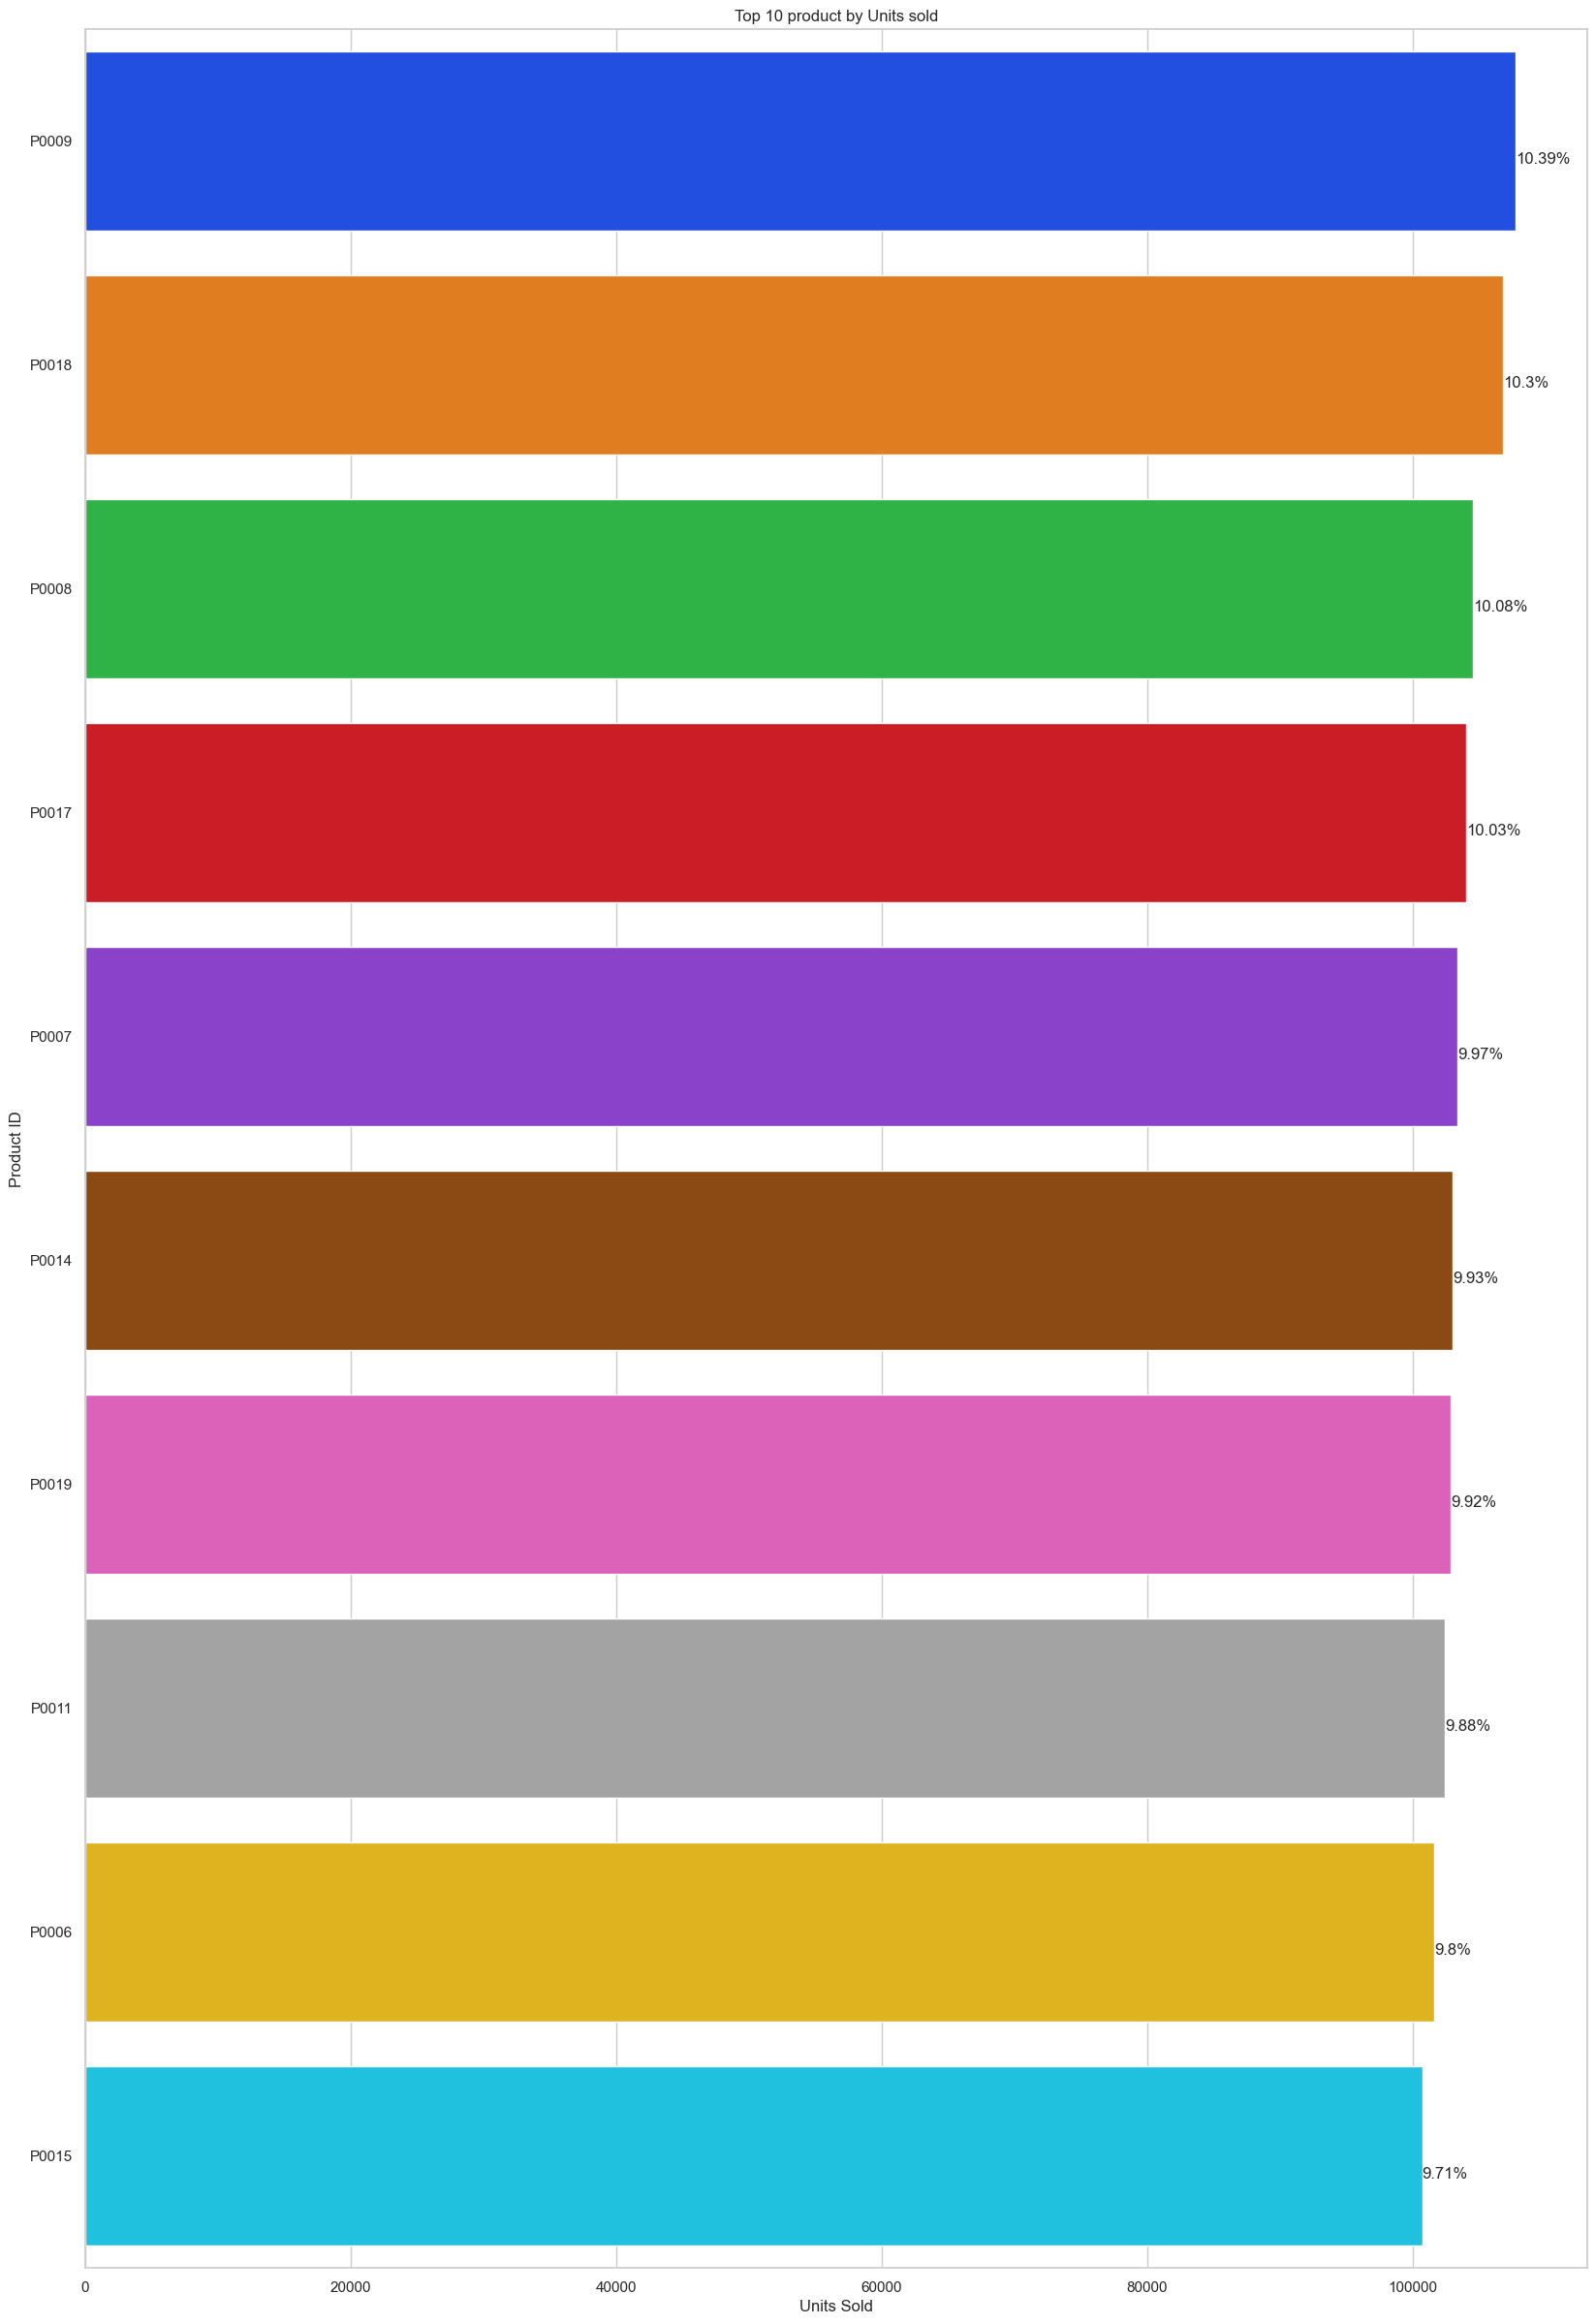

In [321]:
import seaborn as sns 
import matplotlib.pyplot as plt 
sns.set(style="whitegrid")
ax = sns.barplot(x='Units Sold', y='Product ID', data=top_product_sales, palette='bright') 
plt.xlabel('Units Sold')
plt.ylabel('Product ID')
plt.title('Top 10 product by Units sold')
for i, v in enumerate(top_product_sales['Units Sold']): 
  ax.text(v+0.5, i+0.1, str(round((v/top_product_sales['Units Sold'].sum())*100,2))+'%')
plt.show()

## Top 10 stores on Units Sold 

In [322]:
top_store_sales = df.groupby(['Store ID'])['Units Sold'].sum().reset_index()
top_store_sales = top_store_sales.sort_values(by='Units Sold', ascending=False)
top_store_sales

Store ID  Units Sold
3     S004      413914
4     S005      403240
2     S003      397273
1     S002      397144
0     S001      387595

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_27716\250849833.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




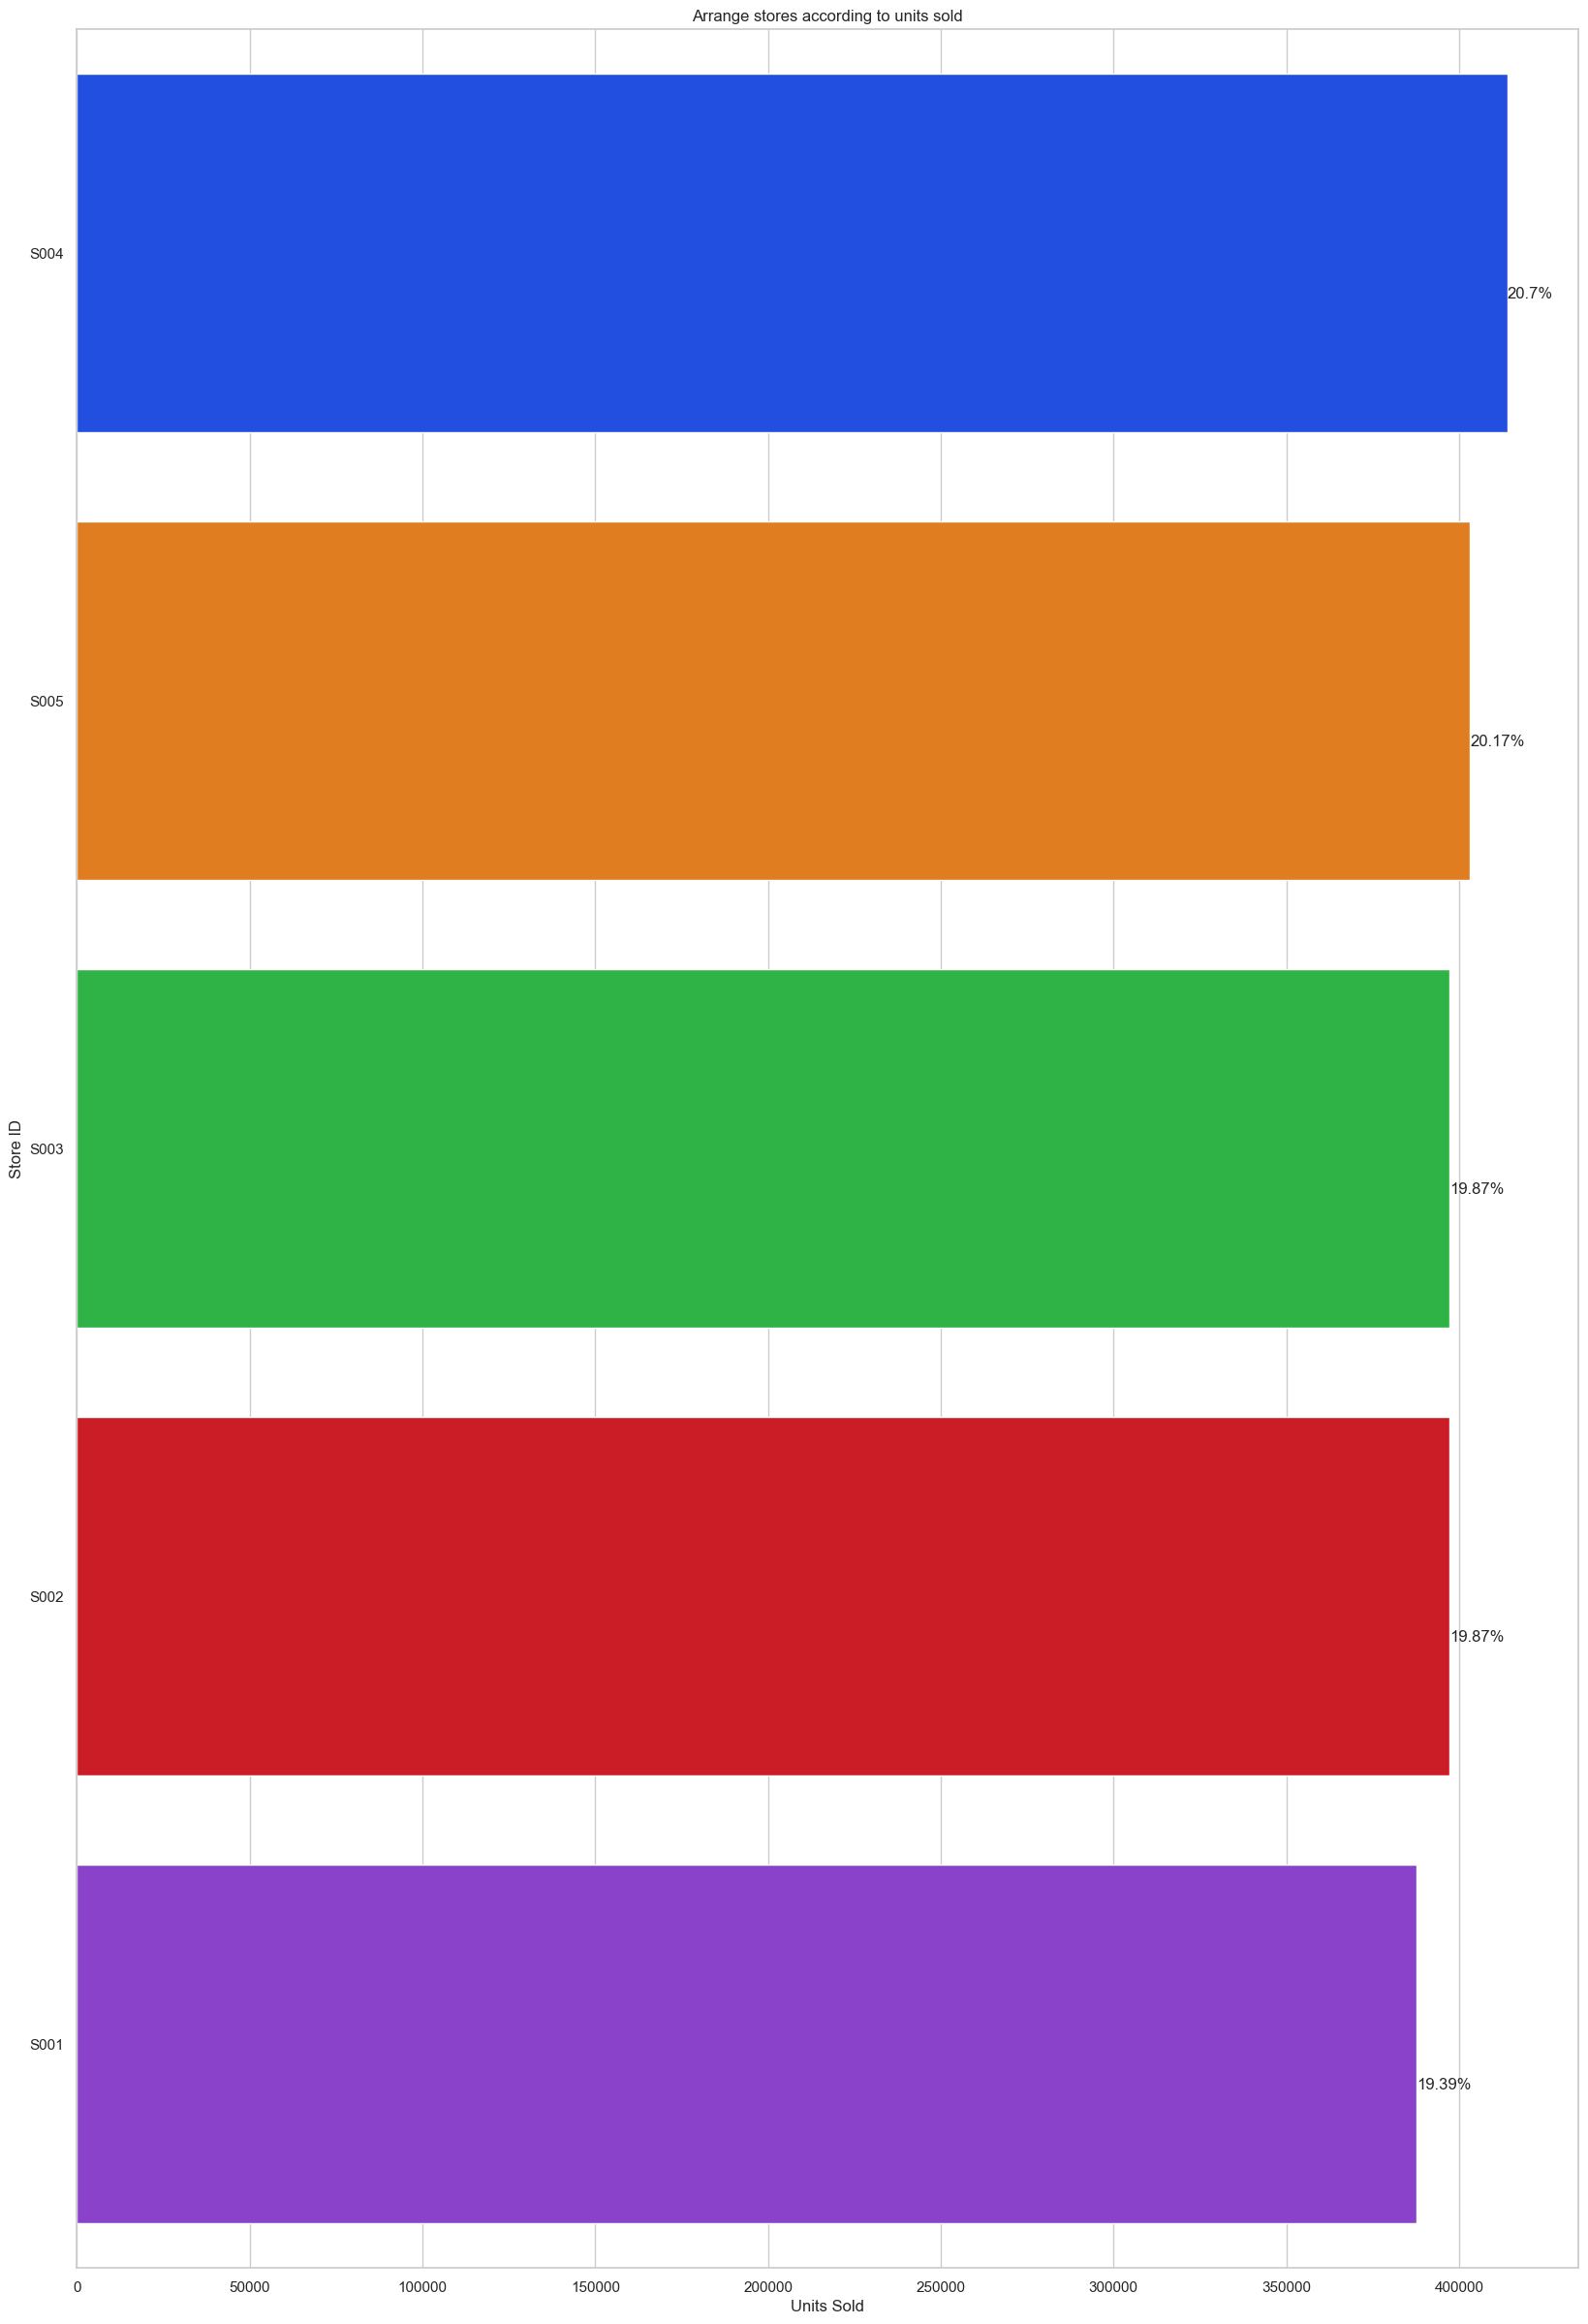

In [323]:
sns.set(style='whitegrid')
ax = sns.barplot(x='Units Sold', y='Store ID', data=top_store_sales, palette='bright')
plt.xlabel('Units Sold')
plt.ylabel('Store ID')
plt.title('Arrange stores according to units sold')
for i, v in enumerate(top_store_sales['Units Sold']): 
  ax.text(v+0.5, i+0.1, str(round((v/top_store_sales['Units Sold'].sum())*100,2))+ '%')
plt.show()

# FNS (Fast, Normal, Slow) Inventory Analysis


1. **Calculating Average Daily Sales Velocity:** The code begins by processing pharmaceutical sales data, first converting date columns into a consistent format. It then computes the total duration of the dataset by finding the difference between the start and end dates. The primary objective is to determine the average daily sales velocity for each drug, which is achieved by dividing the total sales by the number of days in the dataset. This metric provides insights into how much of a drug is sold, on average, per day, a crucial performance indicator for businesses.

2. **Sorting Products by Performance:** The code sorts the drugs based on their average daily sales velocity, presenting them in descending order. This sorting operation reveals which drugs are top performers in terms of daily sales. Such information is vital for inventory management, marketing strategies, and identifying star products within the pharmaceutical portfolio.

3. **Categorization and Visualization:** To offer a comprehensive view of the dataset, the code categorizes drugs into three groups: fast-moving, slow-moving, and not-moving drugs. The categorization criteria are adaptable to meet specific business requirements. Finally, the code visualizes the top fast-moving drugs using a colorful bar chart. Each bar represents a different drug, with drug names on the y-axis and average weekly sales velocity on the x-axis. This visualization offers a quick, easy-to-interpret overview of the highest-performing drugs, aiding in data-driven decision-making for pharmaceutical businesses.

In [324]:
total_sales = df.groupby('Product ID')['Units Sold'].sum().reset_index() 
total_sales 

Product ID  Units Sold
0       P0001       99221
1       P0002       97469
2       P0003       94037
3       P0004       96489
4       P0005       97826
5       P0006      101595
6       P0007      103373
7       P0008      104517
8       P0009      107734
9       P0010      100085
10      P0011      102428
11      P0012       98359
12      P0013       91623
13      P0014      102974
14      P0015      100698
15      P0016       96447
16      P0017      104030
17      P0018      106775
18      P0019      102825
19      P0020       90661

In [325]:
start_date = pd.to_datetime('01/01/2022')
end_date = pd.to_datetime('01/01/2024') 
num_weeks = int(np.ceil((end_date - start_date).days/7))
total_sales['AvgWeekly'] = round(total_sales['Units Sold']/num_weeks,2)
sorted_product = total_sales.sort_values('AvgWeekly', ascending=False)
sorted_product

Product ID  Units Sold  AvgWeekly
8       P0009      107734    1026.04
17      P0018      106775    1016.90
7       P0008      104517     995.40
16      P0017      104030     990.76
6       P0007      103373     984.50
13      P0014      102974     980.70
18      P0019      102825     979.29
10      P0011      102428     975.50
5       P0006      101595     967.57
14      P0015      100698     959.03
9       P0010      100085     953.19
0       P0001       99221     944.96
11      P0012       98359     936.75
4       P0005       97826     931.68
1       P0002       97469     928.28
3       P0004       96489     918.94
15      P0016       96447     918.54
2       P0003       94037     895.59
12      P0013       91623     872.60
19      P0020       90661     863.44

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_27716\3105927926.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




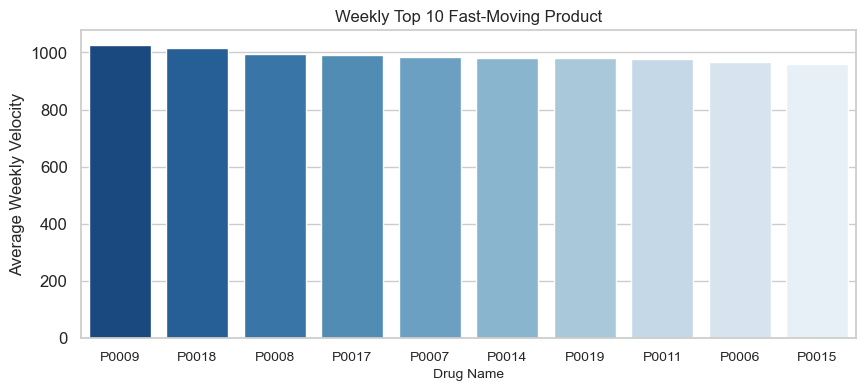

In [326]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 4))
sns.barplot(x='Product ID', y='AvgWeekly', data=sorted_product.head(10), palette='Blues_r')
plt.title('Weekly Top 10 Fast-Moving Product', fontsize=12)
plt.xlabel('Drug Name', fontsize=10)
plt.ylabel('Average Weekly Velocity', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=12)
plt.show()

# Analyze sales trends by month 

## In 2022 

In [327]:
df['Month'] = df['Date'].dt.month 
df['Year'] = df['Date'].dt.year 
df_2022 = df[df['Year'] == 2022]
sales_by_month = df_2022.groupby("Month")['Units Sold'].sum().reset_index() 
print("Sales Trends by Month:")
print(sales_by_month)

Sales Trends by Month:
    Month  Units Sold
0       1       77477
1       2       89806
2       3       75774
3       4       80313
4       5       77888
5       6       86090
6       7       90564
7       8       81421
8       9       83628
9      10       79739
10     11       87227
11     12       85753


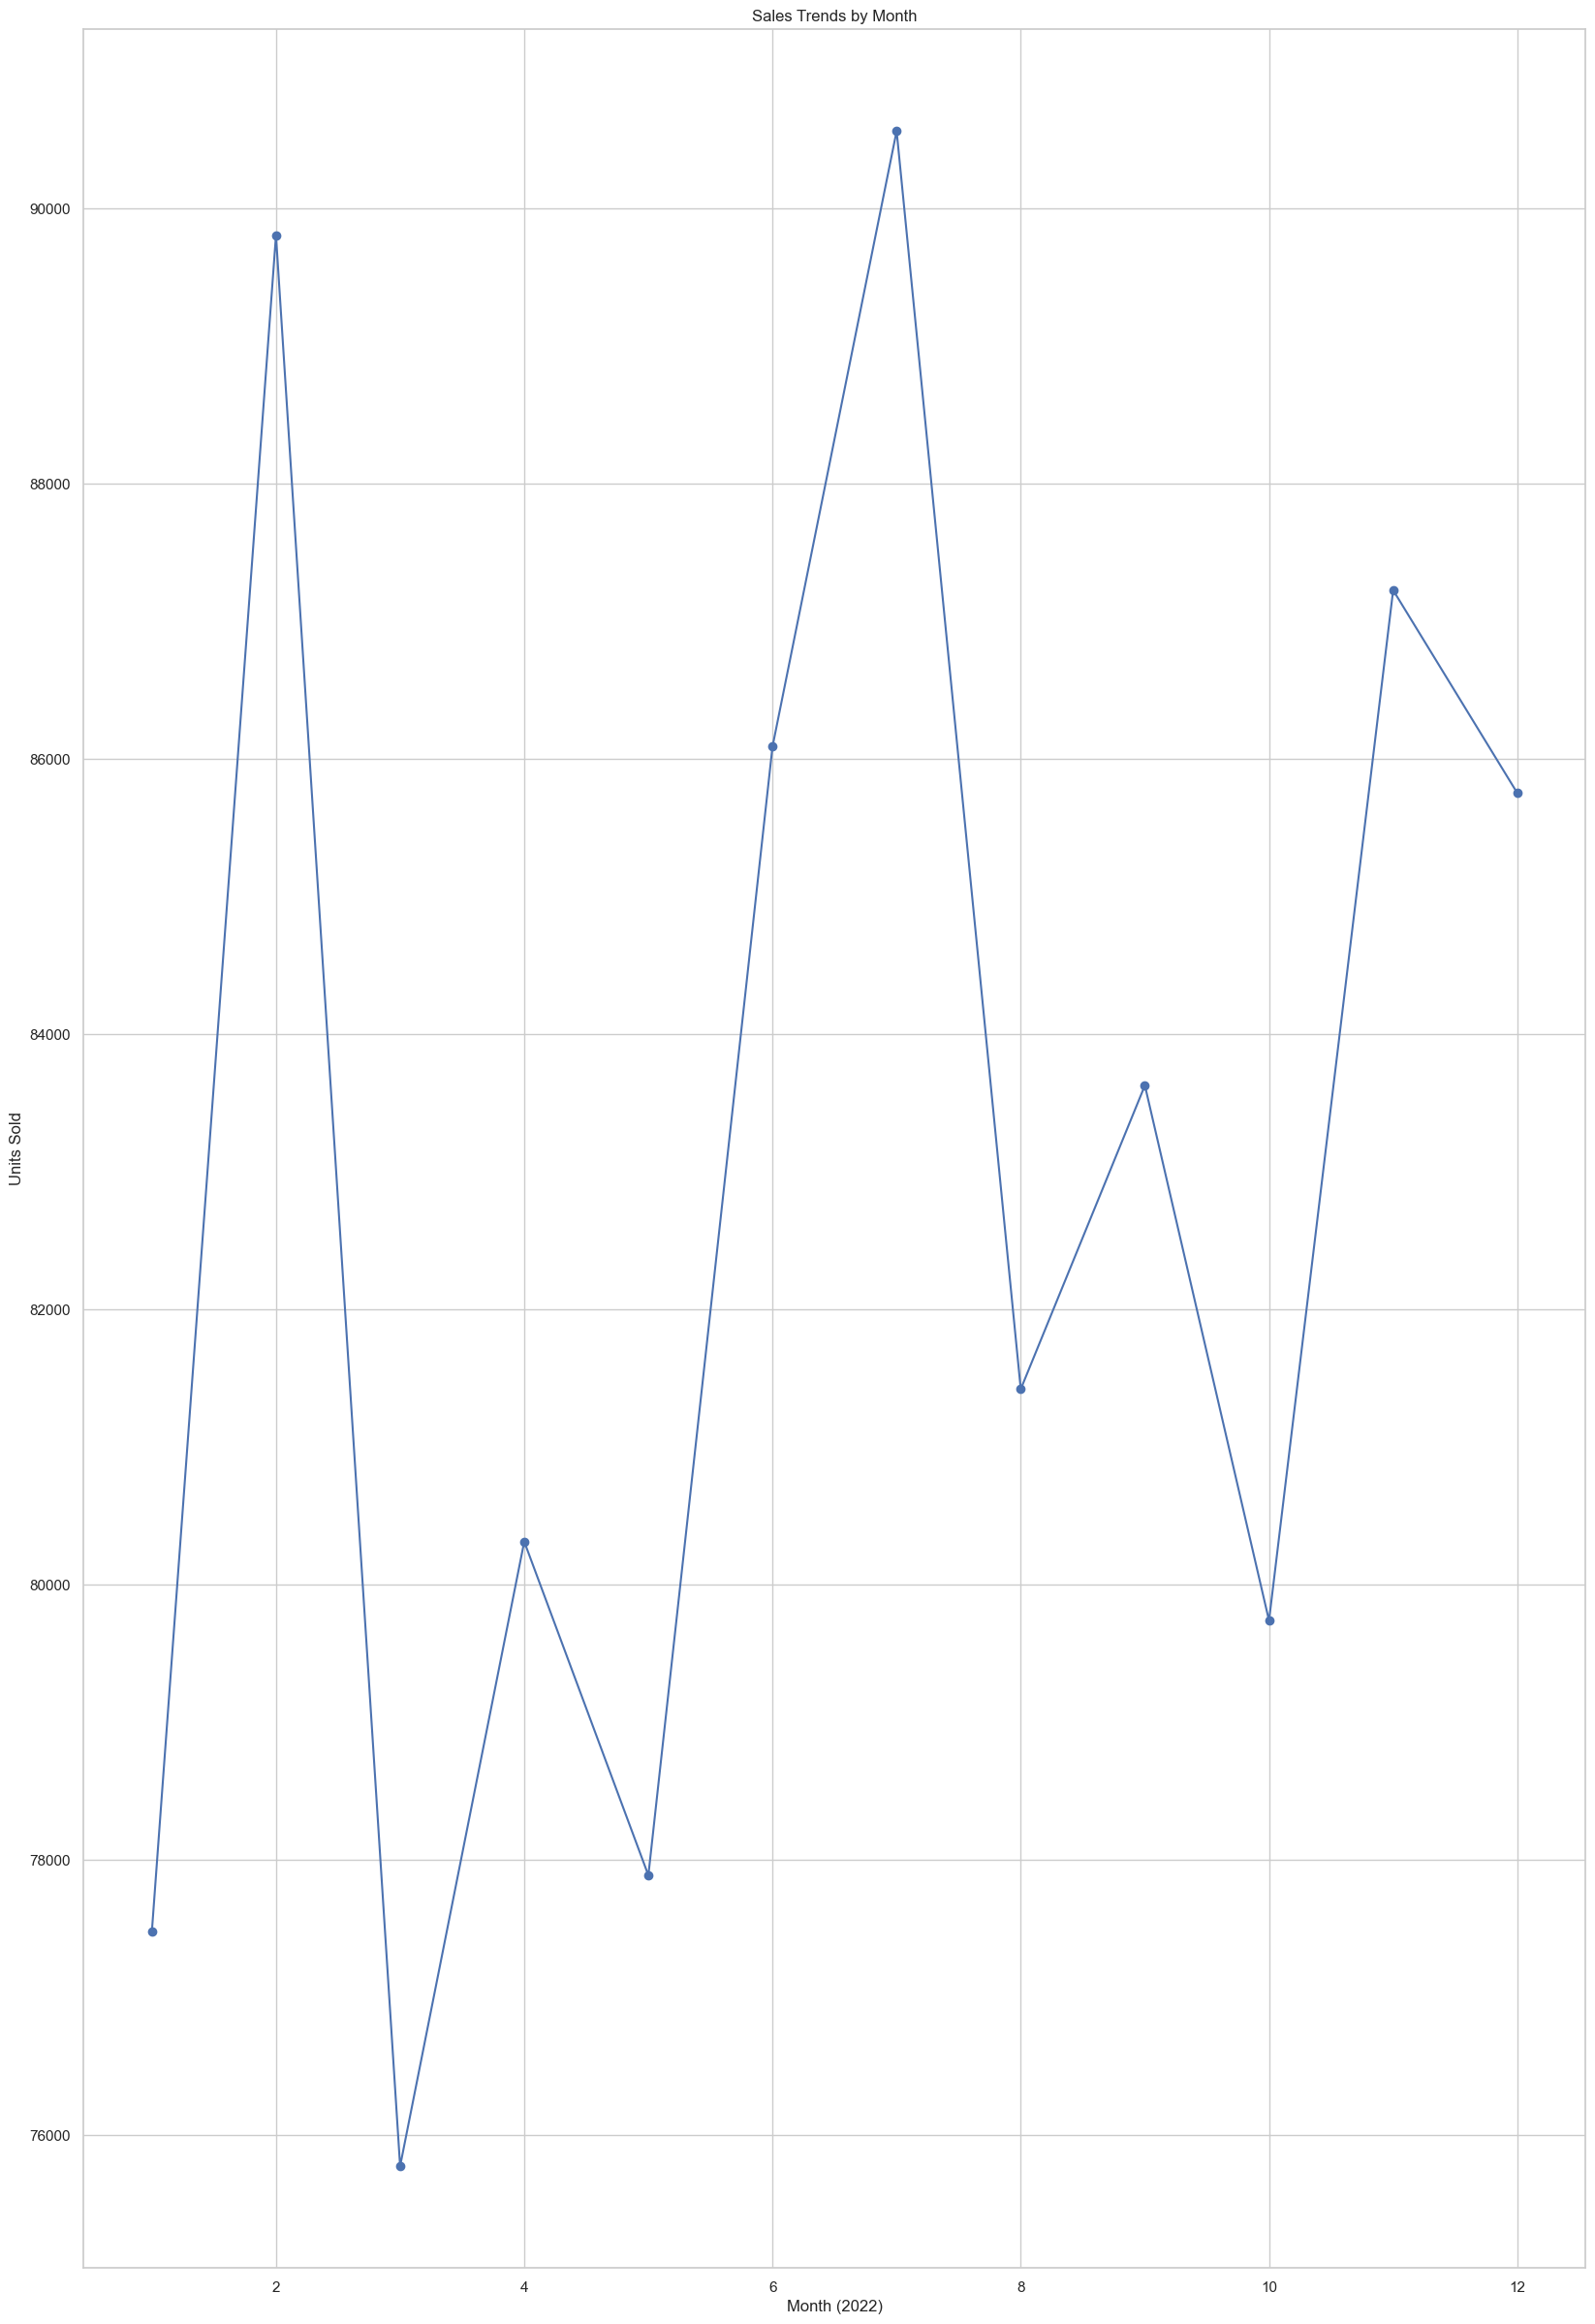

In [328]:
fig,ax = plt.subplots()
ax.plot(sales_by_month["Month"], sales_by_month['Units Sold'], marker="o")
ax.set_title("Sales Trends by Month")
ax.set_xlabel("Month (2022)") 
ax.set_ylabel("Units Sold")
plt.show()

## In 2023 

In [329]:
df_2023 = df[df['Year'] == 2023]
sales_by_month = df_2023.groupby("Month")['Units Sold'].sum().reset_index() 
print("Sales Trends by Month:")
print(sales_by_month)

Sales Trends by Month:
    Month  Units Sold
0       1       79693
1       2       76321
2       3       84569
3       4       89083
4       5       82884
5       6       87911
6       7       87441
7       8       88506
8       9       83238
9      10       76865
10     11       86666
11     12       78919


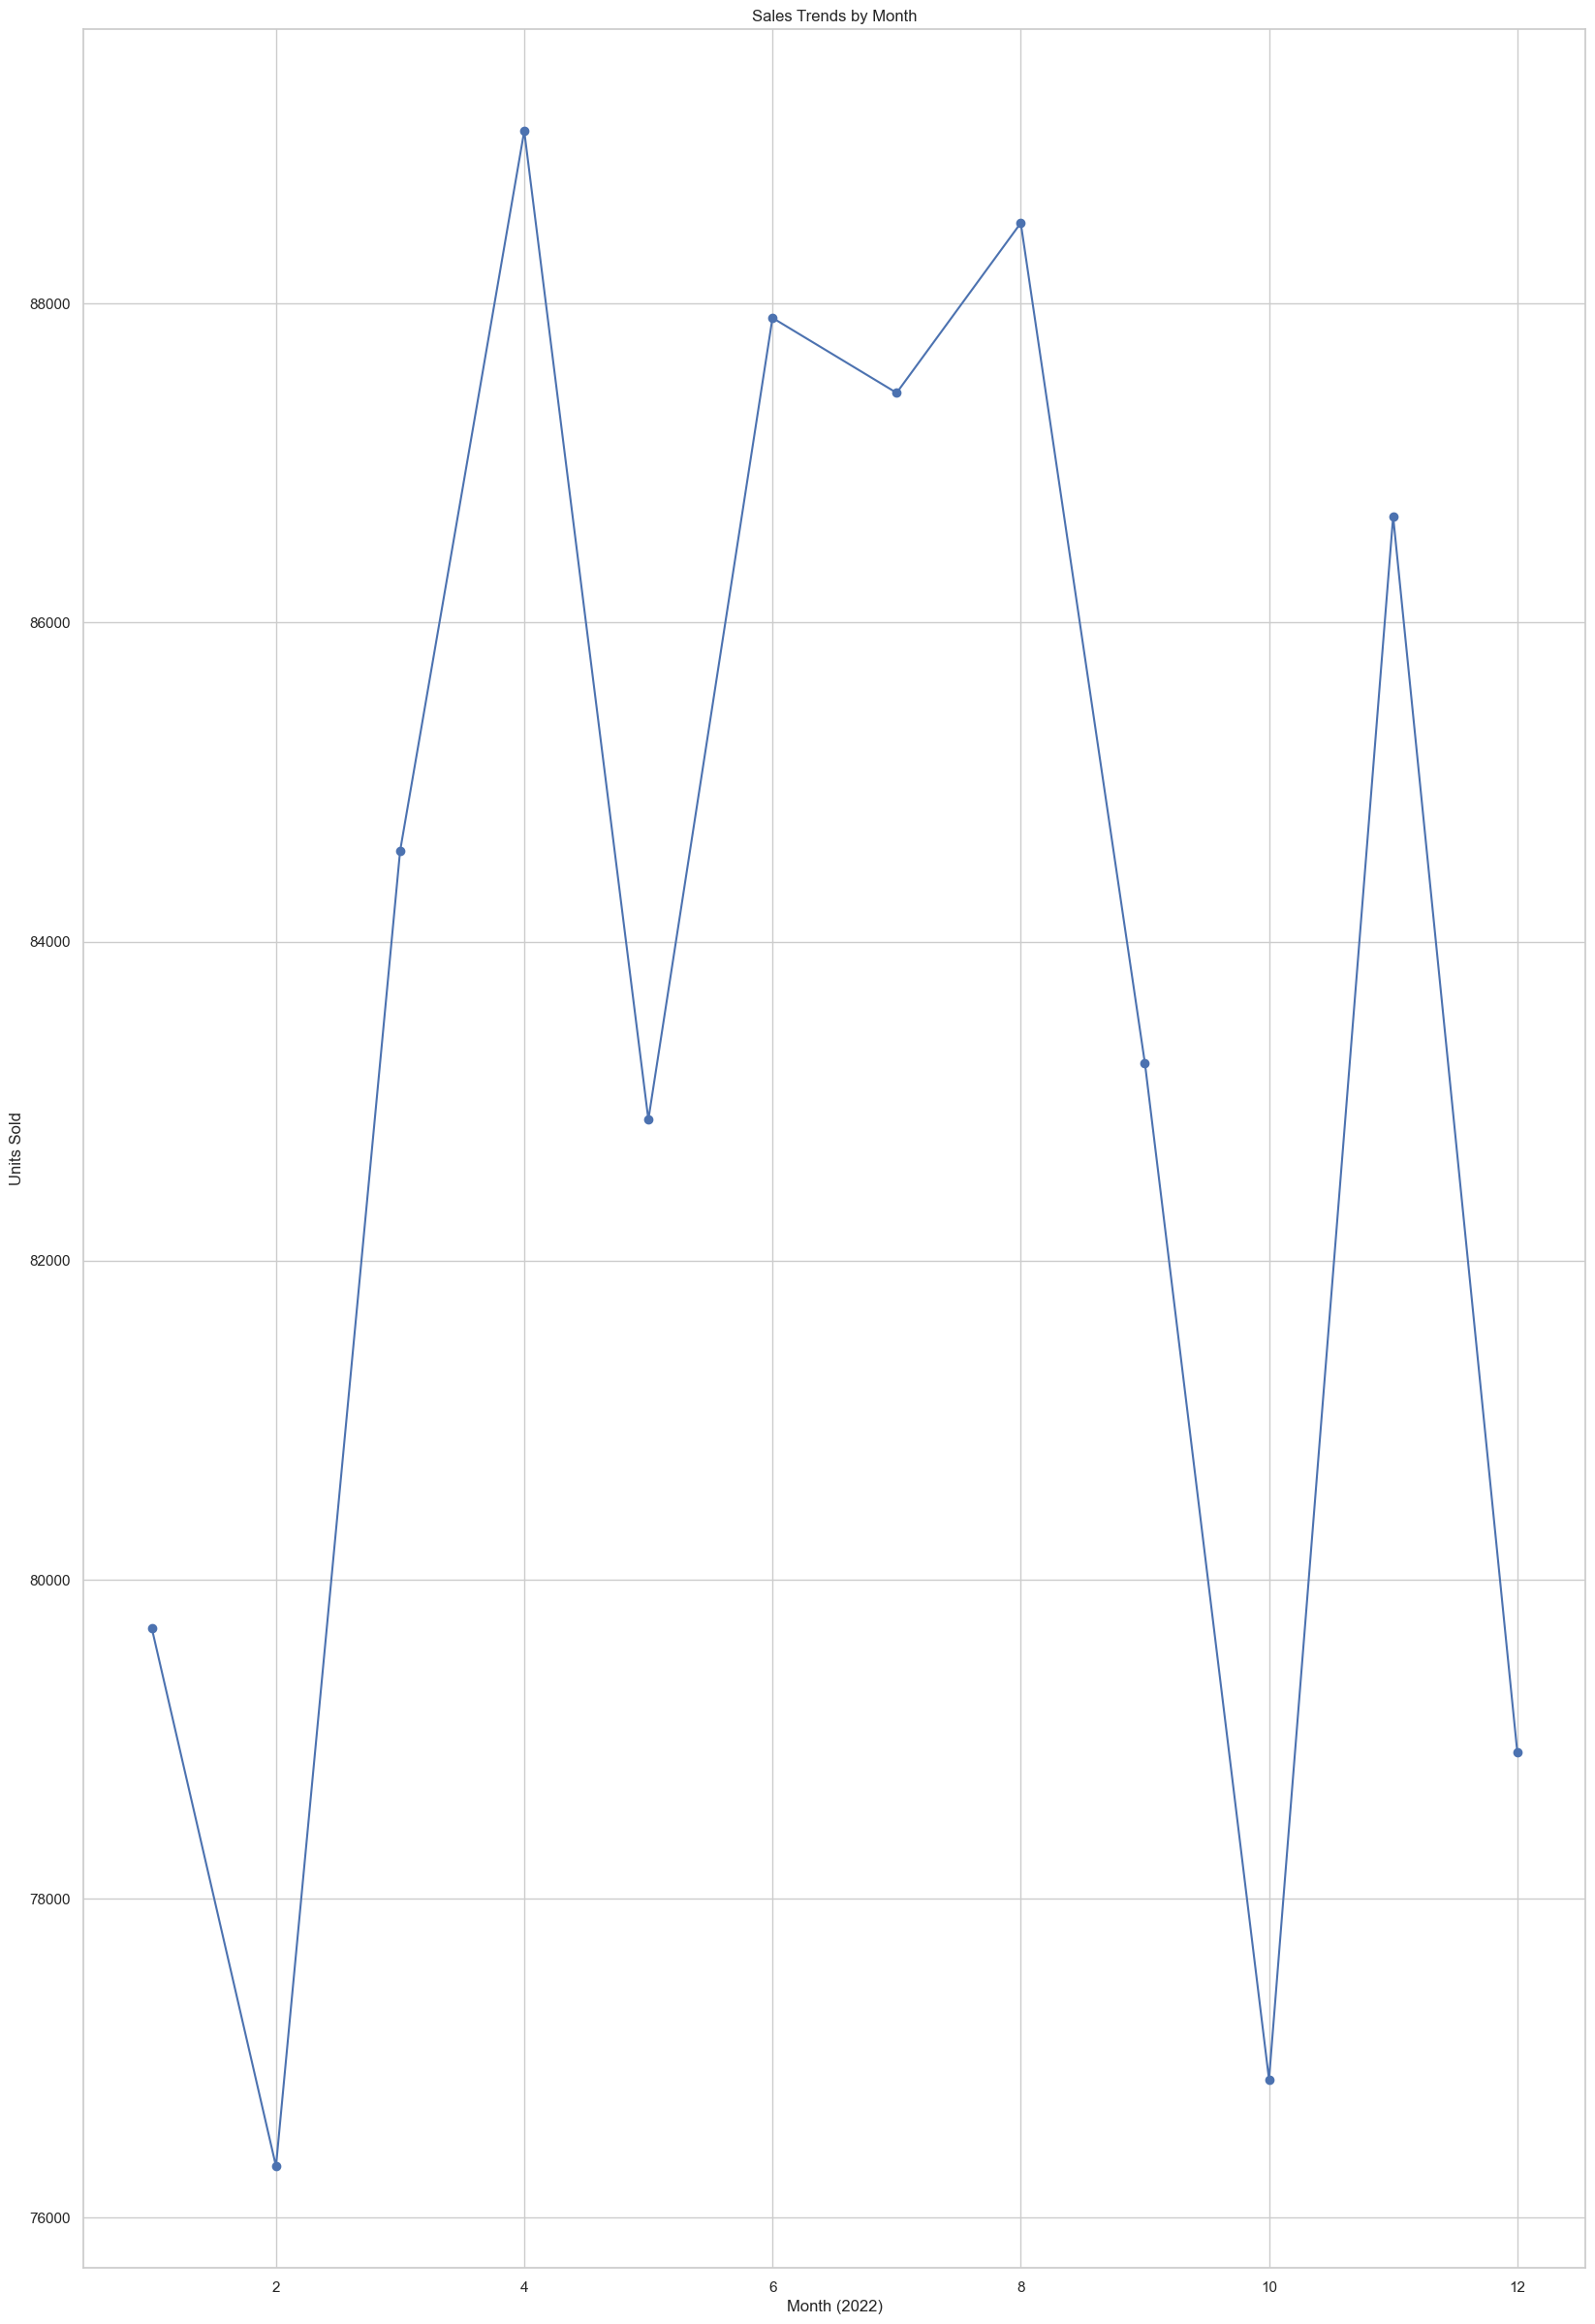

In [330]:
fig,ax = plt.subplots()
ax.plot(sales_by_month["Month"], sales_by_month['Units Sold'], marker="o")
ax.set_title("Sales Trends by Month")
ax.set_xlabel("Month (2022)") 
ax.set_ylabel("Units Sold")
plt.show()

## Data density analysis

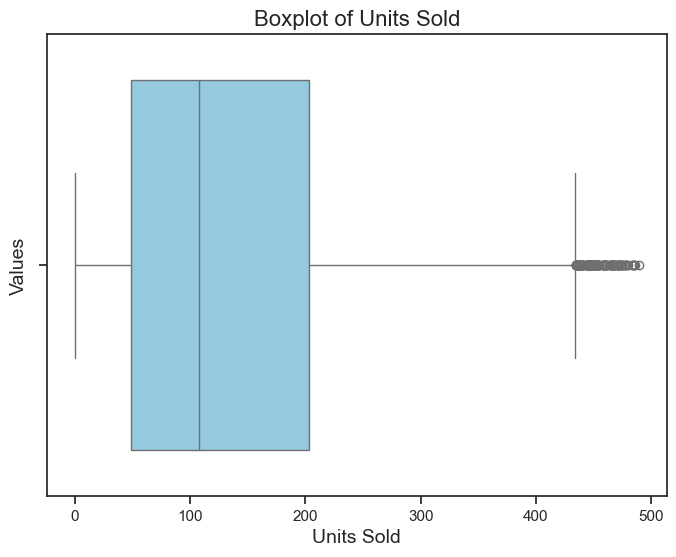

In [331]:
sns.set(style='ticks', palette='pastel')
plt.figure(figsize=(8,6))
sns.boxplot(x=df['Units Sold'], color='skyblue')
plt.xlabel('Units Sold', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.title('Boxplot of Units Sold', fontsize=16)
plt.show()

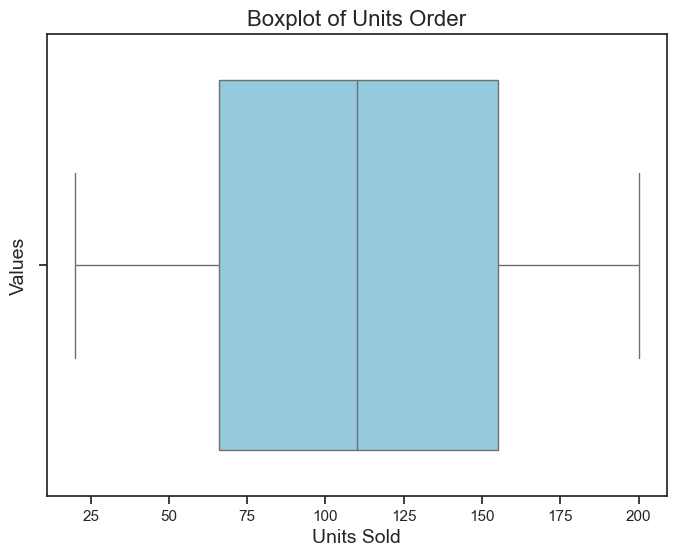

In [332]:
sns.set(style='ticks', palette='pastel')
plt.figure(figsize=(8,6))
sns.boxplot(x=df['Units Ordered'], color='skyblue')
plt.xlabel('Units Sold', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.title('Boxplot of Units Order', fontsize=16)
plt.show()

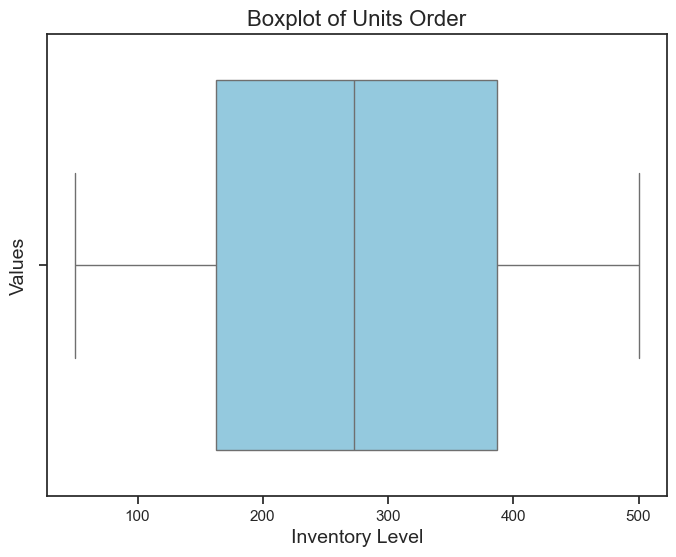

In [333]:
sns.set(style='ticks', palette='pastel')
plt.figure(figsize=(8,6))
sns.boxplot(x=df['Inventory Level'], color='skyblue')
plt.xlabel('Inventory Level', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.title('Boxplot of Units Order', fontsize=16)
plt.show()

## Univariate Analysis

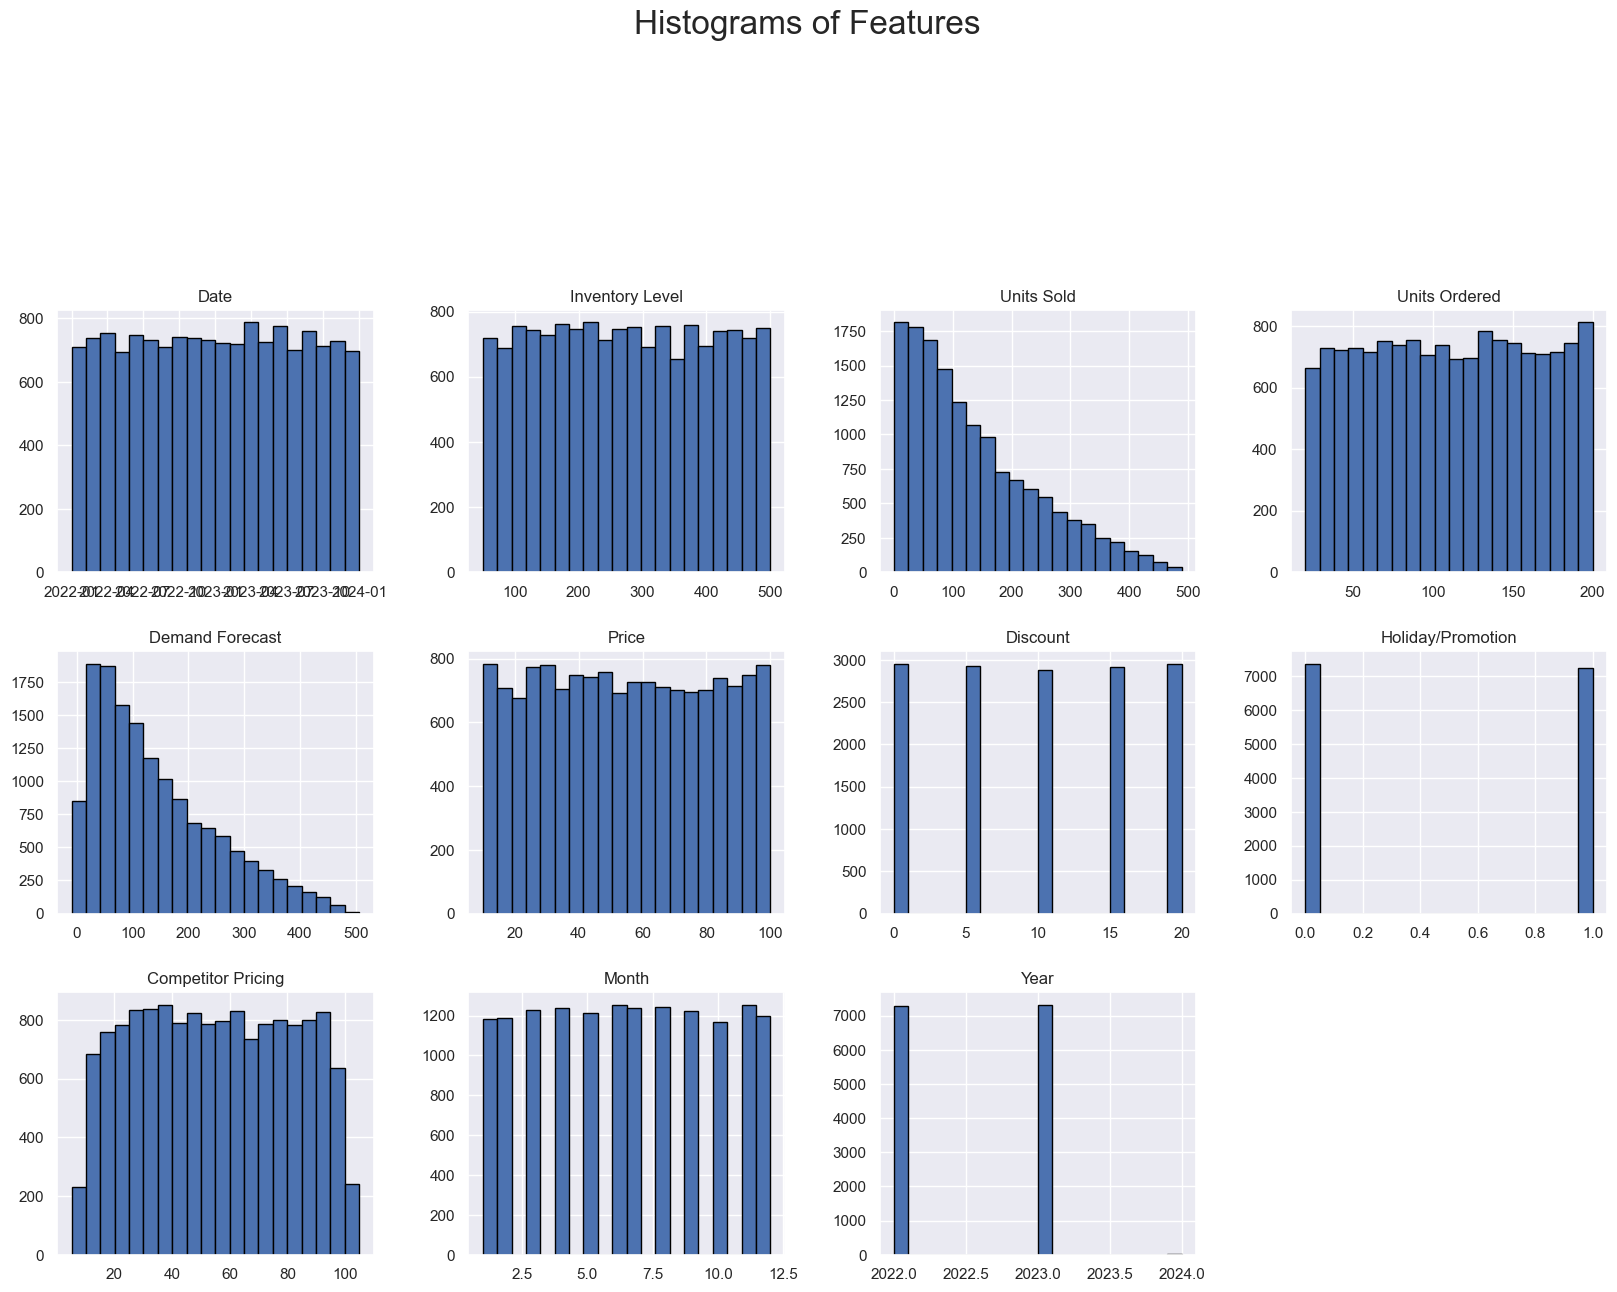

In [334]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (20,30)

# Set the style and color palette of the plot
sns.set(style='darkgrid', palette='deep')

# Create histograms of all columns in the DataFrame
df.hist(layout=(7, 4), bins=20, edgecolor='black')

# Set the title of the plot
plt.suptitle('Histograms of Features', fontsize=24)

# Show the plot
plt.show()

## Bivariate Analysis 

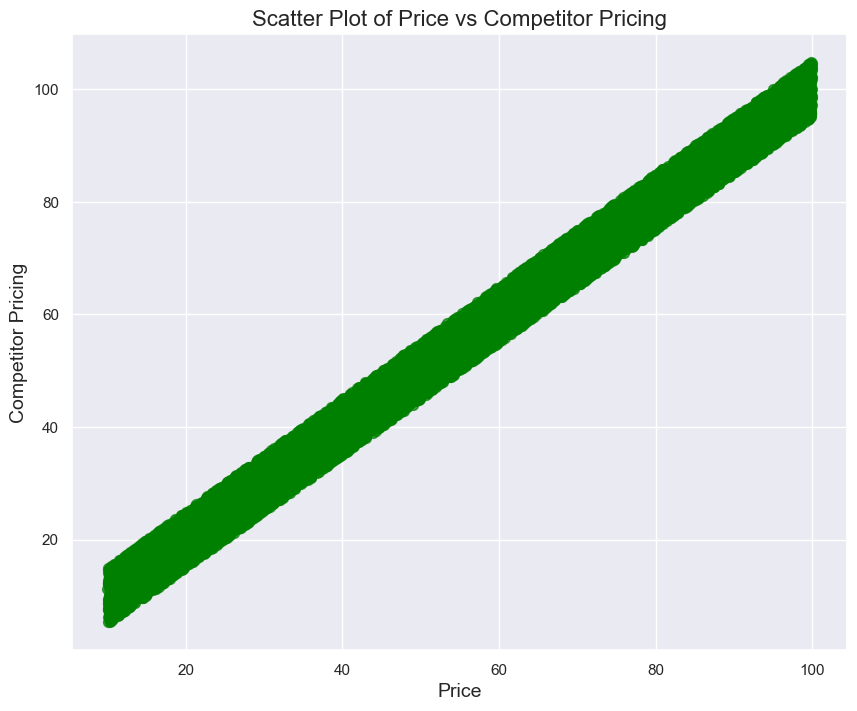

In [335]:
plt.figure(figsize=(10,8))

plt.scatter(df['Price'], df['Competitor Pricing'], s=50, alpha=0.7, color='green')
plt.xlabel('Price', fontsize=14)
plt.ylabel('Competitor Pricing', fontsize=14)
plt.title('Scatter Plot of Price vs Competitor Pricing', fontsize=16)

# Show the plot
plt.show()

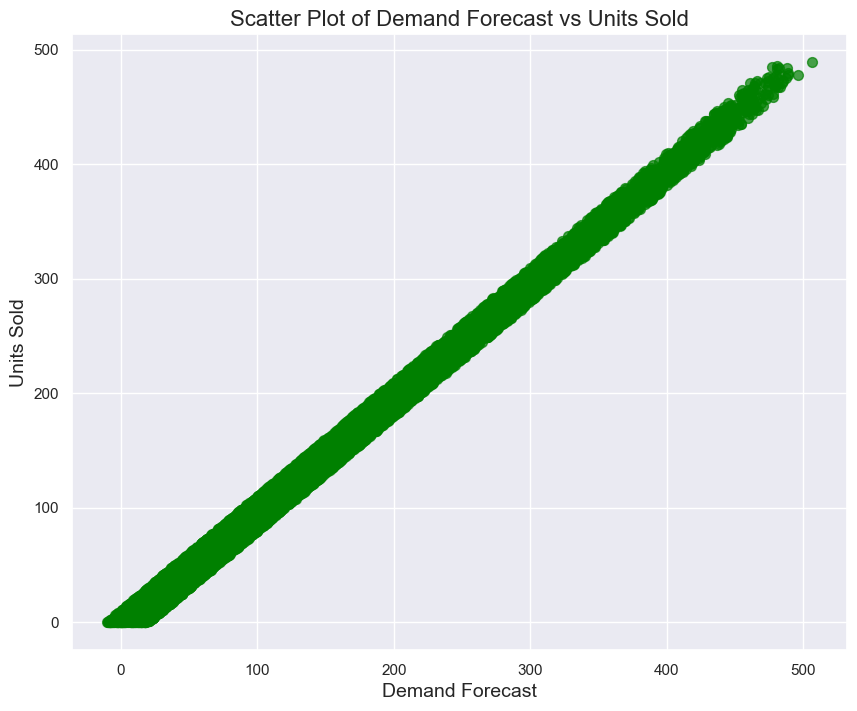

In [336]:
plt.figure(figsize=(10,8))

plt.scatter(df['Demand Forecast'], df['Units Sold'], s=50, alpha=0.7, color='green')
plt.xlabel('Demand Forecast', fontsize=14)
plt.ylabel('Units Sold', fontsize=14)
plt.title('Scatter Plot of Demand Forecast vs Units Sold', fontsize=16)

# Show the plot
plt.show()

## Multivariate Analysis 

In [337]:
list_numeric_variables = ['Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast', 'Price', 'Competitor Pricing']
matrix_corr = df[list_numeric_variables].corr()

In [338]:
matrix_corr

Inventory Level  Units Sold  Units Ordered  \
Inventory Level            1.000000    0.587769      -0.005948   
Units Sold                 0.587769    1.000000      -0.013308   
Units Ordered             -0.005948   -0.013308       1.000000   
Demand Forecast            0.586473    0.996828      -0.013403   
Price                      0.020331   -0.001842       0.012443   
Competitor Pricing         0.021042   -0.001726       0.013732   

                    Demand Forecast     Price  Competitor Pricing  
Inventory Level            0.586473  0.020331            0.021042  
Units Sold                 0.996828 -0.001842           -0.001726  
Units Ordered             -0.013403  0.012443            0.013732  
Demand Forecast            1.000000 -0.001720           -0.001612  
Price                     -0.001720  1.000000            0.994002  
Competitor Pricing        -0.001612  0.994002            1.000000

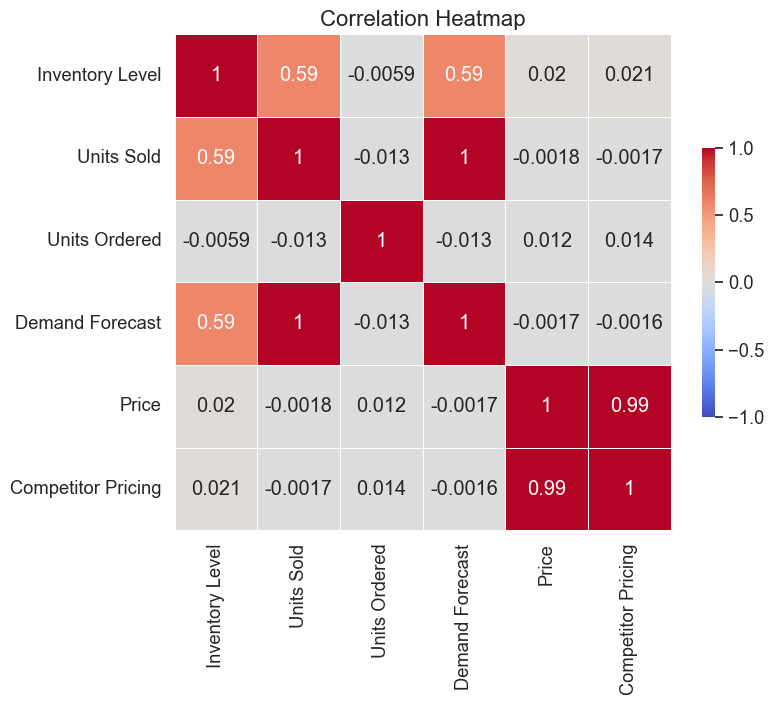

In [339]:
plt.figure(figsize=(8, 7))
sns.set(font_scale=1.2)
sns.heatmap(matrix_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

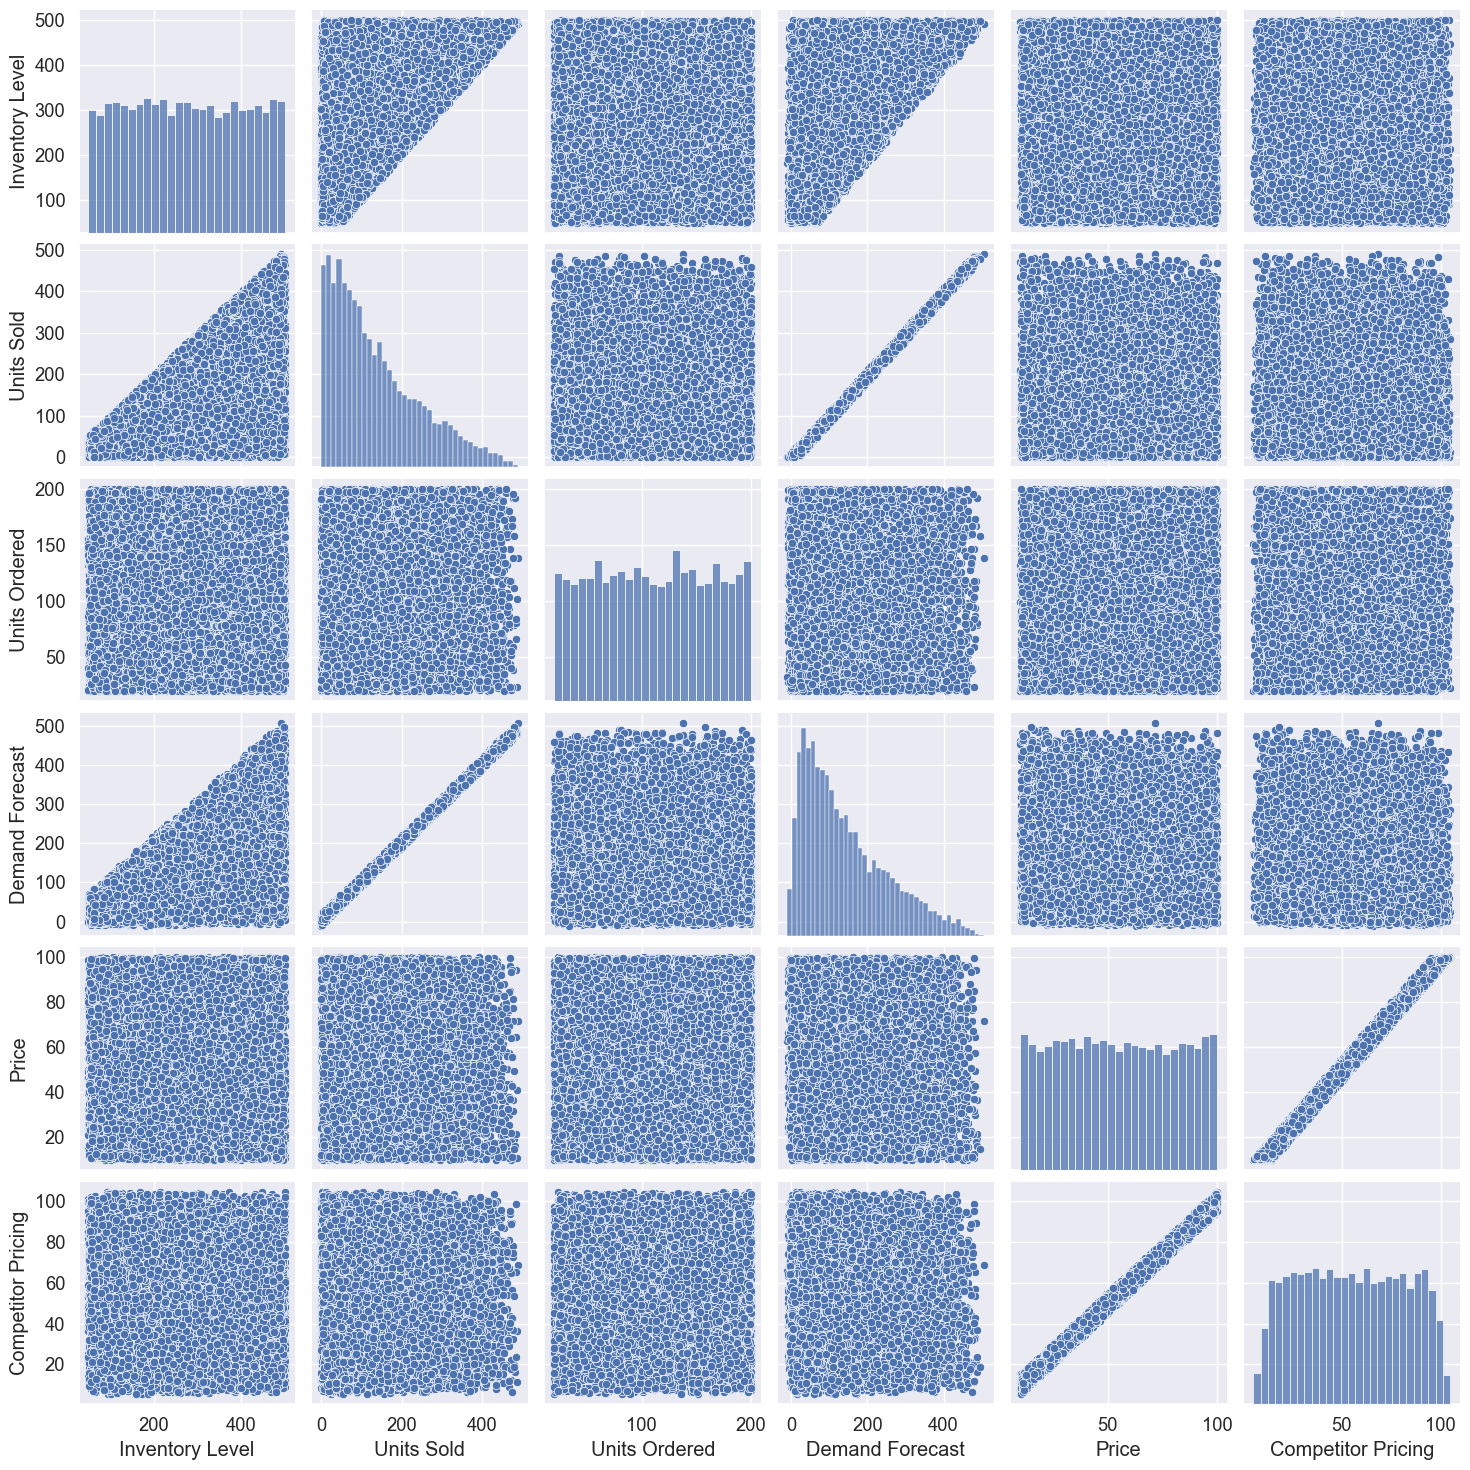

In [340]:
sns.pairplot(df[['Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast', 'Price', 'Competitor Pricing']])
plt.show()

In [341]:
product_sales = df.groupby('Product ID')['Units Sold'].sum().reset_index()
product_sales = product_sales.sort_values('Units Sold', ascending=False)

In [342]:
top_10_product_sales = product_sales.head(10)

In [343]:
result = df[df['Product ID'].isin(top_10_product_sales['Product ID'])]
result 

Date Store ID Product ID  Category Region  Inventory Level  \
7     2022-01-01     S001      P0008  Clothing  North              380   
13    2022-01-01     S001      P0014  Clothing   West              193   
14    2022-01-01     S001      P0015  Clothing  North              379   
17    2022-01-01     S001      P0018  Clothing  South              241   
18    2022-01-01     S001      P0019  Clothing   East              352   
...          ...      ...        ...       ...    ...              ...   
73054 2024-01-01     S003      P0015  Clothing   East              270   
73056 2024-01-01     S003      P0017  Clothing  North              239   
73068 2024-01-01     S004      P0009  Clothing   East              115   
73078 2024-01-01     S004      P0019  Clothing   East               65   
73097 2024-01-01     S005      P0018  Clothing   West              278   

       Units Sold  Units Ordered  Demand Forecast  Price  Discount  \
7             312             54           329.73  97.99         5   
13             12            187             6.80  78.11         0   
14            369            154           363.46  92.99        15   
17            151             47           147.27  19.57         5   
18            257            186           267.38  73.28        10   
...           ...            ...              ...    ...       ...   
73054         174            109           179.11  59.80         5   
73056          44             26            56.25  67.36        15   
73068          47            139            66.94  48.65        10   
73078          44            166            43.07  61.04         0   
73097          36            151            39.65  11.11        10   

      Weather Condition  Holiday/Promotion  Competitor Pricing Seasonality  \
7                Cloudy                  0              100.09      Spring   
13                Sunny                  0               80.06      Spring   
14                Snowy                  0               95.80      Winter   
17               Cloudy                  0               23.13      Autumn   
18               Cloudy                  0               77.26      Winter   
...                 ...                ...                 ...         ...   
73054             Snowy                  1               63.79      Spring   
73056             Snowy                  1               70.65      Summer   
73068             Snowy                  0               49.74      Winter   
73078             Snowy                  0               60.99      Summer   
73097             Rainy                  0               10.91      Winter   

       Month  Year  
7          1  2022  
13         1  2022  
14         1  2022  
17         1  2022  
18         1  2022  
...      ...   ...  
73054      1  2024  
73056      1  2024  
73068      1  2024  
73078      1  2024  
73097      1  2024  

[7445 rows x 17 columns]

In [344]:
from datetime import datetime 
result['Date'] = pd.to_datetime(result['Date'], format='%m/%d/%Y') 
result['Week'] = result['Date'].dt.isocalendar().week 
result = result[['Week', 'Product ID', 'Units Sold']]
result = result.groupby(['Week', 'Product ID']).sum().reset_index()
result = result.pivot(index='Week', columns='Product ID', values='Units Sold')
result = result.fillna(0)
result.columns.name = '' 

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_27716\3186514928.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_27716\3186514928.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [345]:
result

P0006  P0007  P0008  P0009  P0011  P0014  P0015  P0017  P0018  P0019
Week                                                                      
1      1114   2186   3297   2036   2263   1562   1337   1894   1449    851
2      2165   2232    623   1990   2439   1387   1817   1824   2371   2021
3      1091   1326   1861   1129   3495   1245   3601   1978   1846   1723
4      3044   2429   2121    899   1862   1905   2304   1638   2692   2580
5      1551   1631   1356   1544   2361   3456   1462   2193   2198   2089
6      1617   1867   1631   2610   1745   4389   2568   1564   1521   2444
7      1488   1275    851   2752   1401   1806   1299   2089   2451   3366
8      2725   2222   3660   2251   2120   1961   1489   2397   2152   2575
9      1882   1392   2709    940   1919    926   1295   2335   2951   2651
10     1666   1900   2063   1462   2591   1656   2385   1813    918   1613
11     1464   2139   2055   2393   1732   1851   2390   1901    738   1870
12     1405   1201   1864   1647    766   1740   2166   1783   1929   1786
13     1860   2243   1514   2573   1252   2151   2359   2253   1807   1856
14     2710   1790   2474   2032   3199   2458   2122   2530   2070   1043
15     2201   2248   1105   2411   2173   2227   1668   2222   1855   2064
16     2215   2238   2407   2199   1556   1400   1379   1771   1547   2990
17     1974   2976   1526   2678   1346   3778   1795   2114   2040    636
18     1308   1858   1107   1470    939   1461   1090   1907   3029    882
19     1798   1724   2066   1619   2664   2579   2282   1214   2135   2014
20     1058   1866   3450   2745   3950   1533   2515   2355   1031    961
21     1686   2431   2281   2164   1010   1298    945   2533   1409   3193
22     1135   2141   1068   2368   2212   1744   1485   1772    867   2731
23     2573   1051   2017   1696   1679   1870   1347   1795   1503   1804
24     2985   2227   2817   2397   2201   1107   2003   1354   1455   2415
25     2540   2438   1748   2343   2498   1946   1109   2375   2025   1848
26     2208   2999   2916    911   1865   1647    984   2145   4090   1607
27     1691   3415   2403   2036   1869   2019   1285   2730   3796   1796
28     2613   2651   1716   1758   1476   2599   2402   1472   2614   2243
29     1320   1215   1668   2045   2270   1668   2004   1728   1496   1525
30      982   2523   2185   3410   1566   2246   2957   2708   2295   2020
31     2952   2783   2094   2607   3544   2070   1410   2311   1085   2602
32     1340   1721   2115   1478   1750   1828   2412   1317   3701   2080
33     1408   2284   1627   1853   1184   1383   3034   3224   1655   2188
34     1963   1367   2360   2567   1995   2842   1725   1757   2066   2646
35     2389   2218   1611   2145   2808   2258   2436   3097   2809   1549
36     2108   1128   2193   3383   2238    982   2005   1212   1336   2175
37     2220   1107   1577   2472   2651   3858   2022   1372   1982   1814
38     2516   2281   2085   2076   1347    942   1788   2040   2678   2313
39     3567   2510   2108   1843   1322   2120   1604   1662   2766   2584
40     2072    780   1883   2676   2489   1926   3123   1668   2235   1644
41     1964   2167   2507   1874   1520   3698   1992   1244   2340    516
42     1363   2093   1653   1654   2476   1548   1237   2818   1681   1326
43     1110   1841   1500   1682    980   1376   1840    549   2356    669
44     2013   2220   1989   1699   1451   2075   1724   2361   1277   2412
45     3212   1825   1972   1706    903   2213   2844   2061   2755   2119
46     1263   1920   1901    970   1173   1816   1718   1174   2296   2676
47     2153   1850   1788   2070   2306   1182   1404   3625   1130   1891
48     1510   1556   1169   3082   1104   2655   2967   1735   2568   1725
49     3122   1724   1737   1944   1384   2290   1693   1417   2082   2737
50     2029   1862   2120   2585   2570   1294   1886   2089   1915   2719
51     2433   1839   3174   1517   3007   1470   1732   2833   1335    897
52      819   2463   2795   334

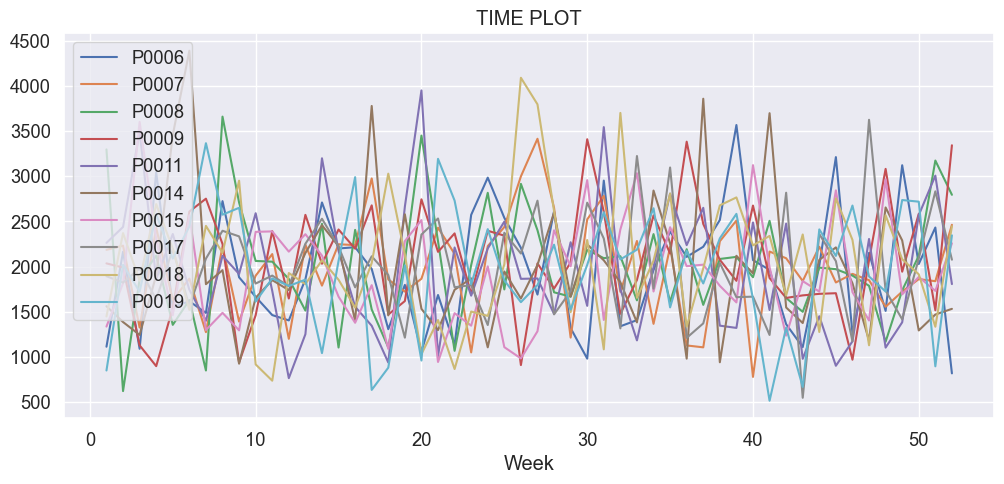

In [346]:
# Plotting line chart time plot
result.plot(figsize=(12,5))
plt.title("TIME PLOT")
plt.show()

## Augmented Dickey Fuller Test (ADF) 

The Augmented Dickey-Fuller (ADF) test is a statistical test used to determine the stationarity of a time series dataset. Stationarity is a crucial concept in time series analysis, indicating that a time series' statistical properties, such as mean and variance, remain constant over time. The ADF test evaluates whether a time series is non-stationary, which means its statistical properties change over time, or stationary, where these properties remain consistent.

The ADF test works by comparing the actual time series data with a null hypothesis of non-stationarity. If the test statistic is significantly smaller than critical values, you can reject the null hypothesis and conclude that the time series is stationary. In contrast, if the test statistic is larger than the critical values, the data is considered non-stationary.

This test helps in deciding whether differencing or other transformations are necessary to make a time series suitable for time series modeling and forecasting. It is a fundamental tool in the analysis of time series data to ensure that underlying patterns can be effectively modeled.

In [347]:
from statsmodels.tsa.stattools import adfuller
def adf_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
adf_test(result['P0006'])

1. ADF :  -7.276469832452291
2. P-Value :  1.5397853408244149e-10
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression: 51
5. Critical Values :
	 1% :  -3.5656240522121956
	 5% :  -2.920142229157715
	 10% :  -2.598014675124952


In [348]:
for column in result.columns:
    print("Column Name: ", column)
    adf_test(result[column])
    print("\n")

Column Name:  P0006
1. ADF :  -7.276469832452291
2. P-Value :  1.5397853408244149e-10
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression: 51
5. Critical Values :
	 1% :  -3.5656240522121956
	 5% :  -2.920142229157715
	 10% :  -2.598014675124952


Column Name:  P0007
1. ADF :  -6.802812423027919
2. P-Value :  2.214868847210452e-09
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression: 51
5. Critical Values :
	 1% :  -3.5656240522121956
	 5% :  -2.920142229157715
	 10% :  -2.598014675124952


Column Name:  P0008
1. ADF :  -5.719087758425469
2. P-Value :  7.00901357140008e-07
3. Num Of Lags :  1
4. Num Of Observations Used For ADF Regression: 50
5. Critical Values :
	 1% :  -3.568485864
	 5% :  -2.92135992
	 10% :  -2.5986616


Column Name:  P0009
1. ADF :  -6.004303790373141
2. P-Value :  1.6292991037956368e-07
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression: 51
5. Critical Values :
	 1% :  -3.5656240522121956
	 5% :  -2.920142229157715
	 1

In [349]:
ad_fuller_result_1 = adfuller(result['P0006'].diff()[10:])

print('P0006')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

P0006
ADF Statistic: -4.464168763426758
p-value: 0.00022812819376233457
